In [1]:
from eeg_net.eeg_resnet import * 
from eeg_net.eeg_net_base import *
from eeg_net.eeg_rnn import * 
from eeg_net.eeg_cnn import * 
import numpy as np 
import matplotlib.pyplot as plt 
from torchsummary import summary
from eeg_net.data_process import *
from data.data_util import *
from tensorflow_eeg.eeg_net.eeg_rnn import*
%load_ext autoreload
%autoreload 2
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 200

## Load the subject 4 data 

In [2]:
subject_num = 3
X_train_val = load_data(data_type='X_train_val',
                                data_sub_dir='band_pass_data',
                                band_pass_range=('01','45'),
                                subject=subject_num,
                                downsampled=True)
y_train_val = load_data(data_type='y_train_valid',
                                subject=subject_num,
                                data_sub_dir='band_pass_data',
                                downsampled=True)


X_test = load_data(data_type='X_test',
                                data_sub_dir='band_pass_data',
                                band_pass_range=('01','45'),
                                subject=subject_num,
                                downsampled=True)

y_test = load_data(data_type="y_test",
                                data_sub_dir='band_pass_data',
                                subject=subject_num,
                             downsampled=True)

                            
print(X_train_val.shape)
print(y_train_val.shape)
print(X_test.shape)
print(y_test.shape)

(468, 22, 500)
(468,)
(100, 22, 500)
(100,)


## Test on 1D3LCNN


Start training...
Epoch	Train Loss	Train Acc	Test Loss	Test_Acc	
0	1.548557	0.228106	1.386925	0.265957	
1	1.486249	0.267458	1.386976	0.255319	
2	1.496928	0.273341	1.389000	0.244681	
3	1.447216	0.288484	1.389960	0.212766	
4	1.452760	0.265046	1.392043	0.212766	
5	1.398865	0.296296	1.393471	0.180851	
6	1.386771	0.323302	1.393829	0.202128	
7	1.378711	0.316454	1.394384	0.234043	
8	1.367257	0.317901	1.393371	0.212766	
9	1.360399	0.316454	1.391801	0.223404	
10	1.346642	0.339699	1.390098	0.223404	
11	1.333782	0.354360	1.387528	0.223404	
12	1.328086	0.386285	1.384932	0.223404	
13	1.345138	0.350791	1.382869	0.223404	
14	1.323536	0.340085	1.381908	0.265957	
15	1.301086	0.380594	1.380993	0.287234	
16	1.308263	0.398148	1.379508	0.308511	
17	1.300627	0.368345	1.379063	0.287234	
18	1.280369	0.371624	1.377946	0.308511	
19	1.281138	0.374228	1.375762	0.329787	
20	1.289230	0.379919	1.374461	0.340426	
21	1.296113	0.386574	1.373996	0.351064	
22	1.255602	0.412616	1.373549	0.340426	
23	1.261498	0.426794	1.37

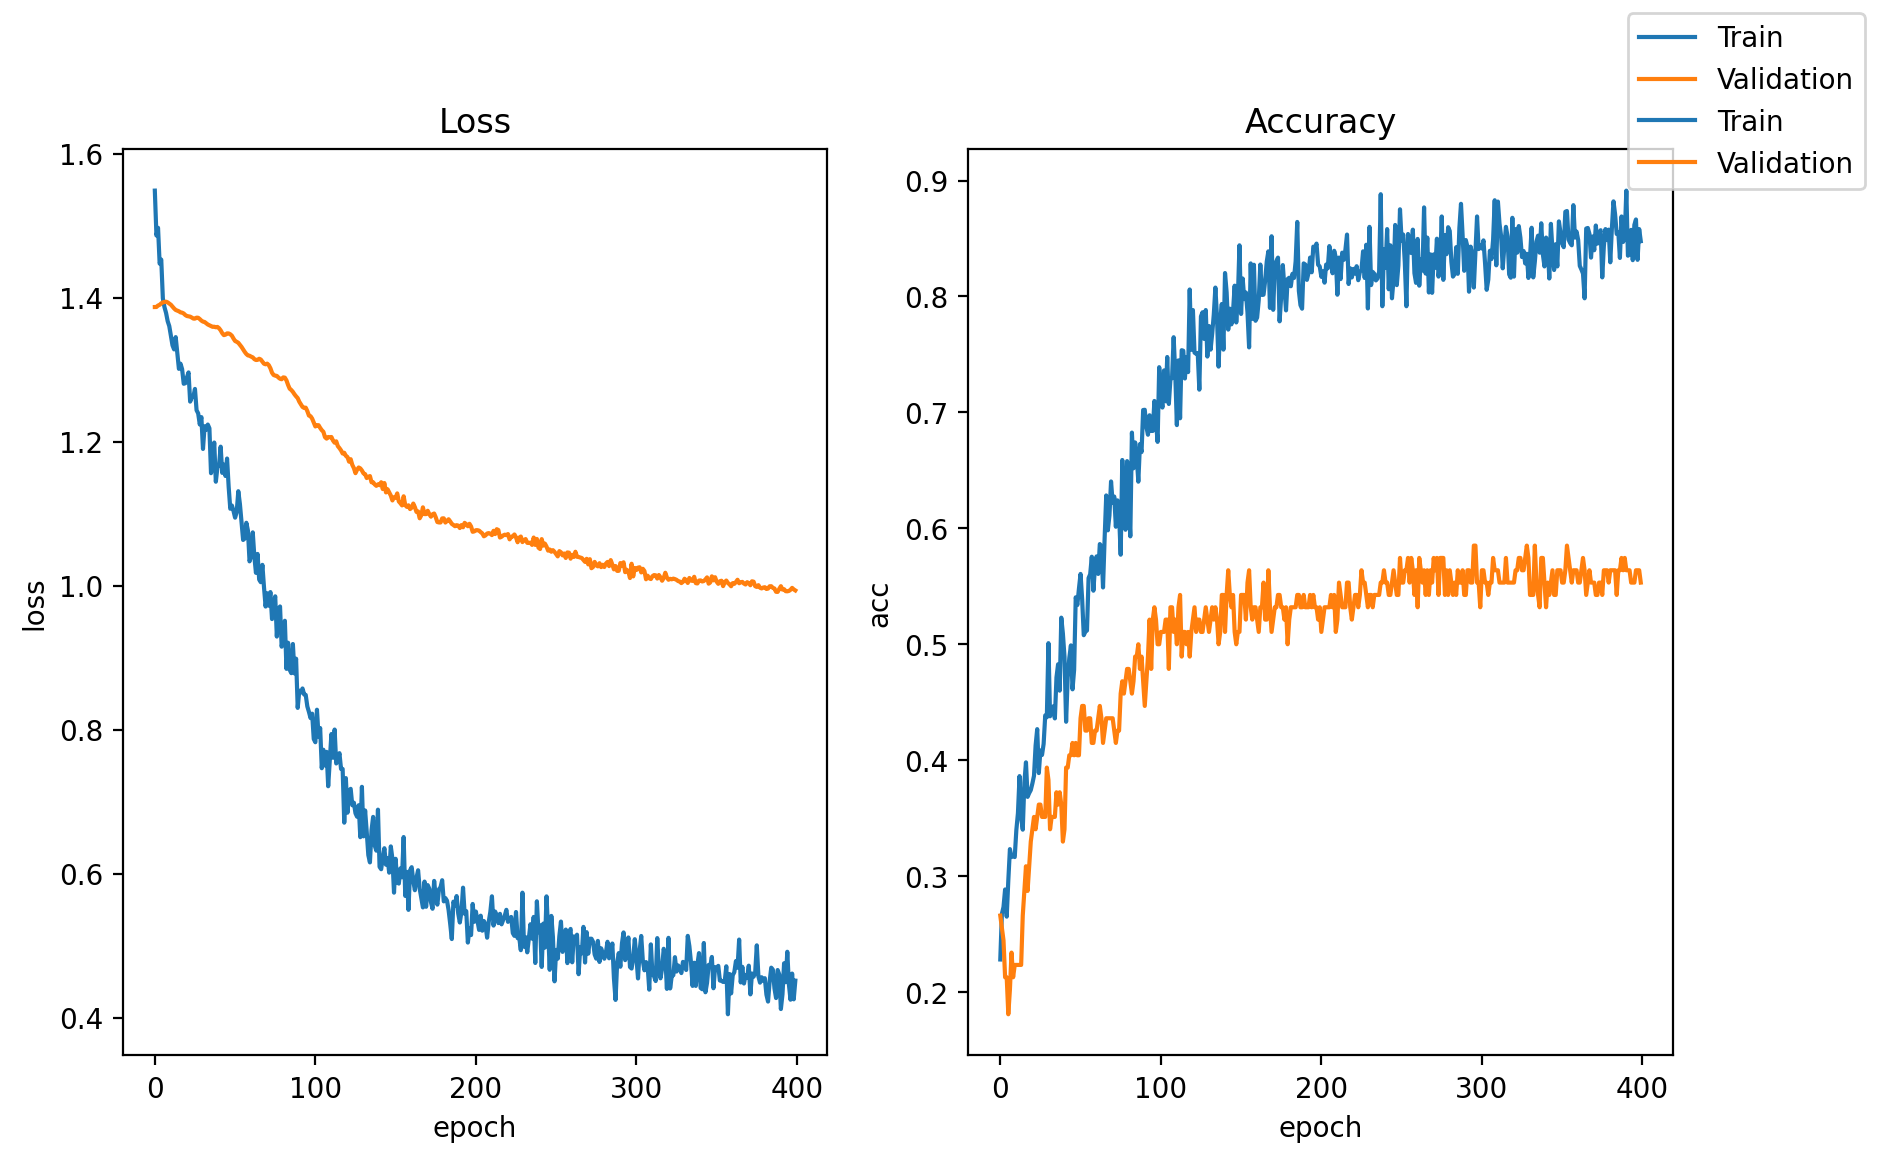

Test accuracy in trail 0: 0.53
Start training...
Epoch	Train Loss	Train Acc	Test Loss	Test_Acc	
0	1.416206	0.313850	1.380143	0.276596	
1	1.387429	0.301312	1.375107	0.265957	
2	1.367457	0.313368	1.369856	0.276596	
3	1.334211	0.355710	1.364029	0.297872	
4	1.294717	0.394579	1.357328	0.372340	
5	1.281830	0.407890	1.353437	0.404255	
6	1.266925	0.484375	1.349741	0.414894	
7	1.268923	0.463059	1.346278	0.404255	
8	1.257795	0.456211	1.344289	0.414894	
9	1.239874	0.418017	1.342096	0.404255	
10	1.211595	0.498071	1.337758	0.425532	
11	1.193404	0.497396	1.332212	0.414894	
12	1.178840	0.530093	1.328948	0.425532	
13	1.179997	0.526235	1.326408	0.436170	
14	1.146140	0.561632	1.324663	0.425532	
15	1.129576	0.574846	1.322797	0.404255	
16	1.108455	0.603299	1.319561	0.414894	
17	1.091781	0.570312	1.314462	0.436170	
18	1.086189	0.651620	1.312258	0.446809	
19	1.075397	0.633584	1.311042	0.436170	
20	1.026735	0.675926	1.306274	0.446809	
21	1.017142	0.692130	1.301824	0.436170	
22	0.985776	0.689236	1.296754	0.42

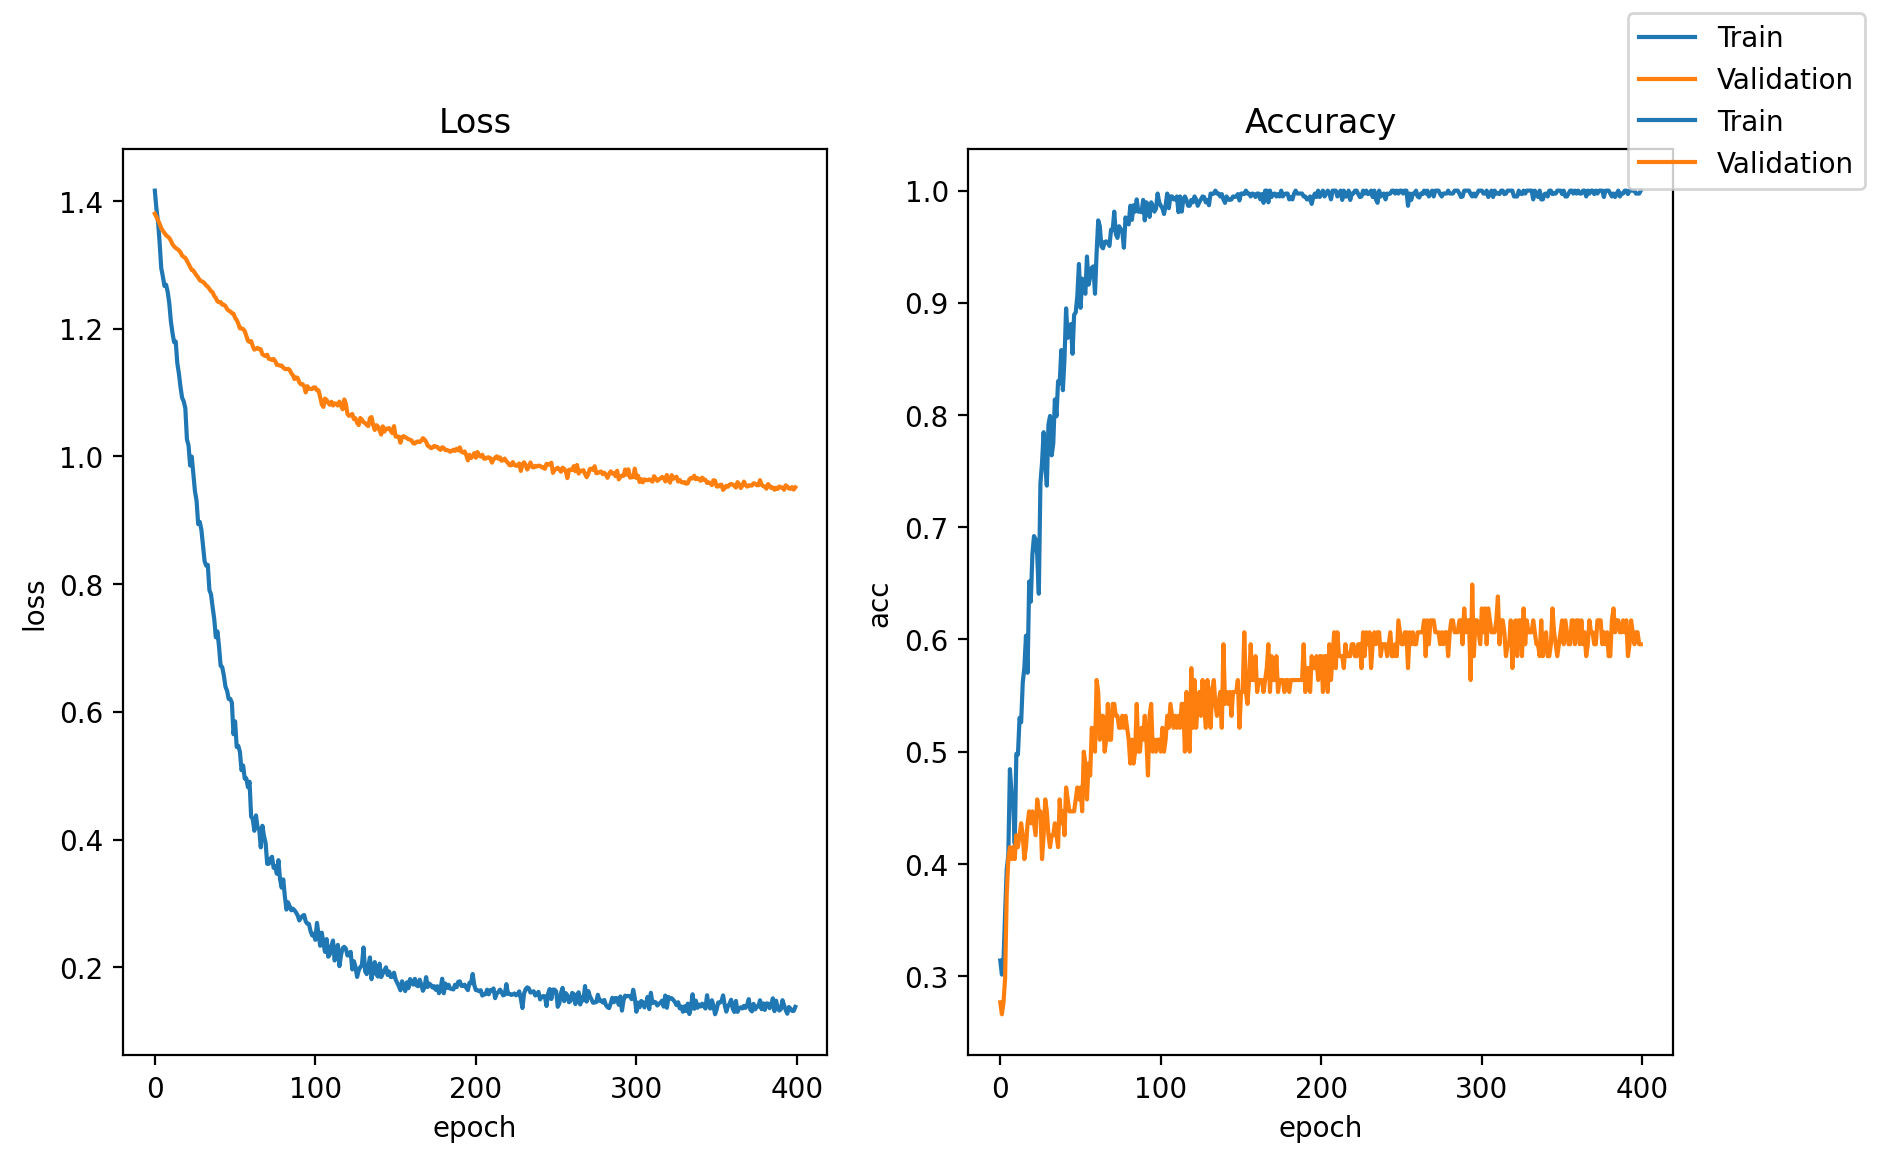

Test accuracy in trail 1: 0.7
Start training...
Epoch	Train Loss	Train Acc	Test Loss	Test_Acc	
0	1.390471	0.265046	1.374596	0.329787	
1	1.385774	0.302662	1.376256	0.329787	
2	1.349398	0.341049	1.376803	0.276596	
3	1.342849	0.363329	1.374887	0.287234	
4	1.320863	0.375193	1.370788	0.265957	
5	1.304012	0.378279	1.366454	0.287234	
6	1.284689	0.369213	1.362443	0.329787	
7	1.268063	0.443383	1.356451	0.329787	
8	1.249014	0.468075	1.349600	0.340426	
9	1.248000	0.455247	1.345647	0.382979	
10	1.211403	0.459491	1.339146	0.382979	
11	1.193440	0.554012	1.334174	0.404255	
12	1.176244	0.542149	1.334706	0.404255	
13	1.190896	0.485532	1.332046	0.393617	
14	1.161728	0.515625	1.331407	0.382979	
15	1.124257	0.559703	1.330374	0.372340	
16	1.121758	0.595486	1.328083	0.393617	
17	1.116171	0.622685	1.325645	0.414894	
18	1.106093	0.587384	1.324631	0.404255	
19	1.077800	0.631944	1.317413	0.468085	
20	1.070220	0.649016	1.308181	0.446809	
21	1.075835	0.617477	1.303701	0.436170	
22	1.049054	0.646123	1.301555	0.478

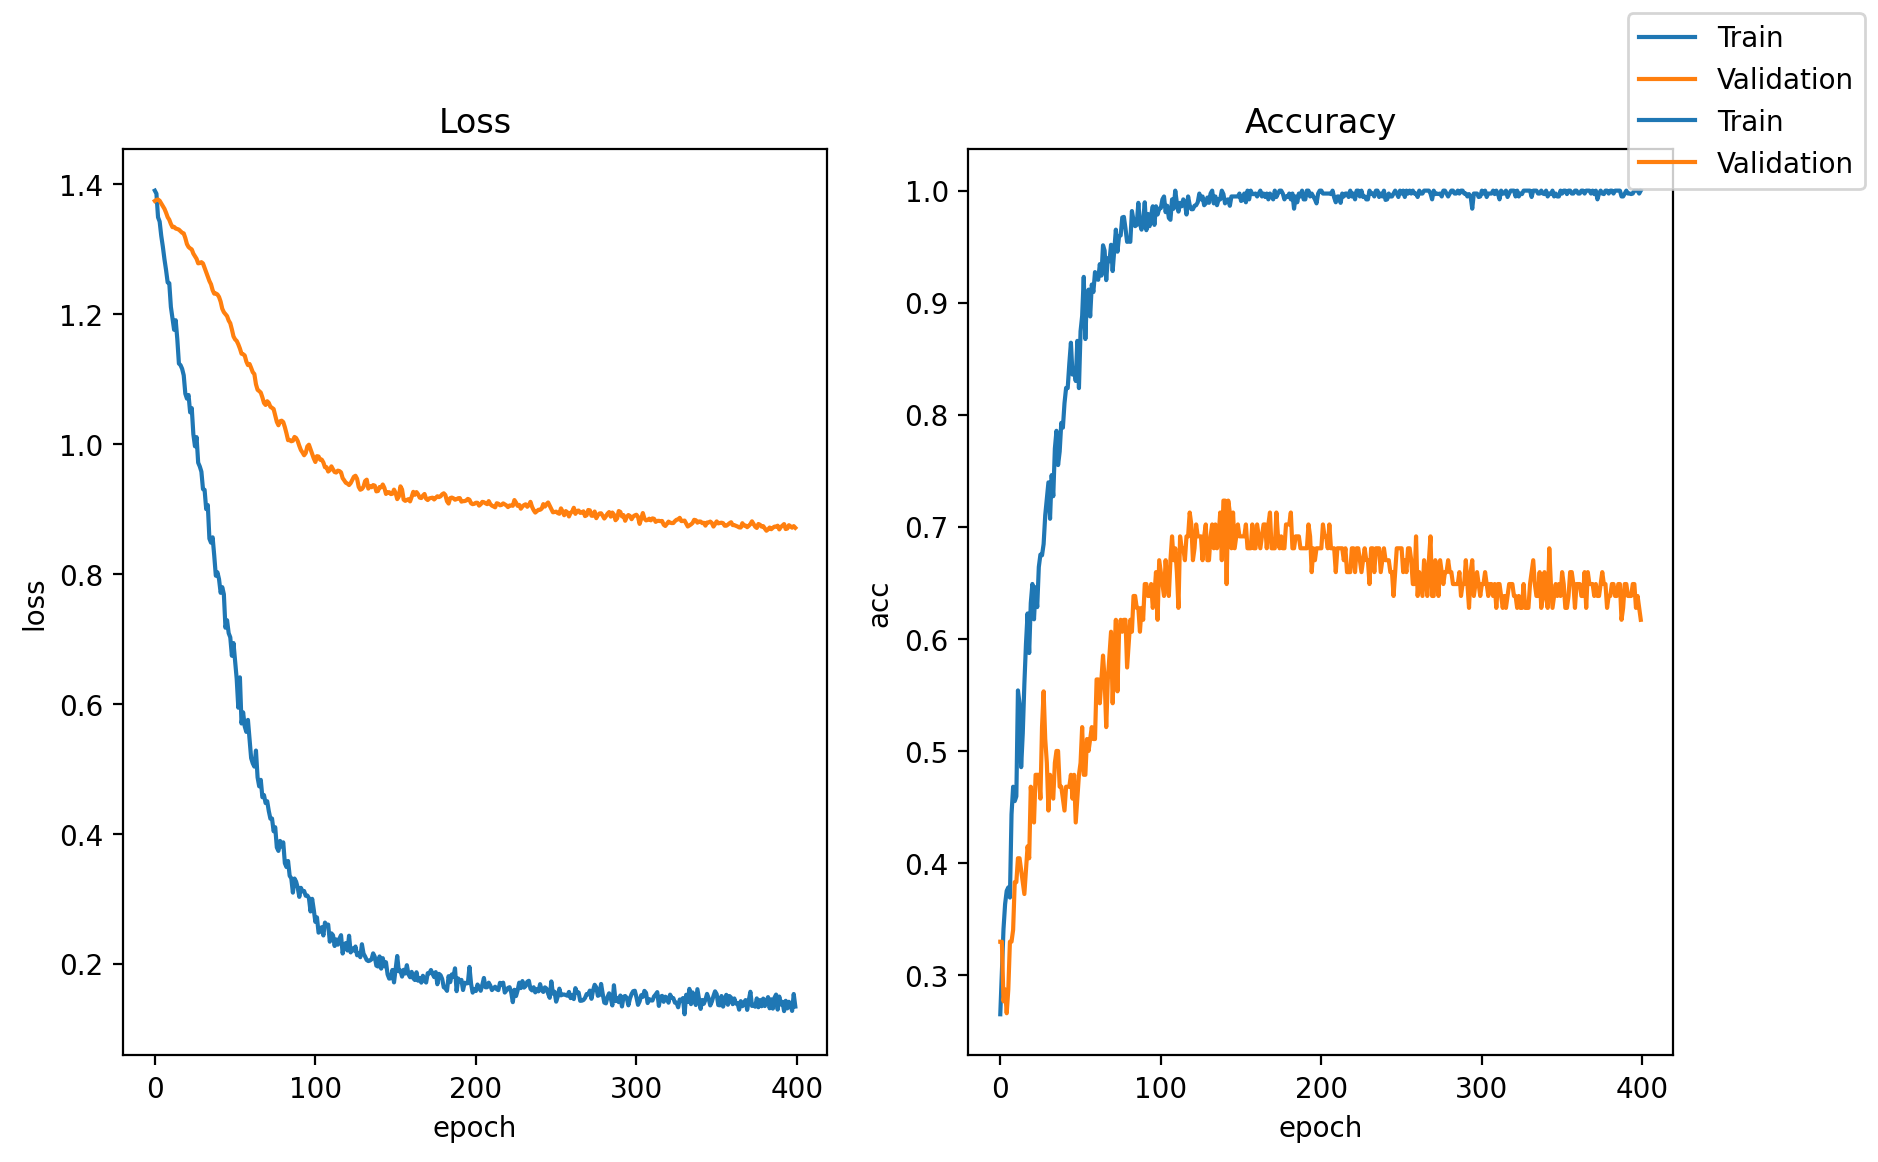

Test accuracy in trail 2: 0.61
Start training...
Epoch	Train Loss	Train Acc	Test Loss	Test_Acc	
0	1.441062	0.253183	1.381738	0.234043	
1	1.387546	0.293885	1.374337	0.244681	
2	1.335561	0.343943	1.368473	0.265957	
3	1.337203	0.344425	1.363755	0.265957	
4	1.338555	0.351948	1.359079	0.265957	
5	1.294355	0.397473	1.355071	0.276596	
6	1.306027	0.379919	1.350412	0.287234	
7	1.242302	0.444155	1.350444	0.297872	
8	1.282558	0.398630	1.349611	0.297872	
9	1.238720	0.464892	1.348784	0.308511	
10	1.239731	0.438657	1.344501	0.308511	
11	1.236621	0.480806	1.341672	0.308511	
12	1.206390	0.530768	1.339335	0.308511	
13	1.194565	0.527199	1.333690	0.319149	
14	1.186745	0.526524	1.324712	0.308511	
15	1.149165	0.572724	1.317575	0.329787	
16	1.149115	0.543306	1.313709	0.340426	
17	1.115642	0.569637	1.313703	0.340426	
18	1.117144	0.578414	1.313042	0.351064	
19	1.086923	0.588059	1.306653	0.361702	
20	1.124739	0.539062	1.301268	0.361702	
21	1.081732	0.617959	1.292446	0.393617	
22	1.081401	0.610147	1.290799	0.38

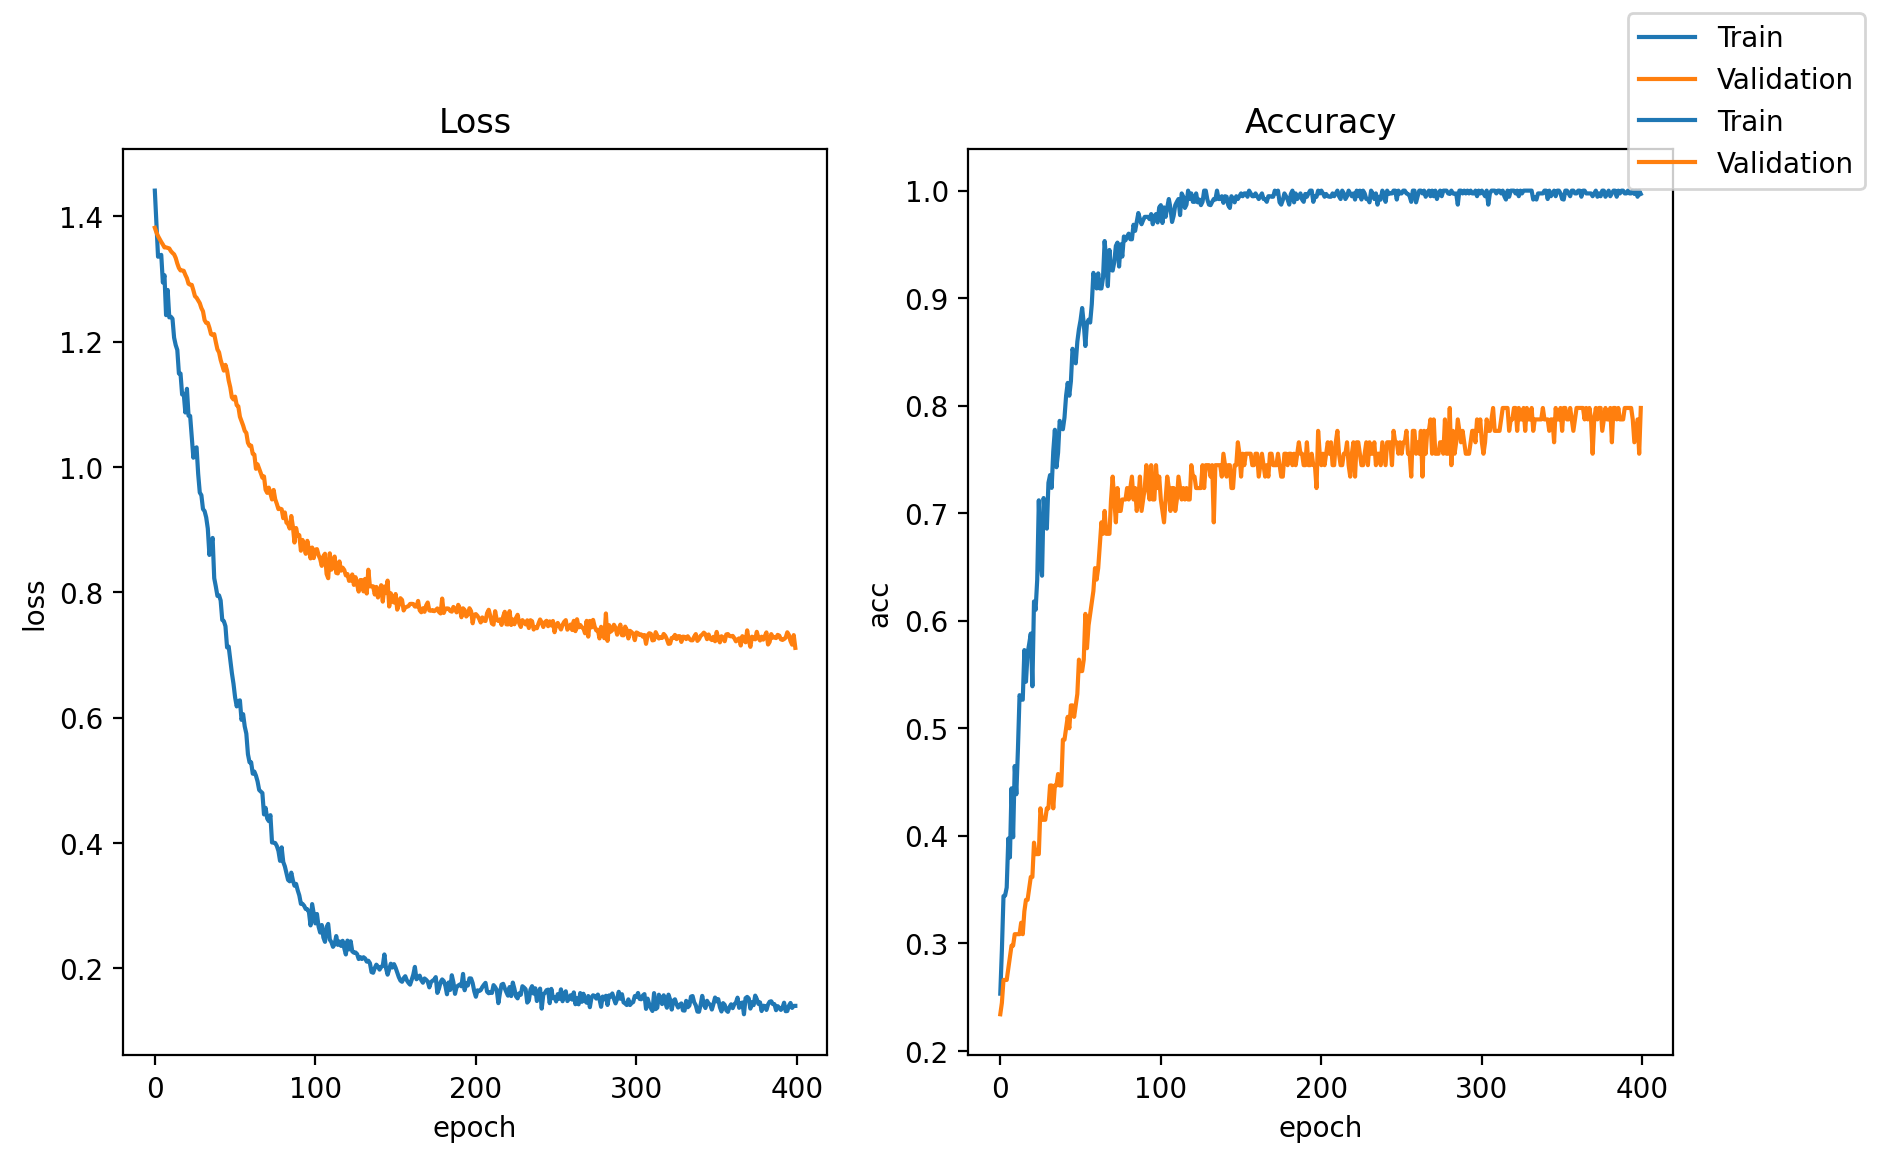

Test accuracy in trail 3: 0.68
Start training...
Epoch	Train Loss	Train Acc	Test Loss	Test_Acc	
0	1.433956	0.257427	1.375878	0.276596	
1	1.385146	0.309317	1.382586	0.265957	
2	1.362946	0.321663	1.388171	0.308511	
3	1.354667	0.322145	1.386232	0.287234	
4	1.323967	0.364294	1.383712	0.297872	
5	1.313659	0.369020	1.380440	0.287234	
6	1.292329	0.447627	1.376279	0.297872	
7	1.303188	0.397184	1.374407	0.308511	
8	1.270397	0.447627	1.368535	0.308511	
9	1.245947	0.447917	1.367440	0.329787	
10	1.242418	0.465856	1.361145	0.329787	
11	1.242227	0.469907	1.354439	0.351064	
12	1.205195	0.509742	1.348615	0.393617	
13	1.197825	0.507137	1.347679	0.372340	
14	1.176957	0.572724	1.344003	0.393617	
15	1.152013	0.571759	1.338142	0.404255	
16	1.148604	0.556327	1.333563	0.414894	
17	1.141151	0.582176	1.330914	0.382979	
18	1.096754	0.608218	1.324301	0.414894	
19	1.078261	0.625772	1.324682	0.414894	
20	1.067188	0.625096	1.318962	0.414894	
21	1.052761	0.610822	1.311614	0.393617	
22	1.050549	0.639275	1.303268	0.47

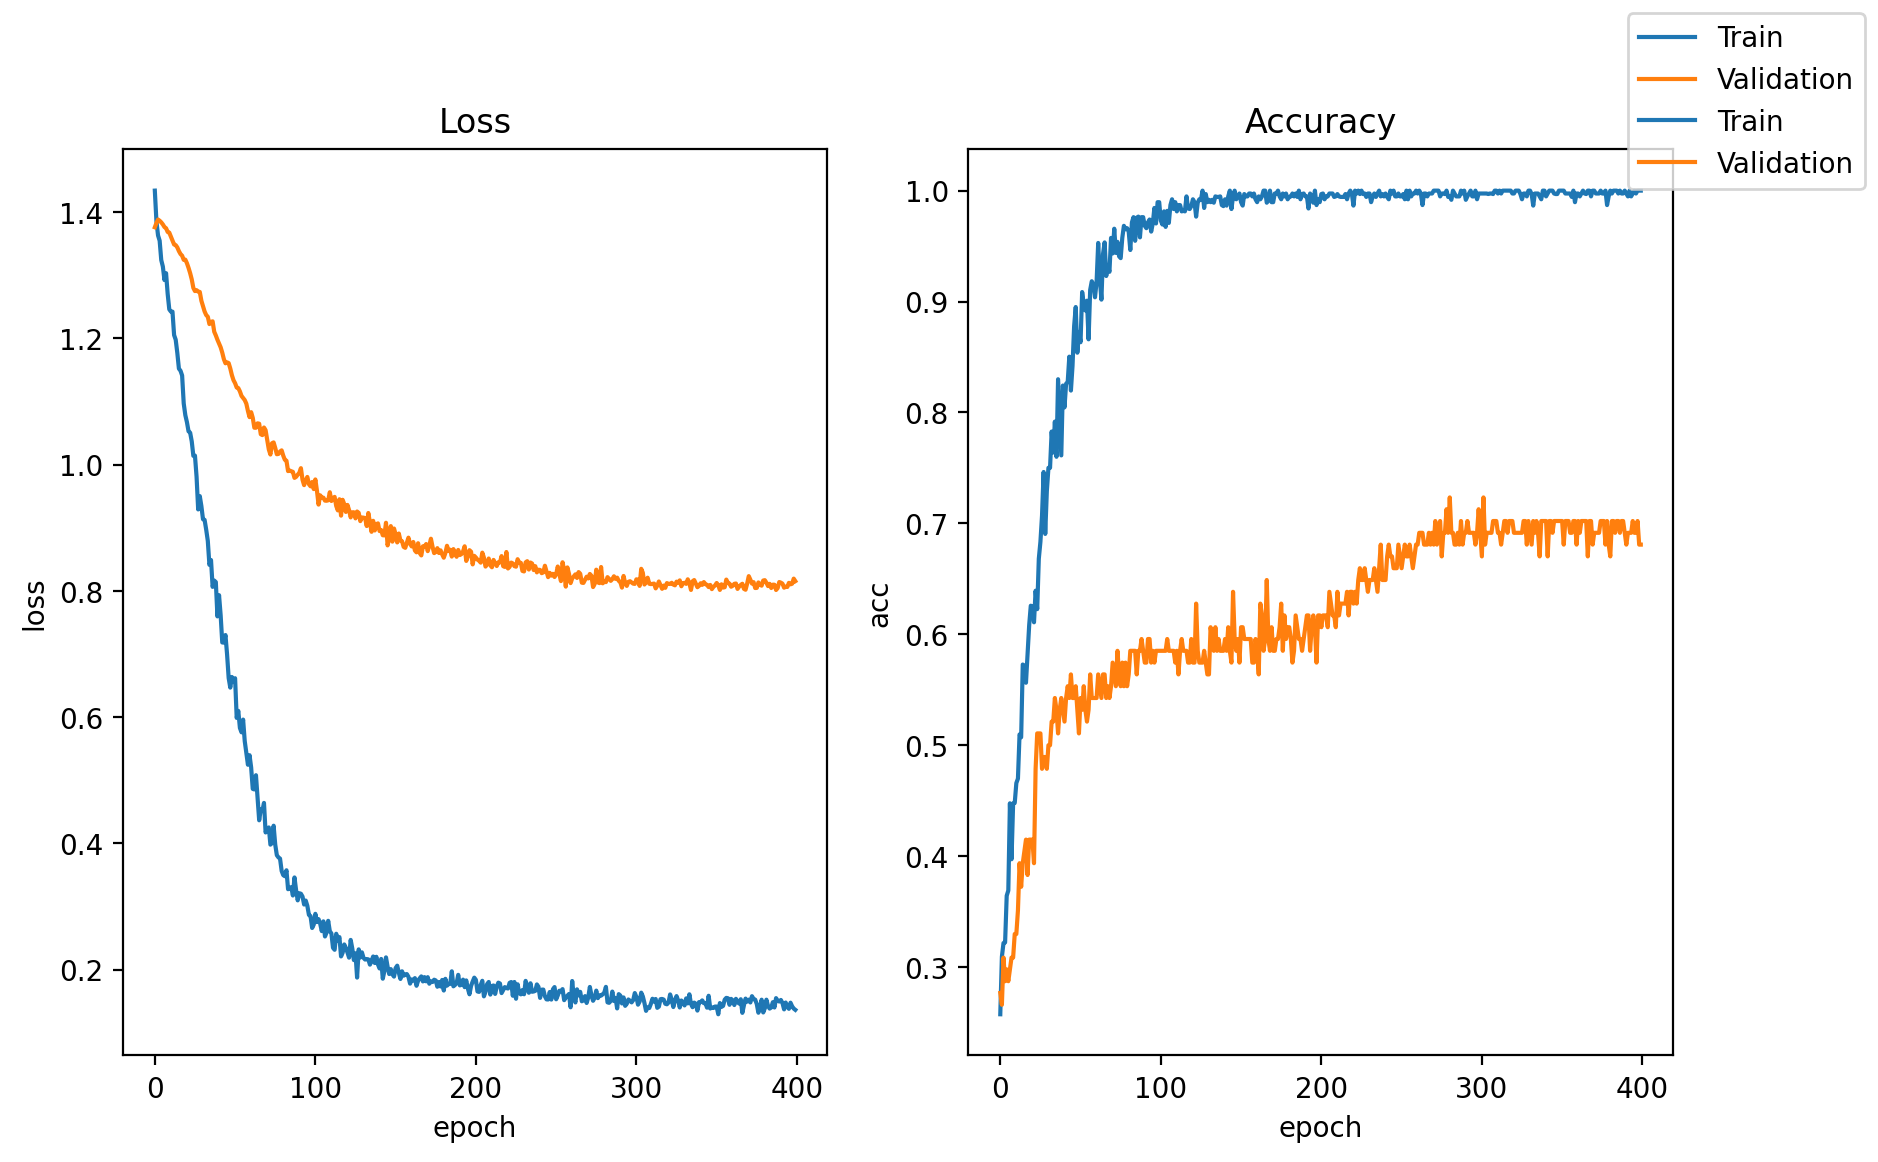

Test accuracy in trail 4: 0.64
Start training...
Epoch	Train Loss	Train Acc	Test Loss	Test_Acc	
0	1.488984	0.220486	1.408057	0.234043	
1	1.427436	0.260802	1.400021	0.255319	
2	1.397824	0.280189	1.395697	0.308511	
3	1.372248	0.291570	1.392519	0.308511	
4	1.340222	0.336998	1.387975	0.308511	
5	1.316796	0.393422	1.383944	0.319149	
6	1.297728	0.382041	1.380684	0.308511	
7	1.292302	0.385610	1.377478	0.308511	
8	1.271963	0.446181	1.373797	0.297872	
9	1.253750	0.466628	1.371087	0.329787	
10	1.227916	0.498360	1.368341	0.319149	
11	1.234605	0.479167	1.363761	0.308511	
12	1.222128	0.472704	1.359435	0.308511	
13	1.188509	0.514660	1.354088	0.319149	
14	1.199990	0.543789	1.349794	0.351064	
15	1.156995	0.537230	1.345219	0.351064	
16	1.156399	0.539062	1.342335	0.329787	
17	1.154648	0.534819	1.340419	0.308511	
18	1.108179	0.612269	1.339403	0.308511	
19	1.104269	0.592593	1.335217	0.319149	
20	1.100482	0.569927	1.328436	0.329787	
21	1.035833	0.633584	1.324373	0.340426	
22	1.033521	0.633102	1.322234	0.32

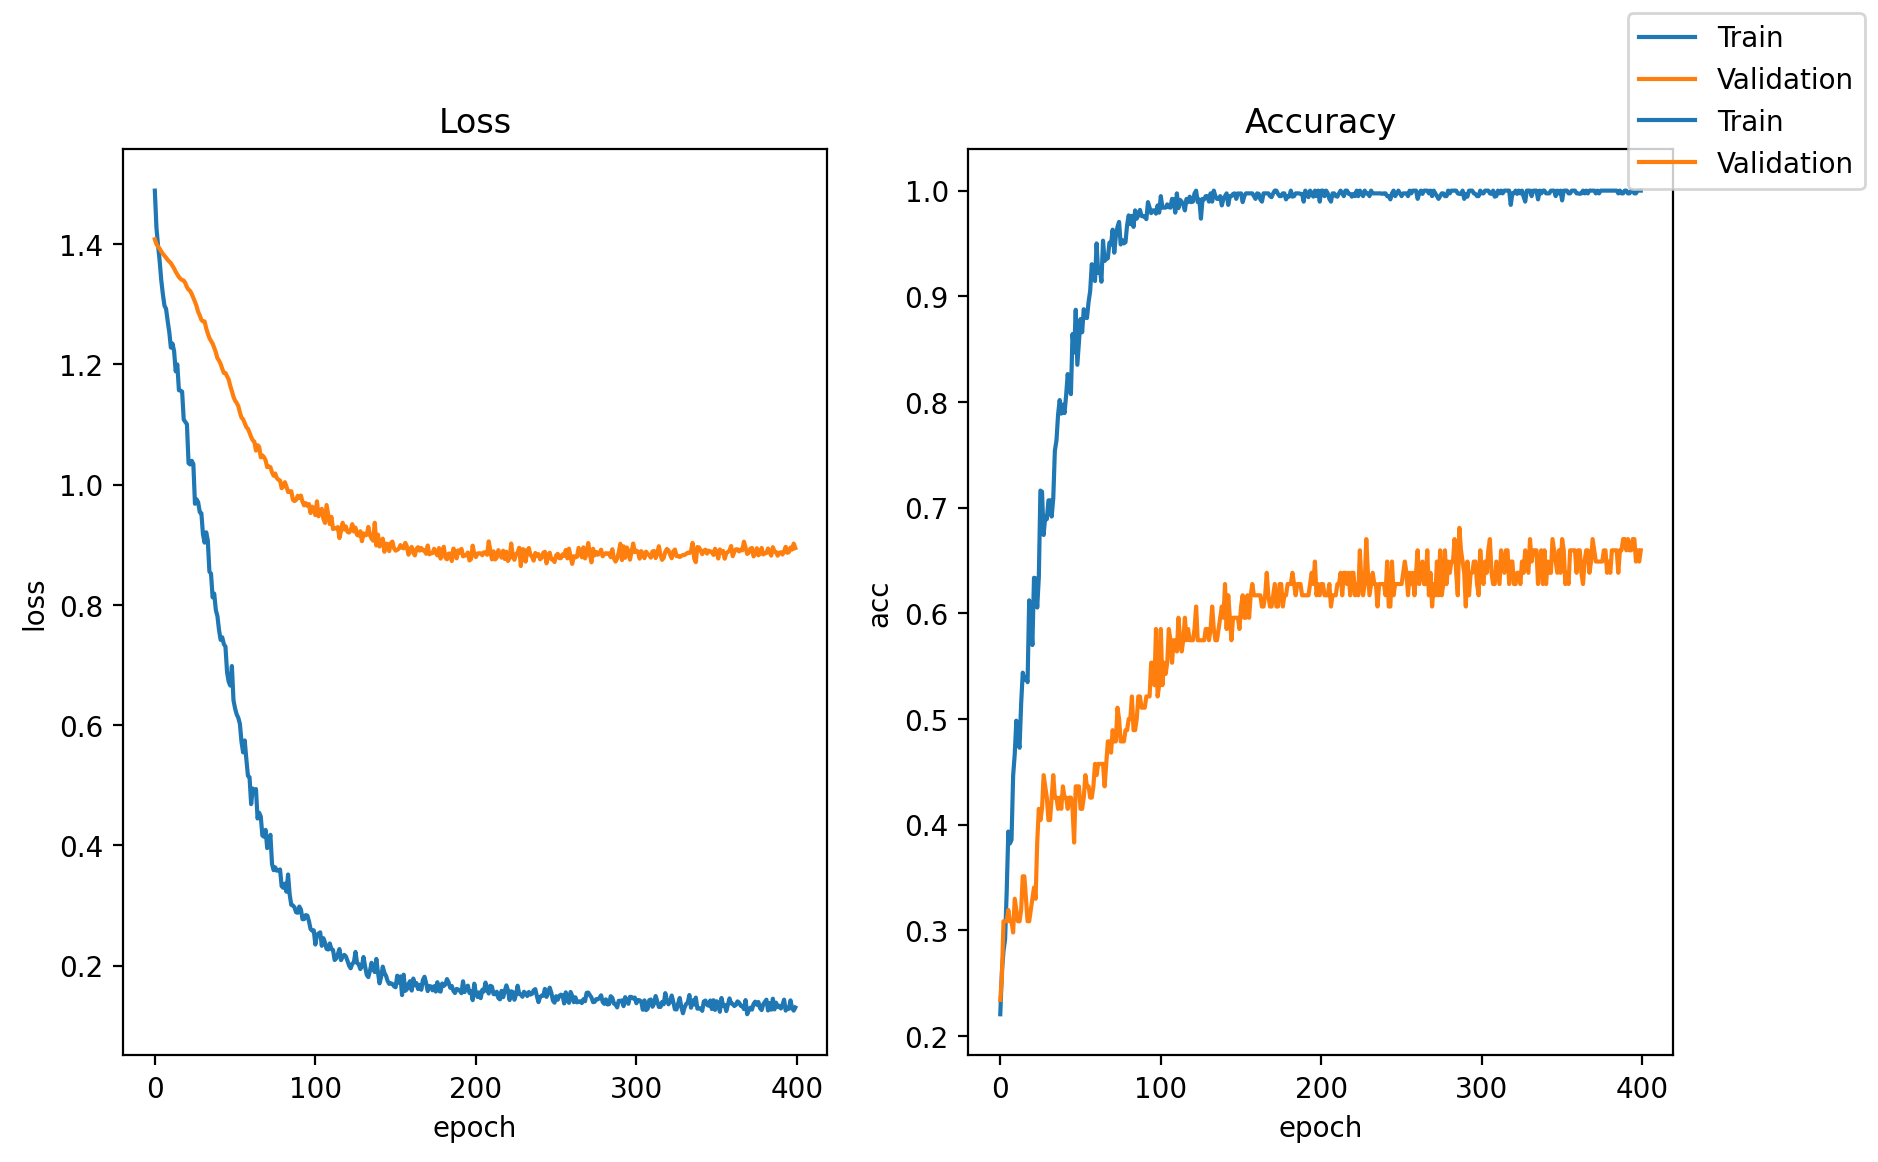

Test accuracy in trail 5: 0.68
Start training...
Epoch	Train Loss	Train Acc	Test Loss	Test_Acc	
0	1.460726	0.222415	1.372890	0.276596	
1	1.376873	0.307677	1.382313	0.244681	
2	1.367620	0.302951	1.382097	0.265957	
3	1.354909	0.327353	1.376708	0.287234	
4	1.339427	0.345583	1.371412	0.265957	
5	1.323078	0.363329	1.365941	0.265957	
6	1.304330	0.381559	1.361822	0.308511	
7	1.288982	0.430363	1.359097	0.308511	
8	1.268554	0.452160	1.357141	0.308511	
9	1.244632	0.471354	1.351425	0.308511	
10	1.210342	0.505691	1.345294	0.319149	
11	1.215570	0.496238	1.339490	0.340426	
12	1.186430	0.536555	1.337710	0.329787	
13	1.174335	0.542149	1.331697	0.319149	
14	1.139781	0.544078	1.325495	0.329787	
15	1.153132	0.555170	1.321902	0.361702	
16	1.121146	0.576485	1.313792	0.361702	
17	1.070768	0.661555	1.307427	0.361702	
18	1.058309	0.653260	1.298143	0.404255	
19	1.060135	0.628376	1.290735	0.404255	
20	1.064616	0.612751	1.290359	0.372340	
21	1.049908	0.654900	1.283016	0.393617	
22	1.008891	0.659433	1.273032	0.43

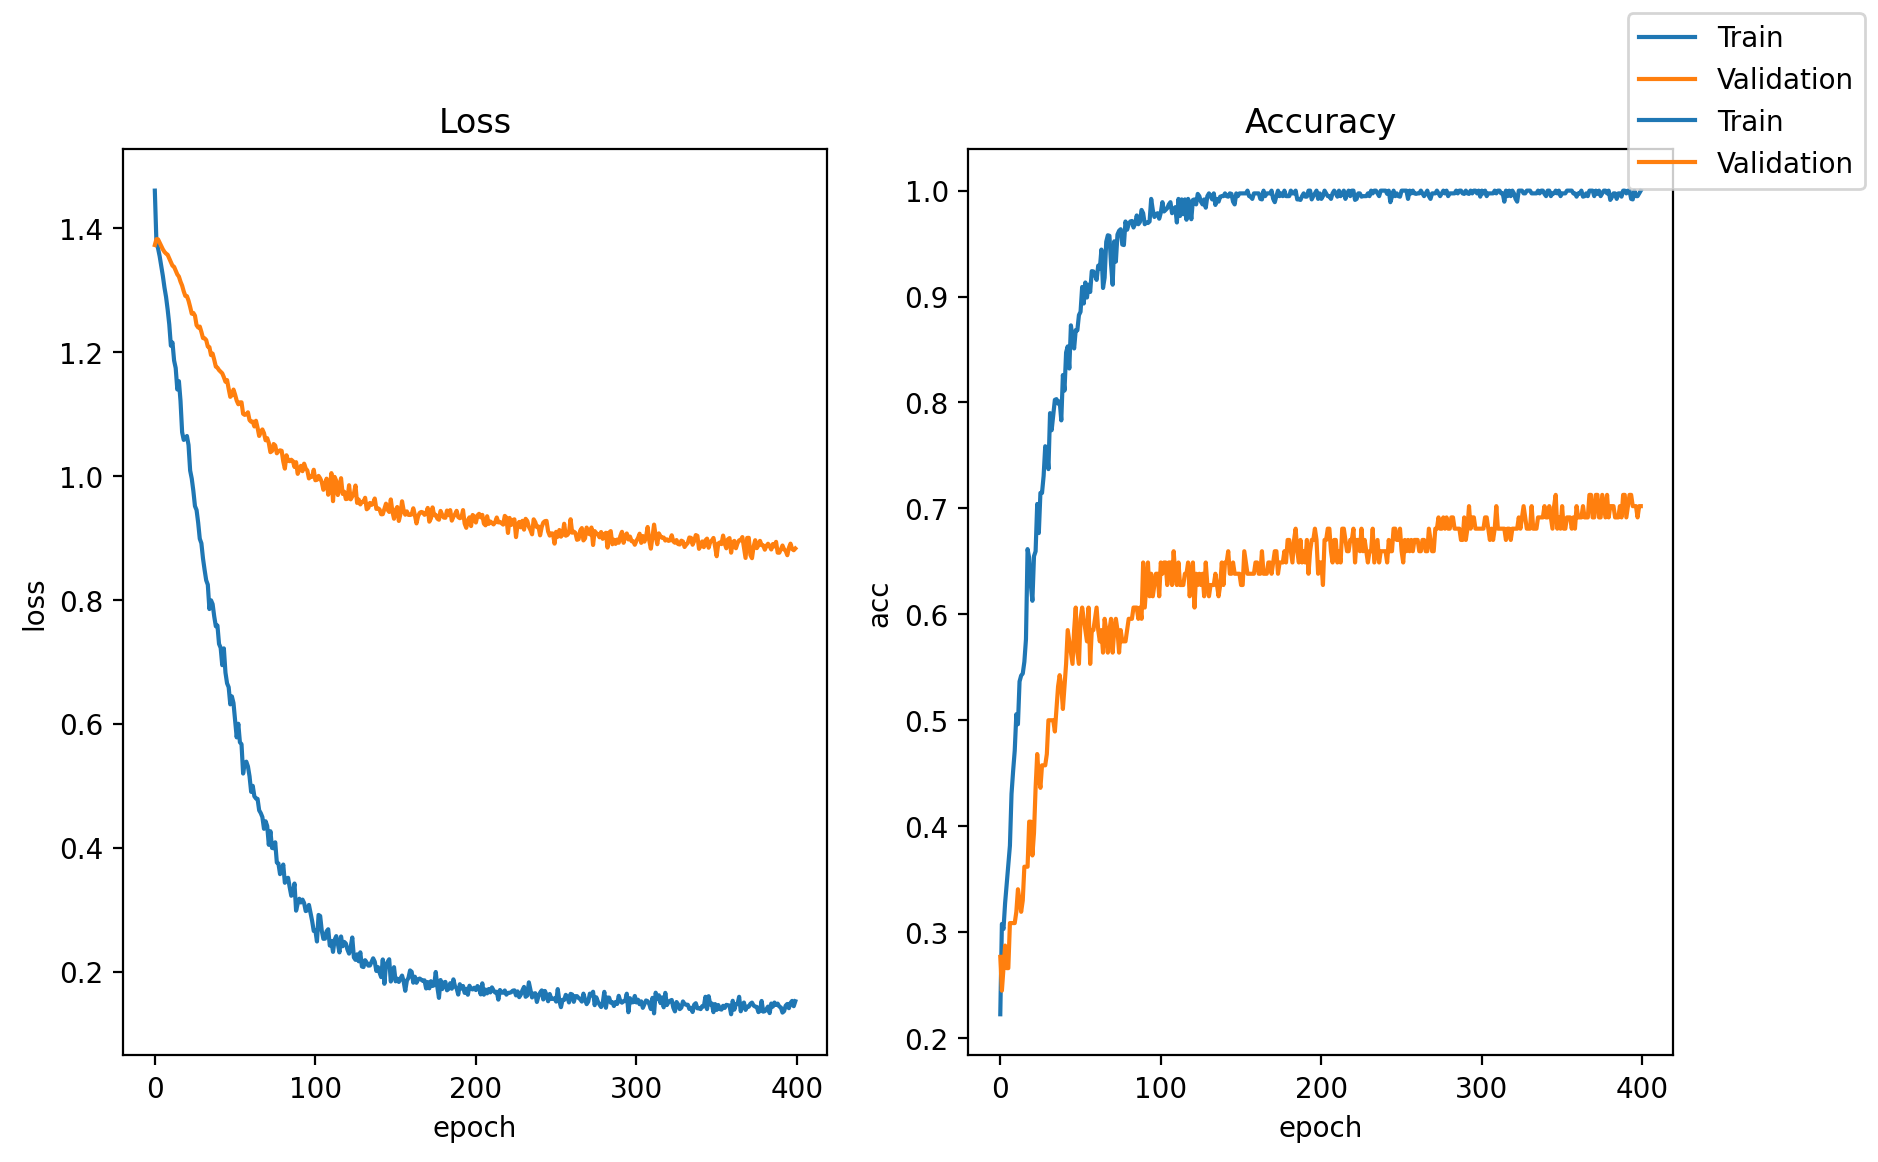

Test accuracy in trail 6: 0.69
Start training...
Epoch	Train Loss	Train Acc	Test Loss	Test_Acc	
0	1.513612	0.244406	1.404700	0.223404	
1	1.438056	0.250096	1.394770	0.244681	
2	1.388571	0.280671	1.394723	0.287234	
3	1.366927	0.293210	1.392178	0.255319	
4	1.324280	0.381848	1.388562	0.287234	
5	1.332413	0.378472	1.383623	0.308511	
6	1.310467	0.375675	1.375896	0.329787	
7	1.279363	0.440297	1.375594	0.308511	
8	1.279802	0.443191	1.377897	0.308511	
9	1.264557	0.445312	1.374300	0.297872	
10	1.250264	0.486497	1.364590	0.319149	
11	1.226650	0.479649	1.360677	0.351064	
12	1.247147	0.469232	1.357470	0.340426	
13	1.229053	0.455440	1.358201	0.287234	
14	1.192027	0.560185	1.356809	0.276596	
15	1.159731	0.551890	1.351022	0.319149	
16	1.139247	0.582658	1.344231	0.361702	
17	1.153583	0.584780	1.339473	0.319149	
18	1.139733	0.537616	1.333536	0.351064	
19	1.118655	0.602334	1.327070	0.372340	
20	1.099453	0.609471	1.317739	0.393617	
21	1.071669	0.635417	1.312882	0.372340	
22	1.077880	0.589506	1.312099	0.38

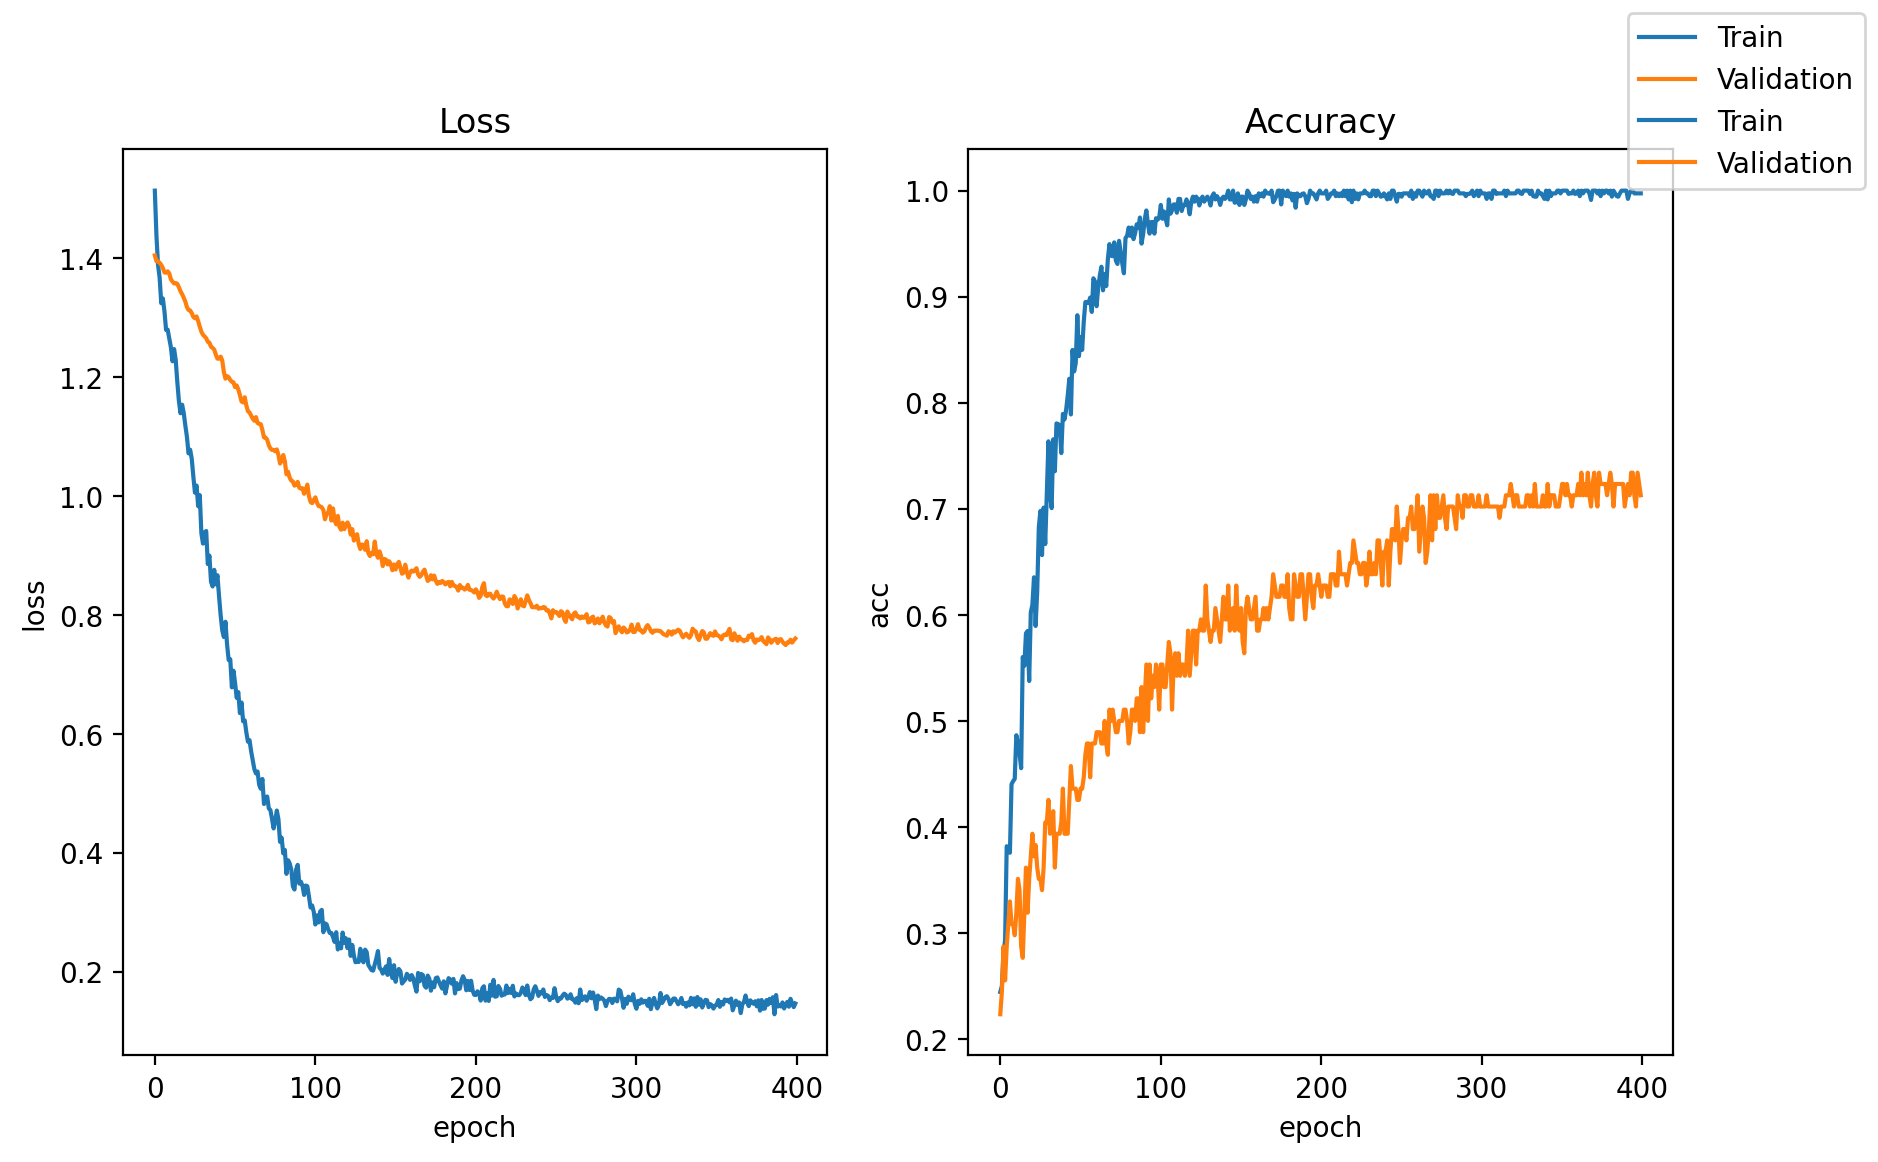

Test accuracy in trail 7: 0.63
Start training...
Epoch	Train Loss	Train Acc	Test Loss	Test_Acc	
0	1.442801	0.258198	1.391608	0.234043	
1	1.404497	0.300347	1.388415	0.265957	
2	1.356606	0.311439	1.387074	0.287234	
3	1.339085	0.326196	1.384896	0.276596	
4	1.330521	0.345293	1.383337	0.287234	
5	1.306892	0.399113	1.380337	0.287234	
6	1.278980	0.451196	1.375813	0.308511	
7	1.281270	0.413773	1.370732	0.308511	
8	1.260021	0.449074	1.368103	0.329787	
9	1.247375	0.482253	1.364400	0.329787	
10	1.222232	0.506366	1.360043	0.329787	
11	1.202641	0.515143	1.353346	0.382979	
12	1.188126	0.544753	1.347837	0.436170	
13	1.168653	0.534336	1.342260	0.436170	
14	1.164600	0.541474	1.338047	0.446809	
15	1.135673	0.600212	1.334321	0.436170	
16	1.138629	0.576292	1.328303	0.446809	
17	1.101591	0.614873	1.323204	0.436170	
18	1.094542	0.621721	1.315757	0.446809	
19	1.078601	0.621528	1.308985	0.457447	
20	1.054380	0.632137	1.304988	0.457447	
21	1.062968	0.644483	1.302066	0.457447	
22	1.041336	0.620081	1.297171	0.47

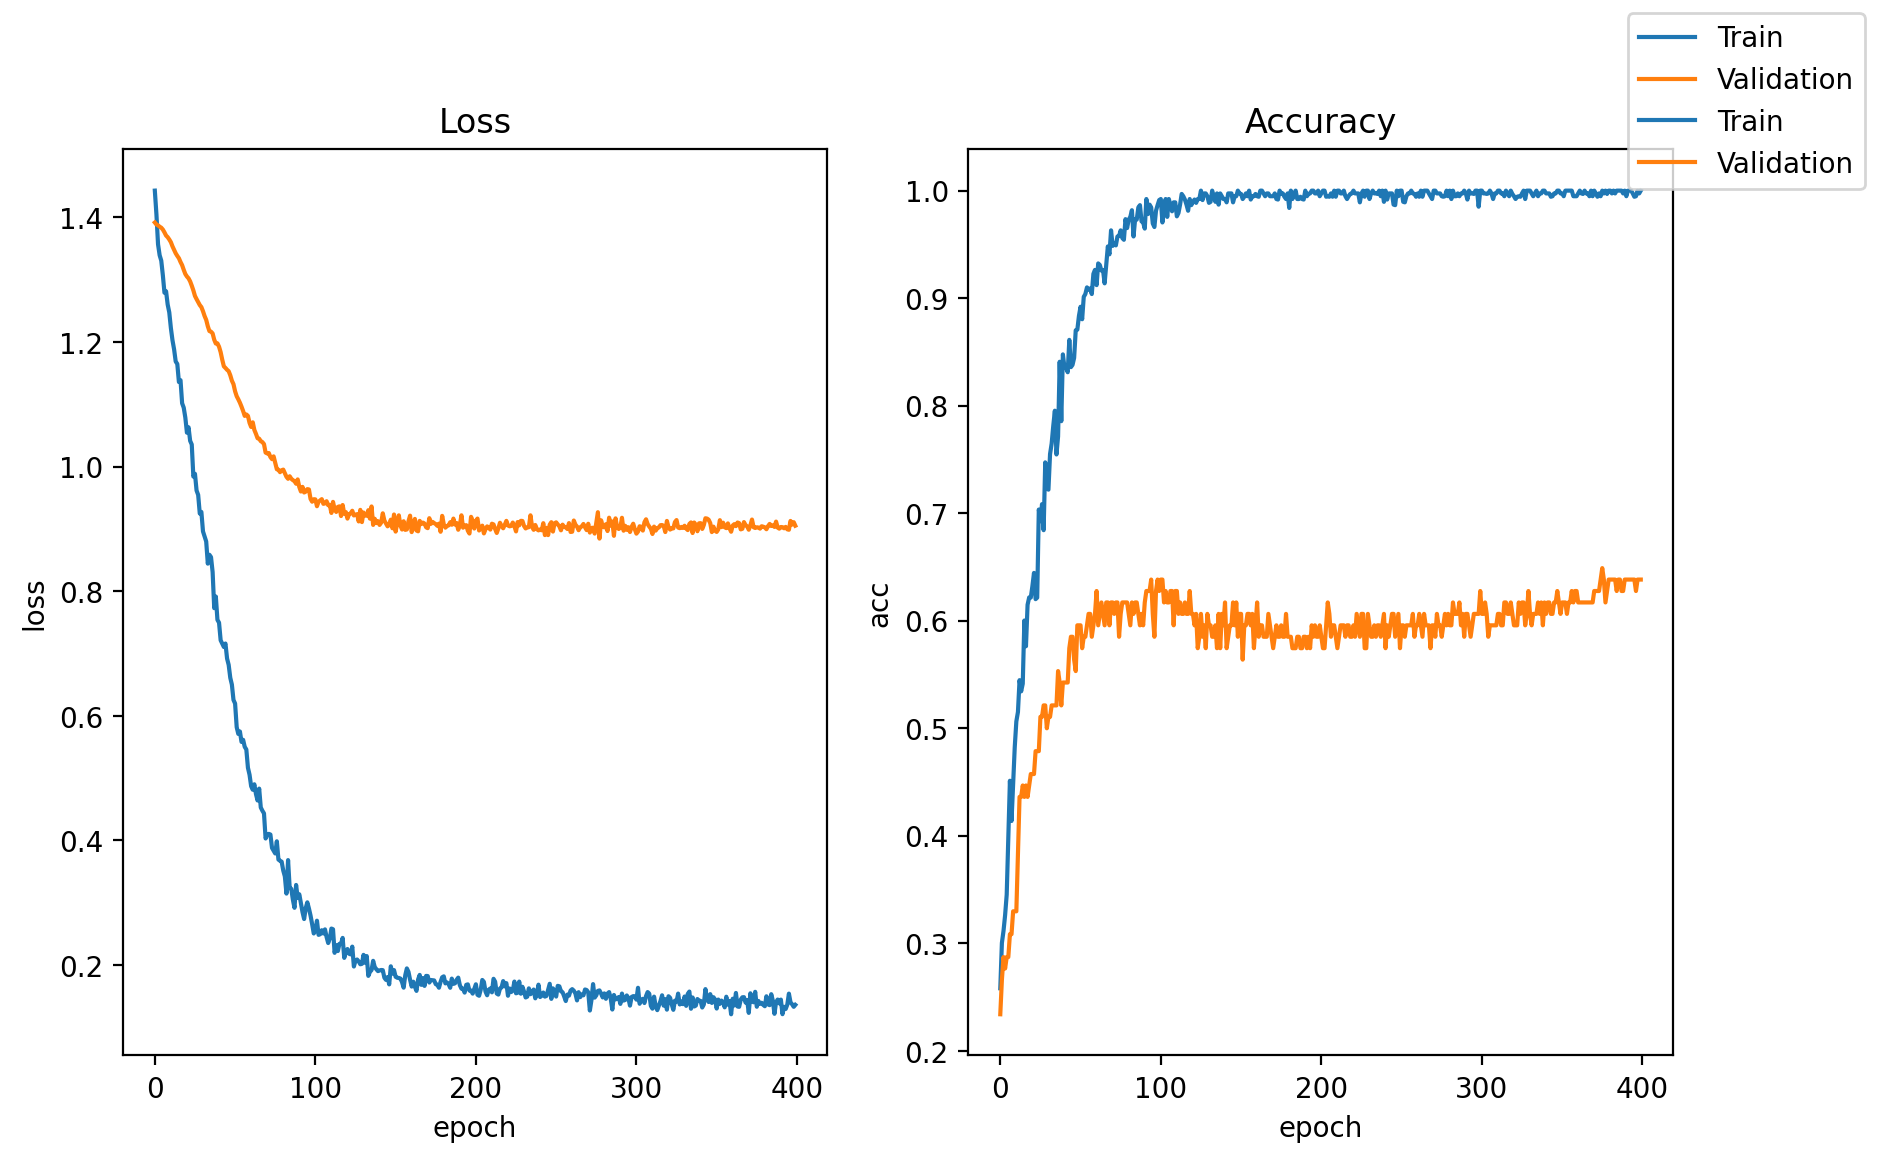

Test accuracy in trail 8: 0.65
Start training...
Epoch	Train Loss	Train Acc	Test Loss	Test_Acc	
0	1.415534	0.269097	1.396428	0.212766	
1	1.360807	0.315779	1.396735	0.202128	
2	1.372107	0.311246	1.398068	0.244681	
3	1.365608	0.303627	1.396819	0.244681	
4	1.319589	0.367380	1.394689	0.255319	
5	1.268684	0.451968	1.392790	0.287234	
6	1.257748	0.466628	1.394417	0.329787	
7	1.253359	0.456404	1.395659	0.329787	
8	1.226539	0.491705	1.396686	0.329787	
9	1.243389	0.429880	1.394097	0.340426	
10	1.197103	0.508295	1.385270	0.329787	
11	1.188115	0.518422	1.377325	0.297872	
12	1.178926	0.517940	1.373044	0.287234	
13	1.152653	0.570312	1.371827	0.276596	
14	1.112045	0.621046	1.376709	0.287234	
15	1.131155	0.564911	1.373006	0.308511	
16	1.075909	0.637635	1.370264	0.308511	
17	1.098661	0.599055	1.365182	0.351064	
18	1.063894	0.639757	1.359607	0.361702	
19	1.061916	0.635031	1.356099	0.361702	
20	1.054773	0.652296	1.350427	0.340426	
21	1.002574	0.689236	1.352916	0.340426	
22	1.014376	0.687404	1.352828	0.32

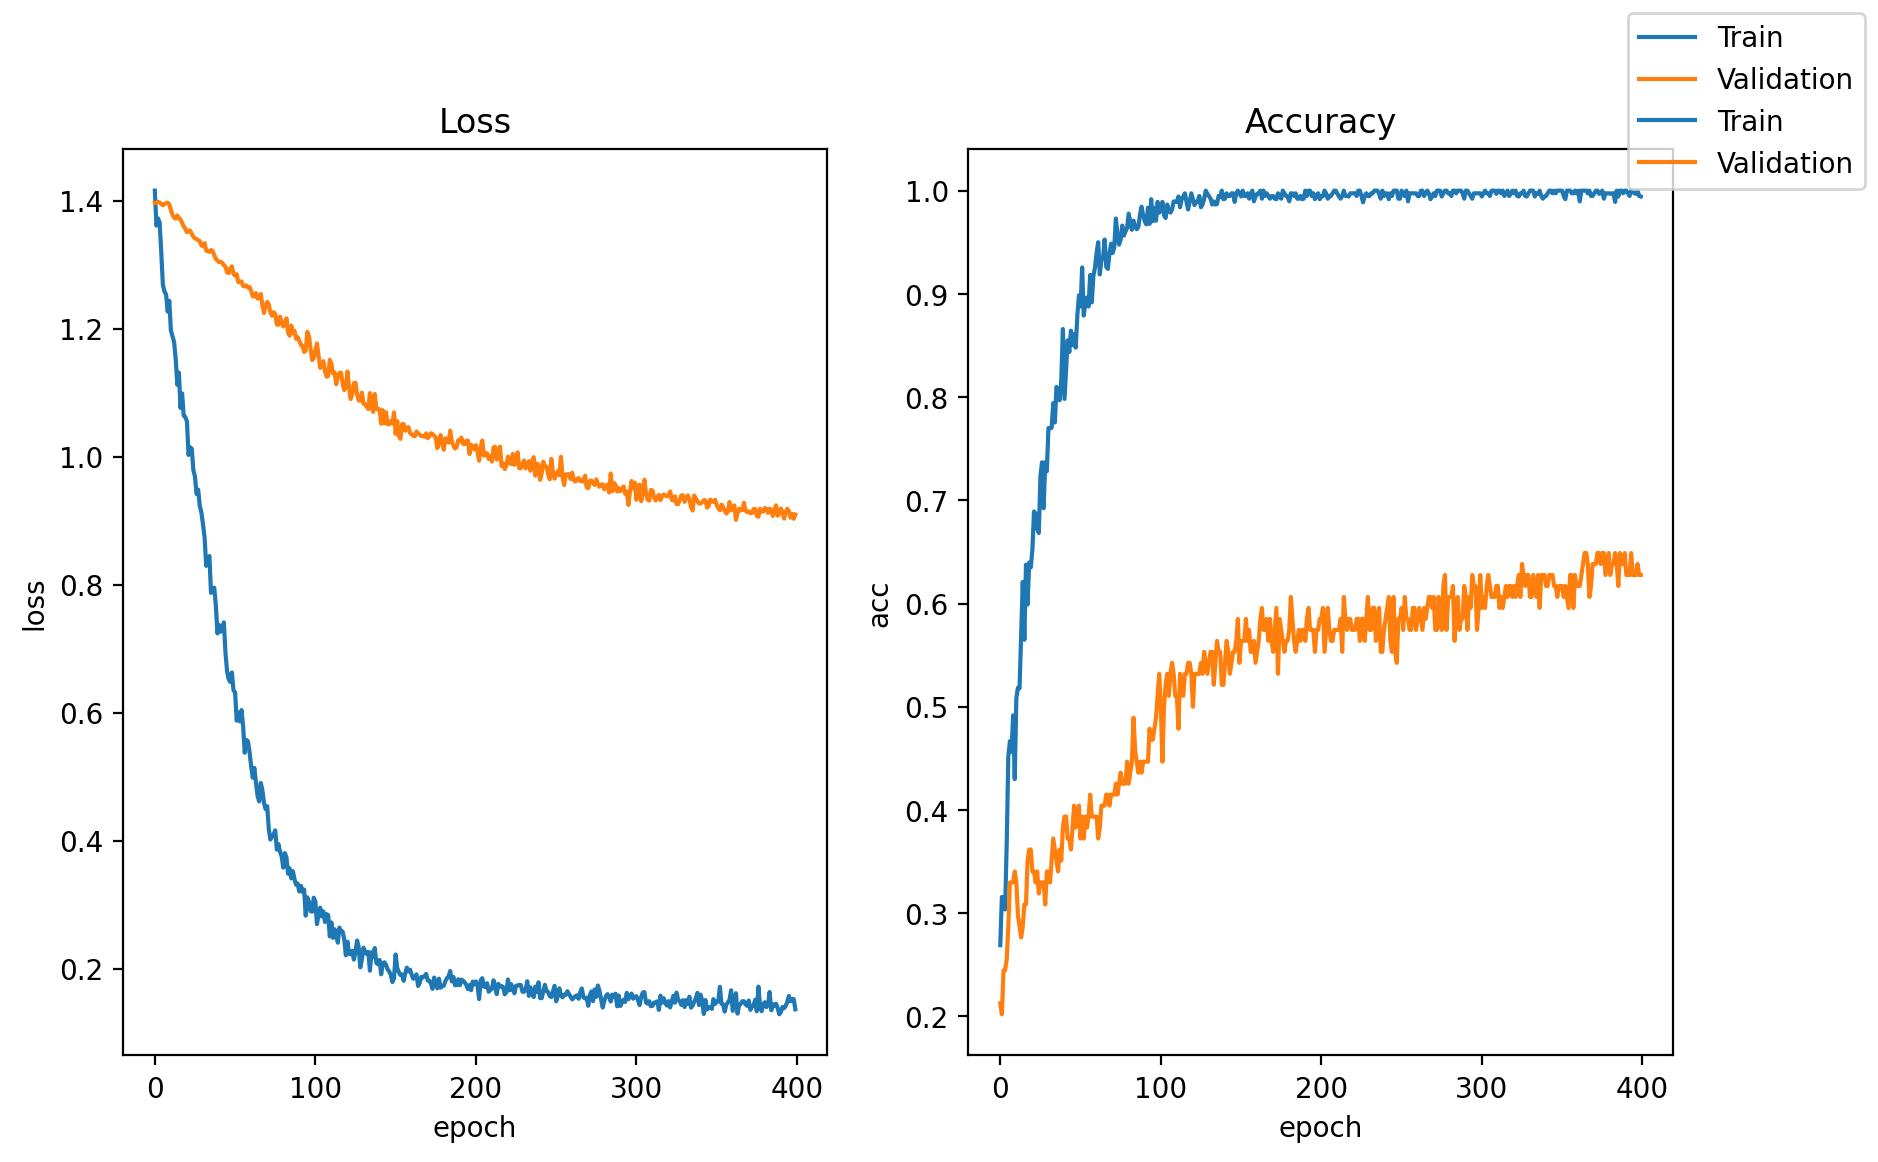

Test accuracy in trail 9: 0.57
The average test accuracy:0.6380000000000001


In [3]:
encoder_opt = {
    'conv1_size': 5,
    'conv1_out_channel': 22,
    'conv2_size': 5,
    'conv2_out_channel': 22,
    'conv3_size': 5,
    'conv3_out_channel': 12,
    'conv1_pool':2,
    'conv2_pool':2,
    'conv3_pool':2,
    'activation': 'none',
    'pool_type': 'max'    
}
decoder_opt={
    'drop_rate': 0.9, 
    'linear1_out': 64, 
    'activation': 'leaky_relu',
    'avg_pool_size':4
}
model_opt = {
    'decoder_opt':decoder_opt,
    'encoder_opt':encoder_opt,
}

train_options = {
    'train_batch_size': 64,
    'scheduler_patience': 150,
    'scheduler_factor': 0.5,
    'weight_decay': 0.15,
    'val_batch_size': 1,
    'learning_rate': 1e-4,
    'epoch_num': 400,
    'downsample_split': True,
    'overfit_threshold':0
}
data_dir = {
    'X_train_dir': X_train_val,
    'y_train_dir':y_train_val,
    'X_test_dir': X_test,
    'y_test_dir':y_test,
}


loss_fn = nn.CrossEntropyLoss()

test_acc,avg_acc = avg_test_acc(EEG1D3LCNN,(1,22,500),data_dir,loss_fn,
                        train_options,model_opt,trails=10)
print('The average test accuracy:{}'.format(avg_acc))

In [4]:
print('1D3LCNN average test accuracy:{}'.format(avg_acc))

1D3LCNN average test accuracy:0.6380000000000001


## Test on PSCNN 

Start training...
Epoch	Train Loss	Train Acc	Test Loss	Test_Acc	
0	1.390978	0.255594	1.365216	0.319149	
1	1.365161	0.369502	1.378522	0.361702	
2	1.350915	0.386092	1.373002	0.361702	
3	1.339963	0.385610	1.366157	0.372340	
4	1.333327	0.392458	1.360770	0.361702	
5	1.331424	0.353588	1.357654	0.351064	
6	1.313175	0.499035	1.346599	0.308511	
7	1.306965	0.493345	1.357837	0.404255	
8	1.295814	0.504051	1.351365	0.393617	
9	1.286357	0.541474	1.341427	0.361702	
10	1.281031	0.573206	1.338025	0.372340	
11	1.276668	0.534529	1.334092	0.372340	
12	1.268487	0.536265	1.341914	0.393617	
13	1.259913	0.618924	1.316631	0.457447	
14	1.249974	0.600887	1.331765	0.436170	
15	1.243878	0.626254	1.319400	0.404255	
16	1.239985	0.596644	1.315468	0.436170	
17	1.229415	0.695602	1.313871	0.489362	
18	1.221183	0.714603	1.312408	0.425532	
19	1.216726	0.702064	1.302999	0.436170	
20	1.207687	0.712963	1.313085	0.436170	
21	1.201237	0.744695	1.299988	0.510638	
22	1.191298	0.732832	1.304323	0.446809	
23	1.188342	0.752025	1.30

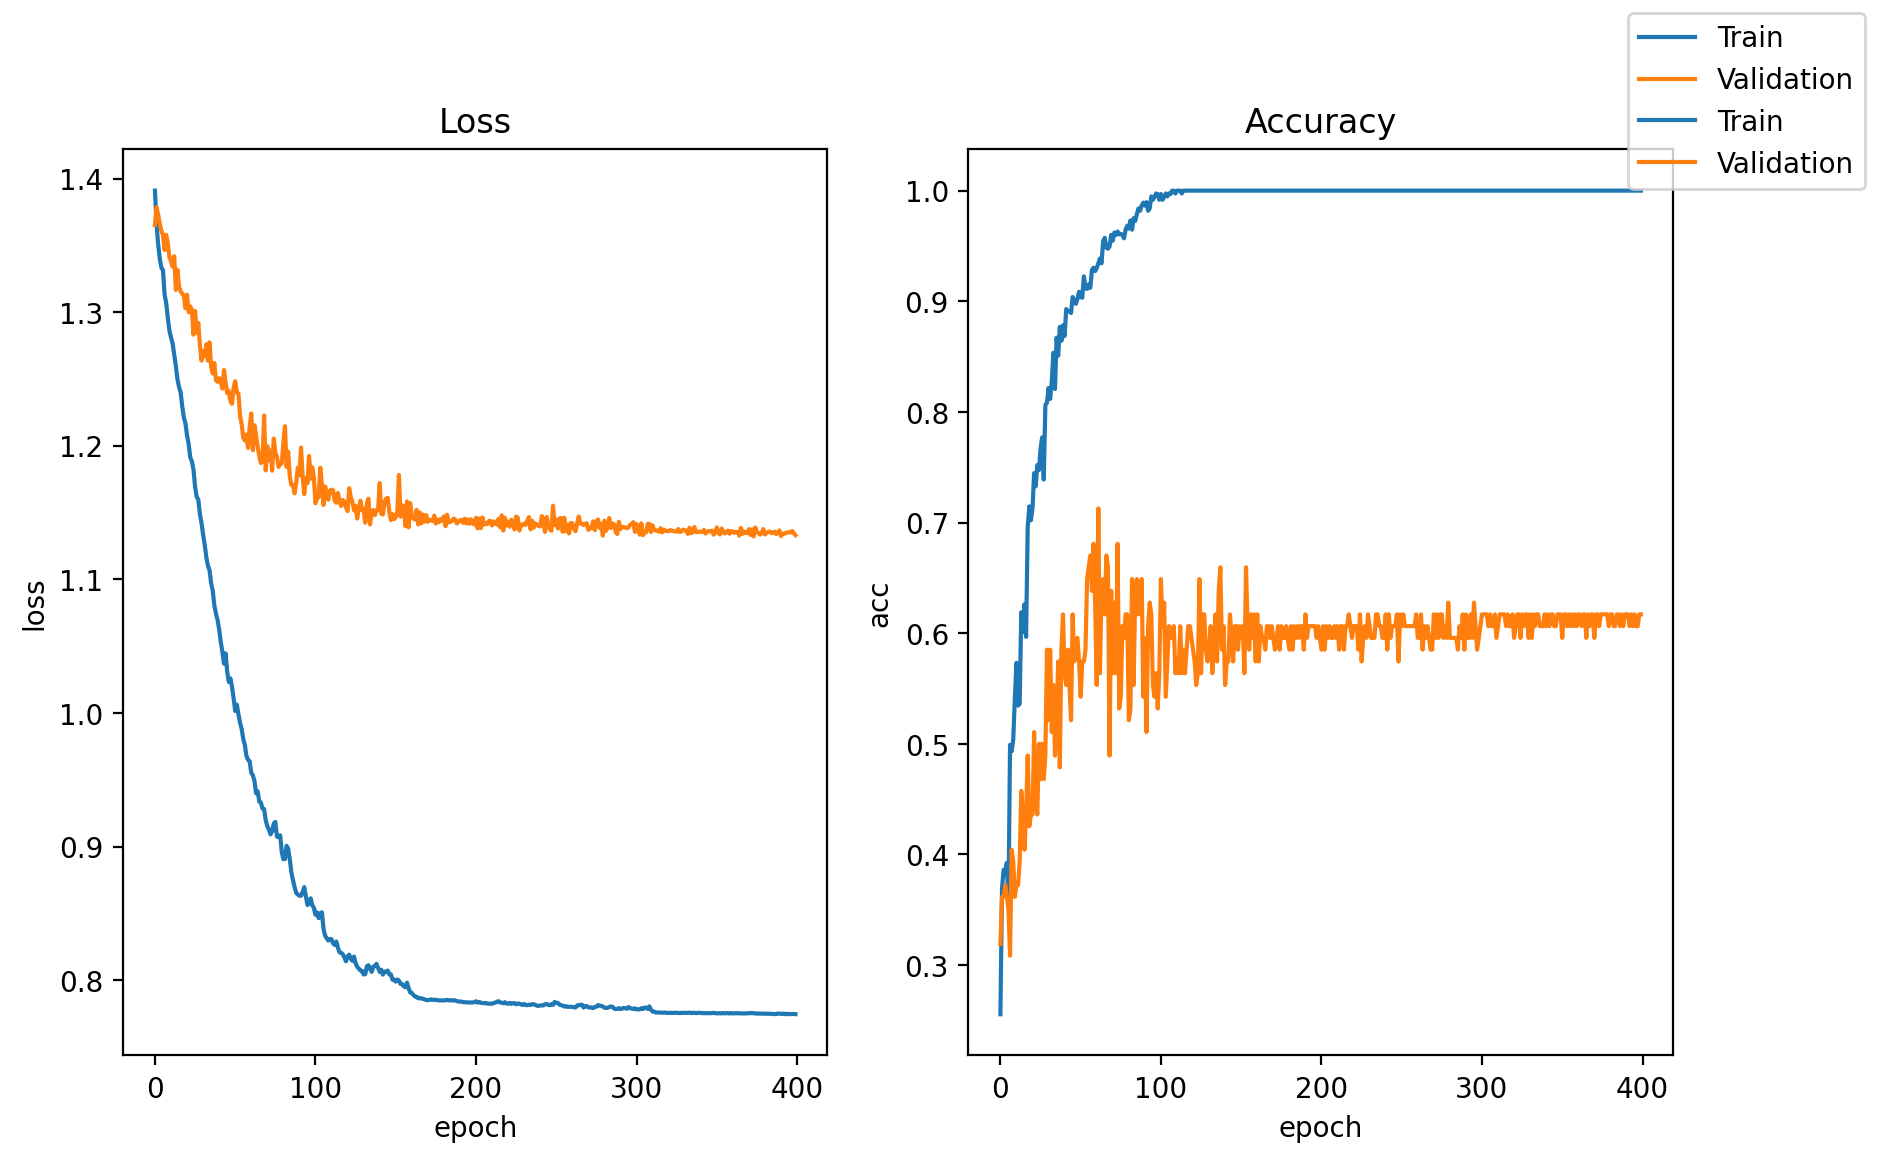

Test accuracy in trail 0: 0.6
Start training...
Epoch	Train Loss	Train Acc	Test Loss	Test_Acc	
0	1.393706	0.270930	1.381716	0.276596	
1	1.371448	0.282311	1.395077	0.223404	
2	1.366840	0.311921	1.393972	0.255319	
3	1.350813	0.327836	1.368771	0.329787	
4	1.342550	0.369020	1.355970	0.319149	
5	1.330733	0.430363	1.369534	0.308511	
6	1.320001	0.484857	1.368911	0.361702	
7	1.313384	0.526717	1.371807	0.287234	
8	1.302060	0.523438	1.361518	0.319149	
9	1.294796	0.554977	1.356045	0.340426	
10	1.284918	0.557581	1.359705	0.308511	
11	1.277592	0.637346	1.367906	0.287234	
12	1.269775	0.568191	1.355995	0.382979	
13	1.256016	0.637828	1.350132	0.297872	
14	1.247930	0.698785	1.355708	0.351064	
15	1.240981	0.639468	1.353888	0.372340	
16	1.230326	0.655189	1.357020	0.265957	
17	1.224084	0.732639	1.345748	0.404255	
18	1.215476	0.693962	1.336059	0.414894	
19	1.205144	0.751061	1.345508	0.351064	
20	1.195350	0.746335	1.334069	0.457447	
21	1.186661	0.751543	1.337460	0.393617	
22	1.176322	0.798225	1.332233	0.404

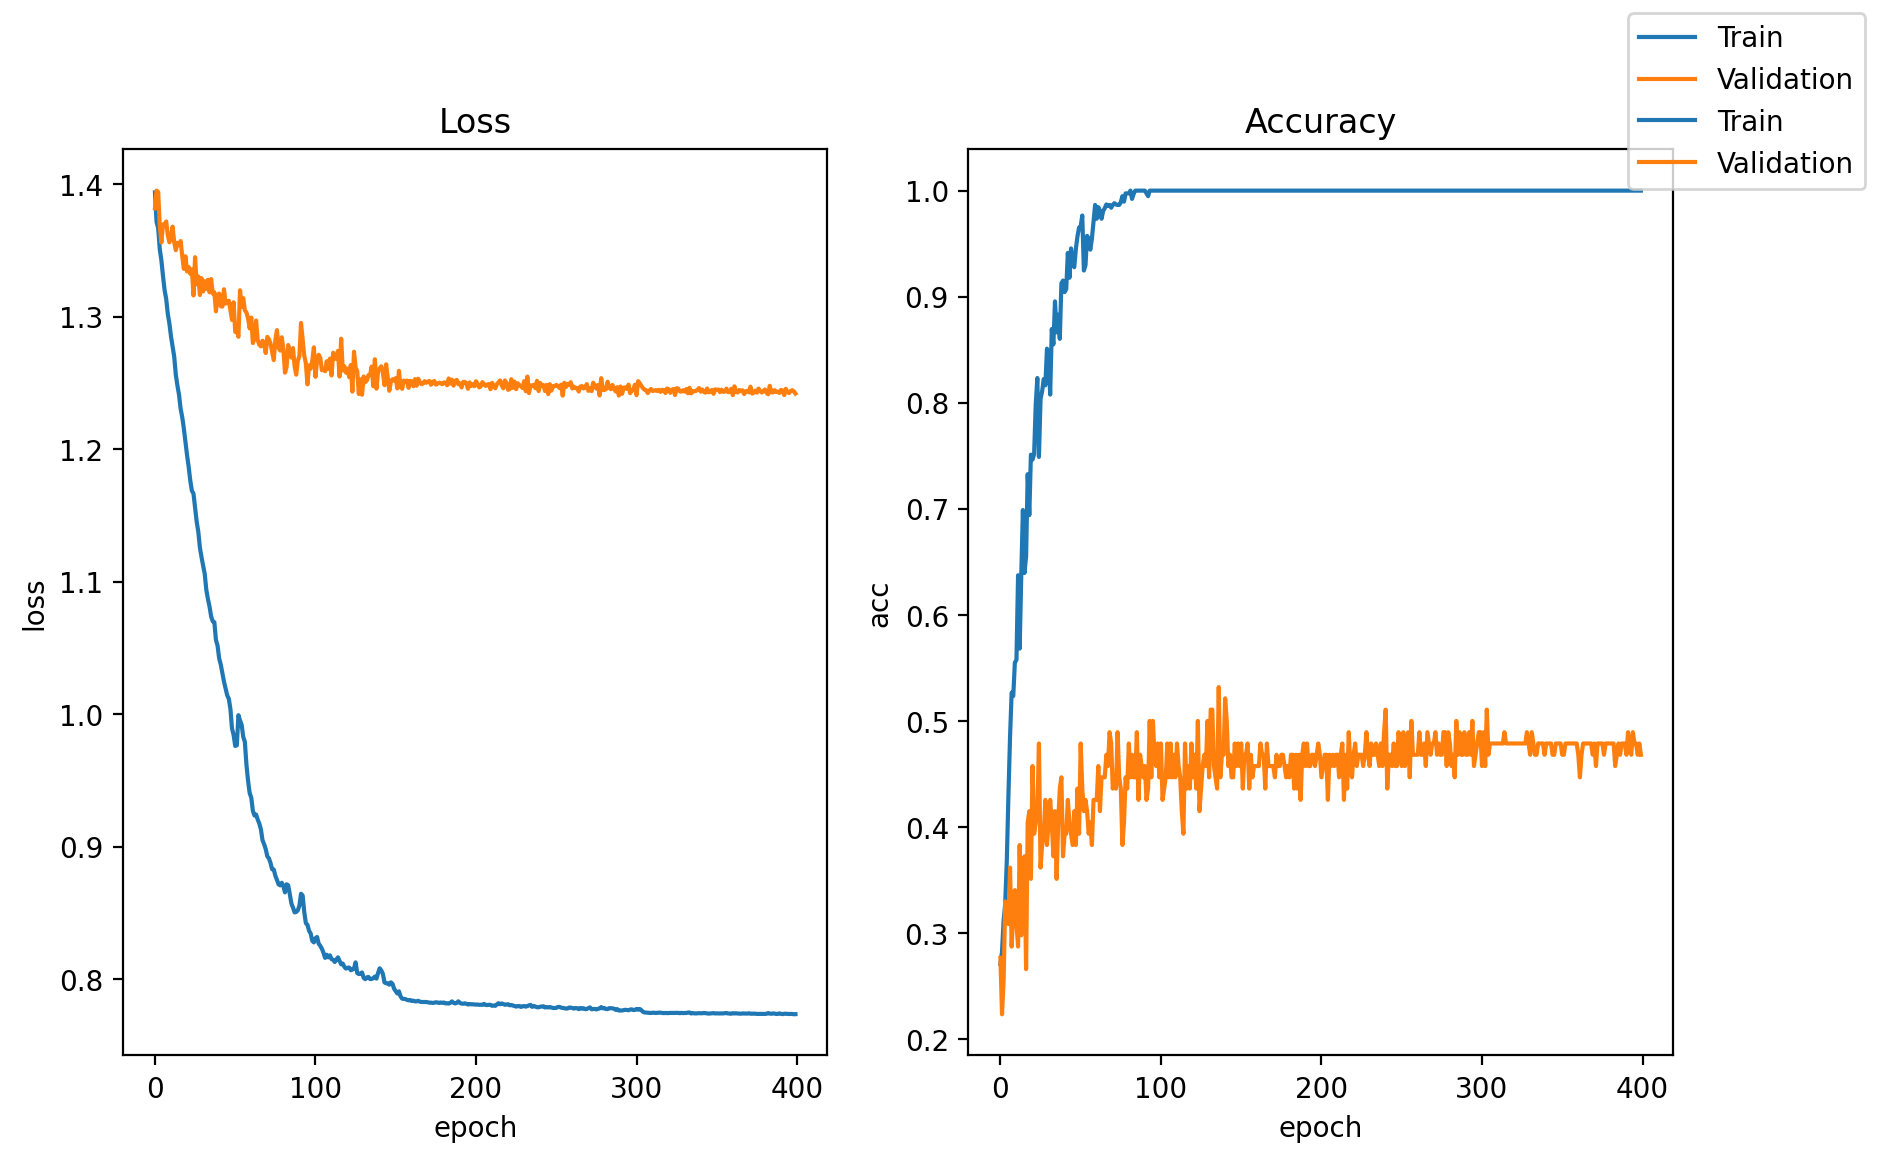

Test accuracy in trail 1: 0.53
Start training...
Epoch	Train Loss	Train Acc	Test Loss	Test_Acc	
0	1.400904	0.225019	1.381984	0.308511	
1	1.376071	0.299865	1.390254	0.308511	
2	1.361105	0.414931	1.379362	0.329787	
3	1.350948	0.409047	1.372150	0.382979	
4	1.339557	0.504051	1.376869	0.329787	
5	1.329038	0.527199	1.363479	0.361702	
6	1.318465	0.534144	1.364531	0.372340	
7	1.308619	0.570023	1.354713	0.382979	
8	1.298900	0.548997	1.349647	0.404255	
9	1.290926	0.648341	1.351564	0.382979	
10	1.277395	0.631462	1.340757	0.414894	
11	1.273216	0.592014	1.341148	0.404255	
12	1.259827	0.649498	1.336857	0.425532	
13	1.249289	0.712191	1.325575	0.351064	
14	1.241282	0.655382	1.333614	0.372340	
15	1.229400	0.704186	1.319284	0.393617	
16	1.221339	0.700617	1.315355	0.446809	
17	1.211694	0.766686	1.316087	0.468085	
18	1.203108	0.757427	1.313000	0.446809	
19	1.193544	0.775463	1.314734	0.414894	
20	1.184719	0.799865	1.308555	0.446809	
21	1.176317	0.779225	1.305681	0.414894	
22	1.165537	0.803434	1.299028	0.45

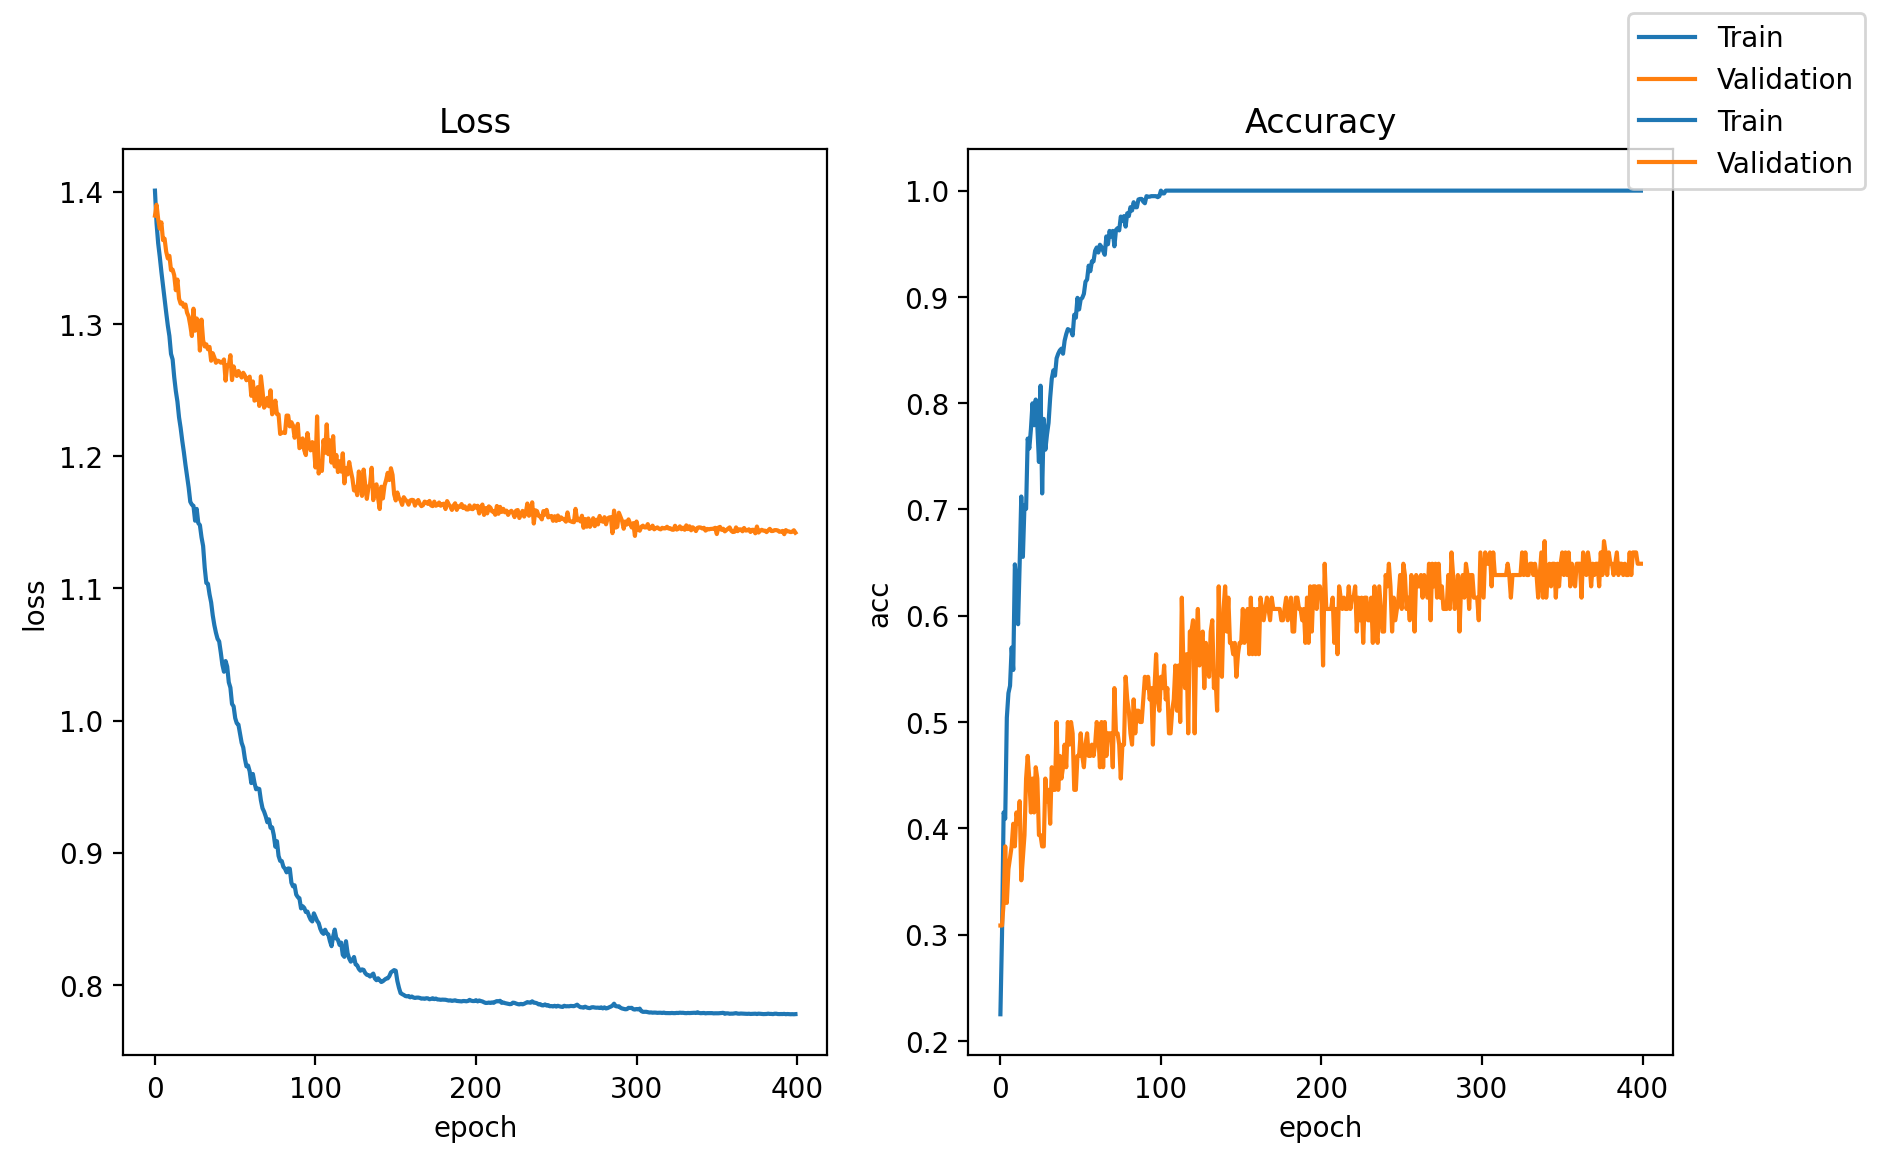

Test accuracy in trail 2: 0.58
Start training...
Epoch	Train Loss	Train Acc	Test Loss	Test_Acc	
0	1.390722	0.275270	1.393684	0.255319	
1	1.374788	0.293210	1.396922	0.244681	
2	1.359410	0.354745	1.403519	0.170213	
3	1.347850	0.364969	1.386328	0.234043	
4	1.334554	0.467593	1.377344	0.319149	
5	1.322635	0.563657	1.380248	0.340426	
6	1.314390	0.506366	1.380588	0.276596	
7	1.305056	0.521991	1.370486	0.361702	
8	1.292223	0.576485	1.369033	0.308511	
9	1.284730	0.575521	1.367013	0.340426	
10	1.276071	0.585262	1.358626	0.404255	
11	1.267180	0.586709	1.353446	0.382979	
12	1.263485	0.593075	1.353470	0.361702	
13	1.250860	0.620370	1.348883	0.372340	
14	1.240902	0.630980	1.349552	0.329787	
15	1.237921	0.599730	1.340471	0.361702	
16	1.237189	0.560185	1.345122	0.425532	
17	1.244681	0.604263	1.333055	0.414894	
18	1.216723	0.646605	1.338992	0.372340	
19	1.213392	0.639757	1.338820	0.436170	
20	1.208917	0.650656	1.331321	0.393617	
21	1.196189	0.653260	1.325019	0.361702	
22	1.192842	0.692998	1.324585	0.40

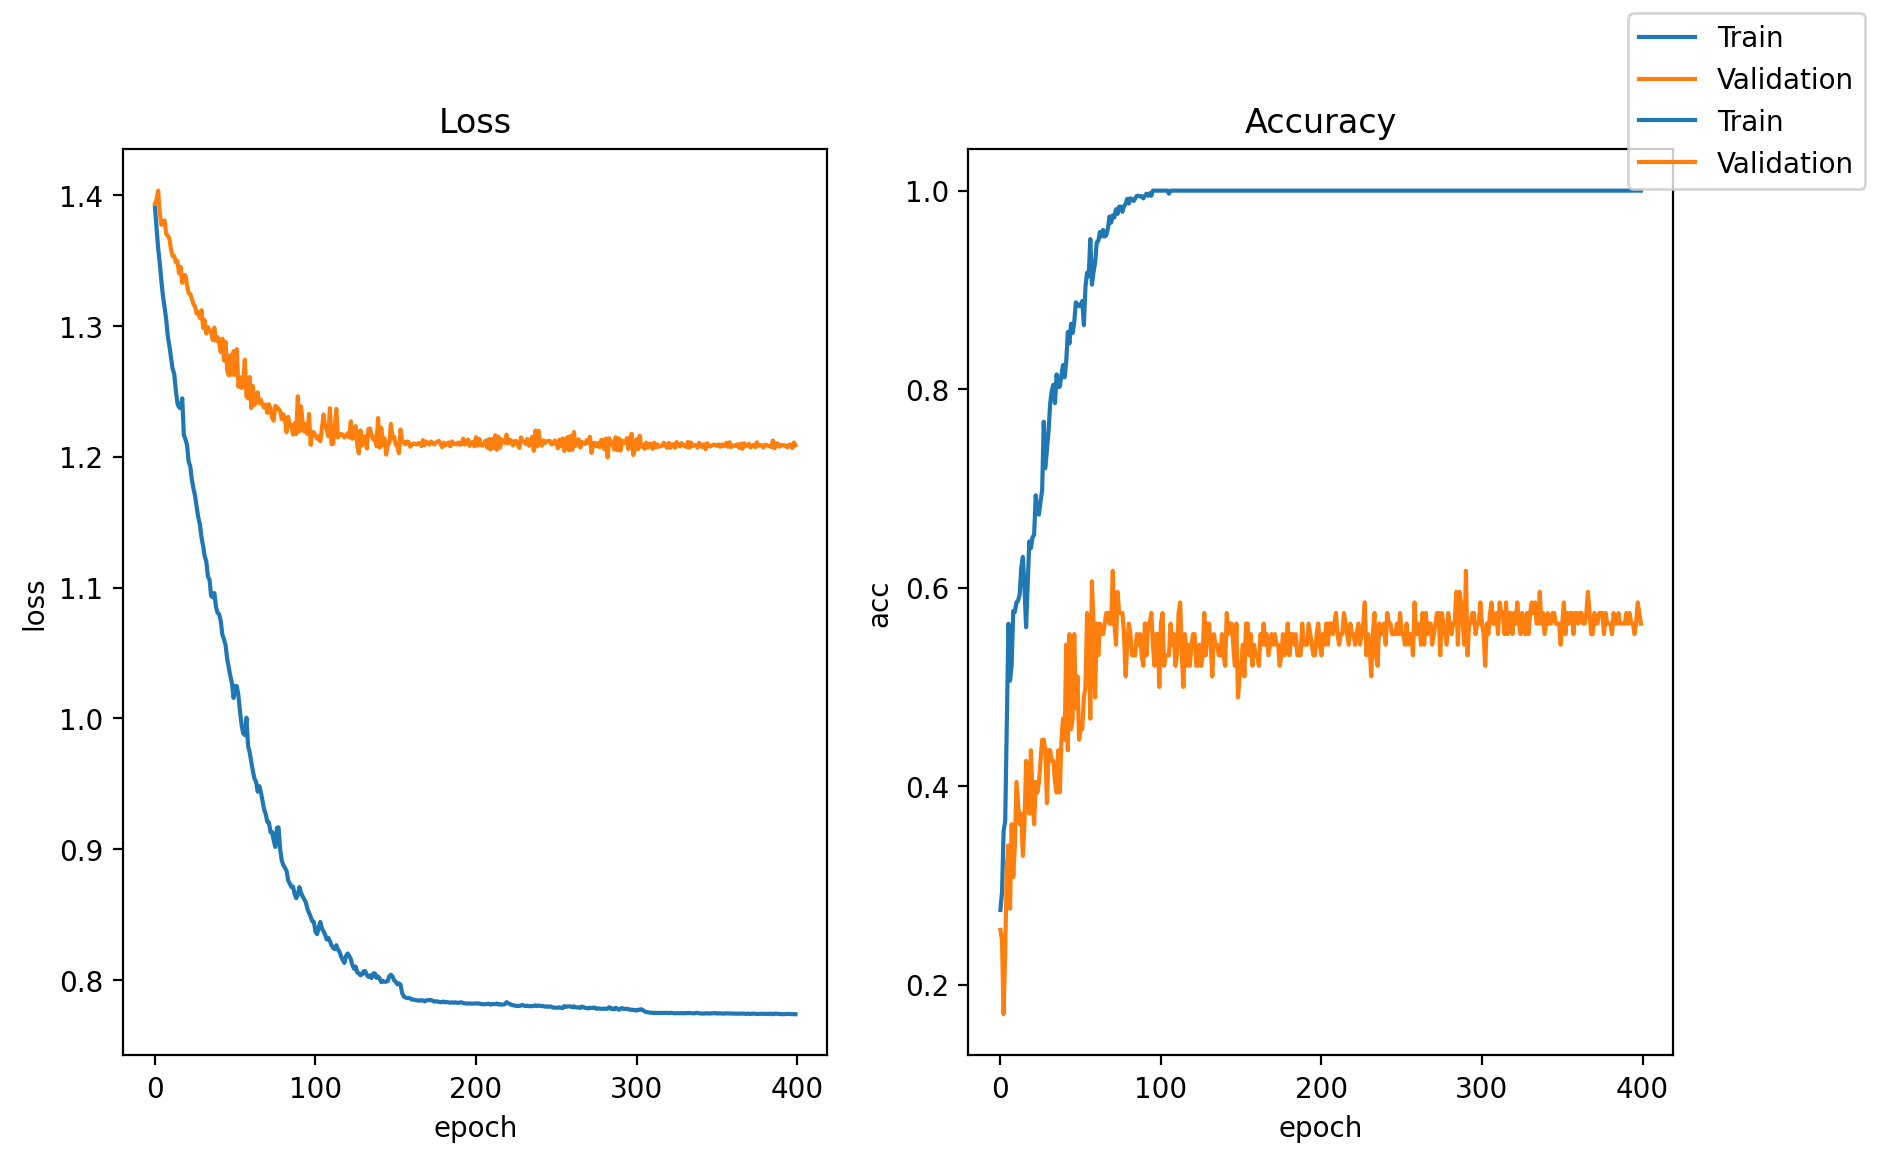

Test accuracy in trail 3: 0.45
Start training...
Epoch	Train Loss	Train Acc	Test Loss	Test_Acc	
0	1.381778	0.297261	1.440957	0.191489	
1	1.359060	0.338252	1.439337	0.180851	
2	1.345735	0.446277	1.417502	0.234043	
3	1.336651	0.409722	1.420165	0.180851	
4	1.324873	0.427083	1.427942	0.191489	
5	1.316293	0.447145	1.416403	0.223404	
6	1.303989	0.542631	1.403718	0.308511	
7	1.294090	0.570602	1.406905	0.276596	
8	1.284237	0.527778	1.406113	0.287234	
9	1.277922	0.564140	1.408938	0.287234	
10	1.267008	0.601177	1.381344	0.351064	
11	1.260798	0.634549	1.402124	0.308511	
12	1.252969	0.585745	1.389375	0.329787	
13	1.246596	0.646605	1.379143	0.319149	
14	1.235792	0.641204	1.395823	0.319149	
15	1.229472	0.643036	1.374300	0.372340	
16	1.222226	0.651620	1.382606	0.319149	
17	1.209717	0.666281	1.380873	0.340426	
18	1.205214	0.661073	1.369741	0.372340	
19	1.202131	0.673129	1.380662	0.329787	
20	1.191875	0.670332	1.363758	0.361702	
21	1.184825	0.692323	1.376512	0.372340	
22	1.177987	0.688079	1.362503	0.34

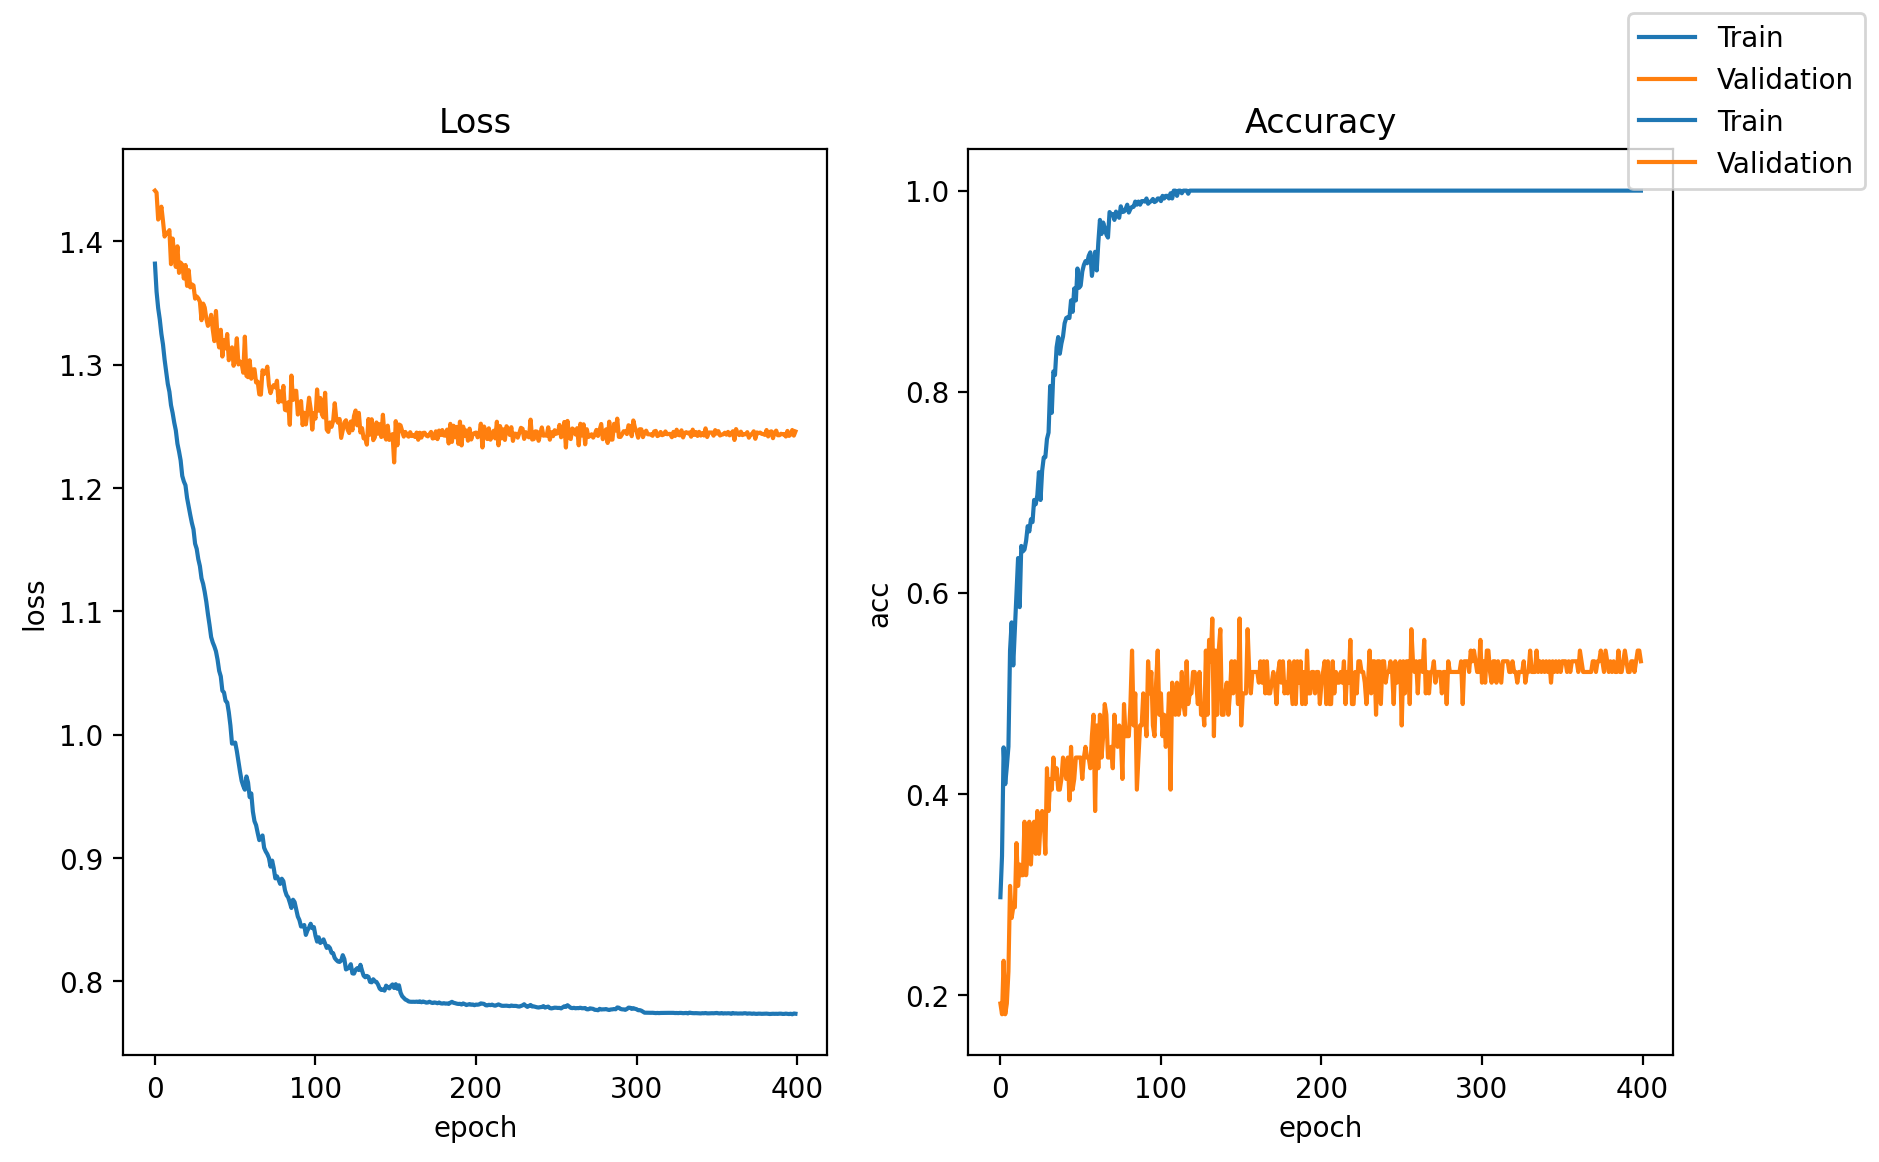

Test accuracy in trail 4: 0.47
Start training...
Epoch	Train Loss	Train Acc	Test Loss	Test_Acc	
0	1.408466	0.247975	1.392119	0.276596	
1	1.386546	0.312211	1.368804	0.372340	
2	1.383920	0.271412	1.369897	0.276596	
3	1.367126	0.322917	1.378784	0.276596	
4	1.358289	0.431327	1.379476	0.255319	
5	1.353214	0.431038	1.375517	0.265957	
6	1.334465	0.465471	1.365525	0.404255	
7	1.339244	0.369309	1.360210	0.414894	
8	1.323531	0.427951	1.357014	0.351064	
9	1.316681	0.473283	1.360214	0.361702	
10	1.306310	0.603492	1.362557	0.329787	
11	1.295816	0.604263	1.349848	0.500000	
12	1.289106	0.583623	1.352728	0.351064	
13	1.281341	0.636671	1.355191	0.340426	
14	1.273194	0.627411	1.344552	0.351064	
15	1.261988	0.643519	1.350032	0.340426	
16	1.255146	0.673129	1.345511	0.382979	
17	1.242755	0.694444	1.347231	0.319149	
18	1.236907	0.699363	1.345655	0.319149	
19	1.230581	0.750096	1.345868	0.297872	
20	1.220570	0.727816	1.337383	0.372340	
21	1.214432	0.724537	1.345856	0.308511	
22	1.197440	0.821181	1.344773	0.31

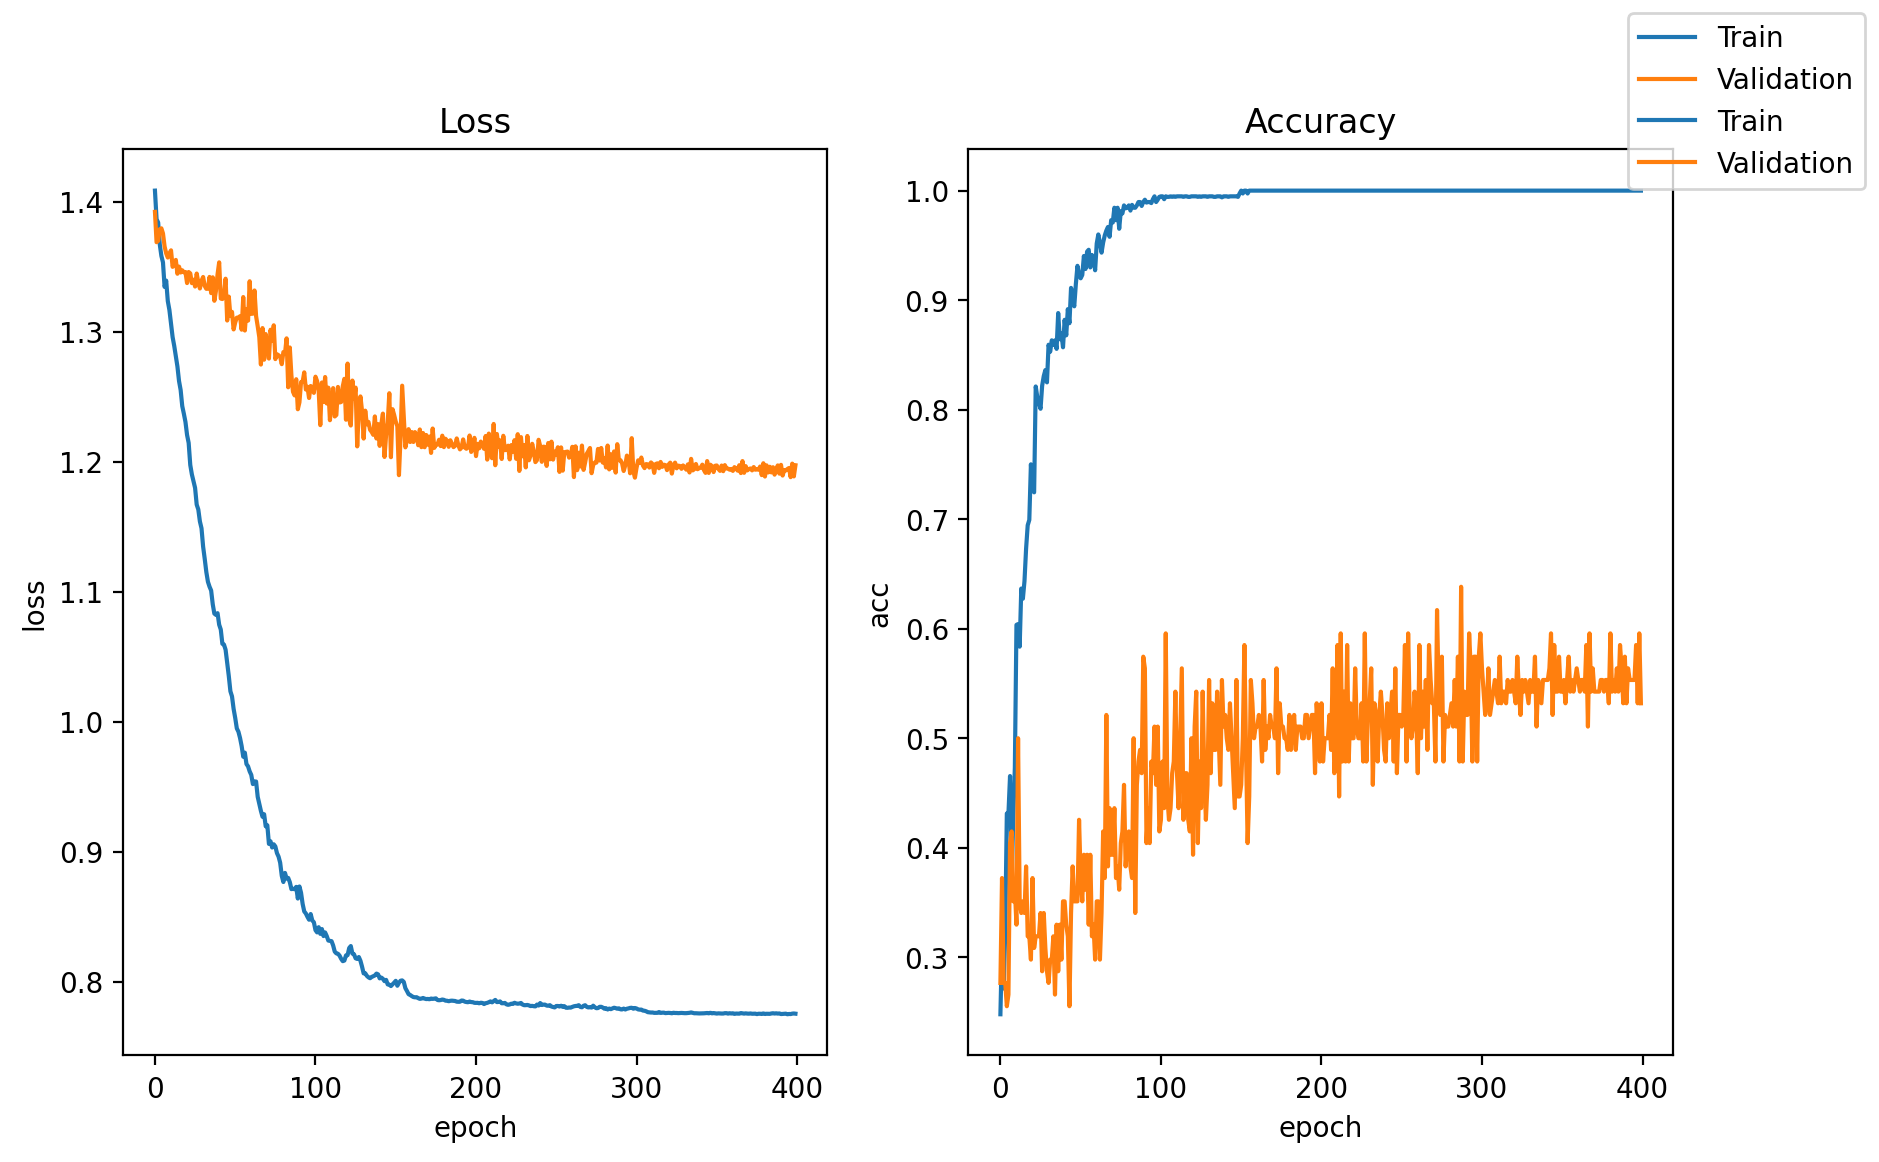

Test accuracy in trail 5: 0.54
Start training...
Epoch	Train Loss	Train Acc	Test Loss	Test_Acc	
0	1.392333	0.267458	1.404095	0.255319	
1	1.398632	0.289448	1.405444	0.255319	
2	1.375709	0.289448	1.388489	0.244681	
3	1.357271	0.414738	1.377360	0.308511	
4	1.350113	0.353588	1.384136	0.297872	
5	1.339703	0.406443	1.373592	0.287234	
6	1.330506	0.483218	1.372486	0.297872	
7	1.319893	0.470390	1.368421	0.297872	
8	1.314277	0.454282	1.365251	0.361702	
9	1.302935	0.480806	1.361232	0.393617	
10	1.300986	0.541763	1.364700	0.372340	
11	1.288866	0.597319	1.353293	0.414894	
12	1.278564	0.509163	1.355789	0.340426	
13	1.267047	0.575328	1.354728	0.393617	
14	1.263262	0.707272	1.354688	0.351064	
15	1.252997	0.618345	1.348514	0.329787	
16	1.249808	0.613233	1.344788	0.393617	
17	1.239293	0.617670	1.345227	0.425532	
18	1.234914	0.721258	1.340060	0.372340	
19	1.226850	0.650367	1.339738	0.425532	
20	1.217238	0.691165	1.336965	0.382979	
21	1.212717	0.678723	1.335123	0.425532	
22	1.201811	0.758873	1.330454	0.39

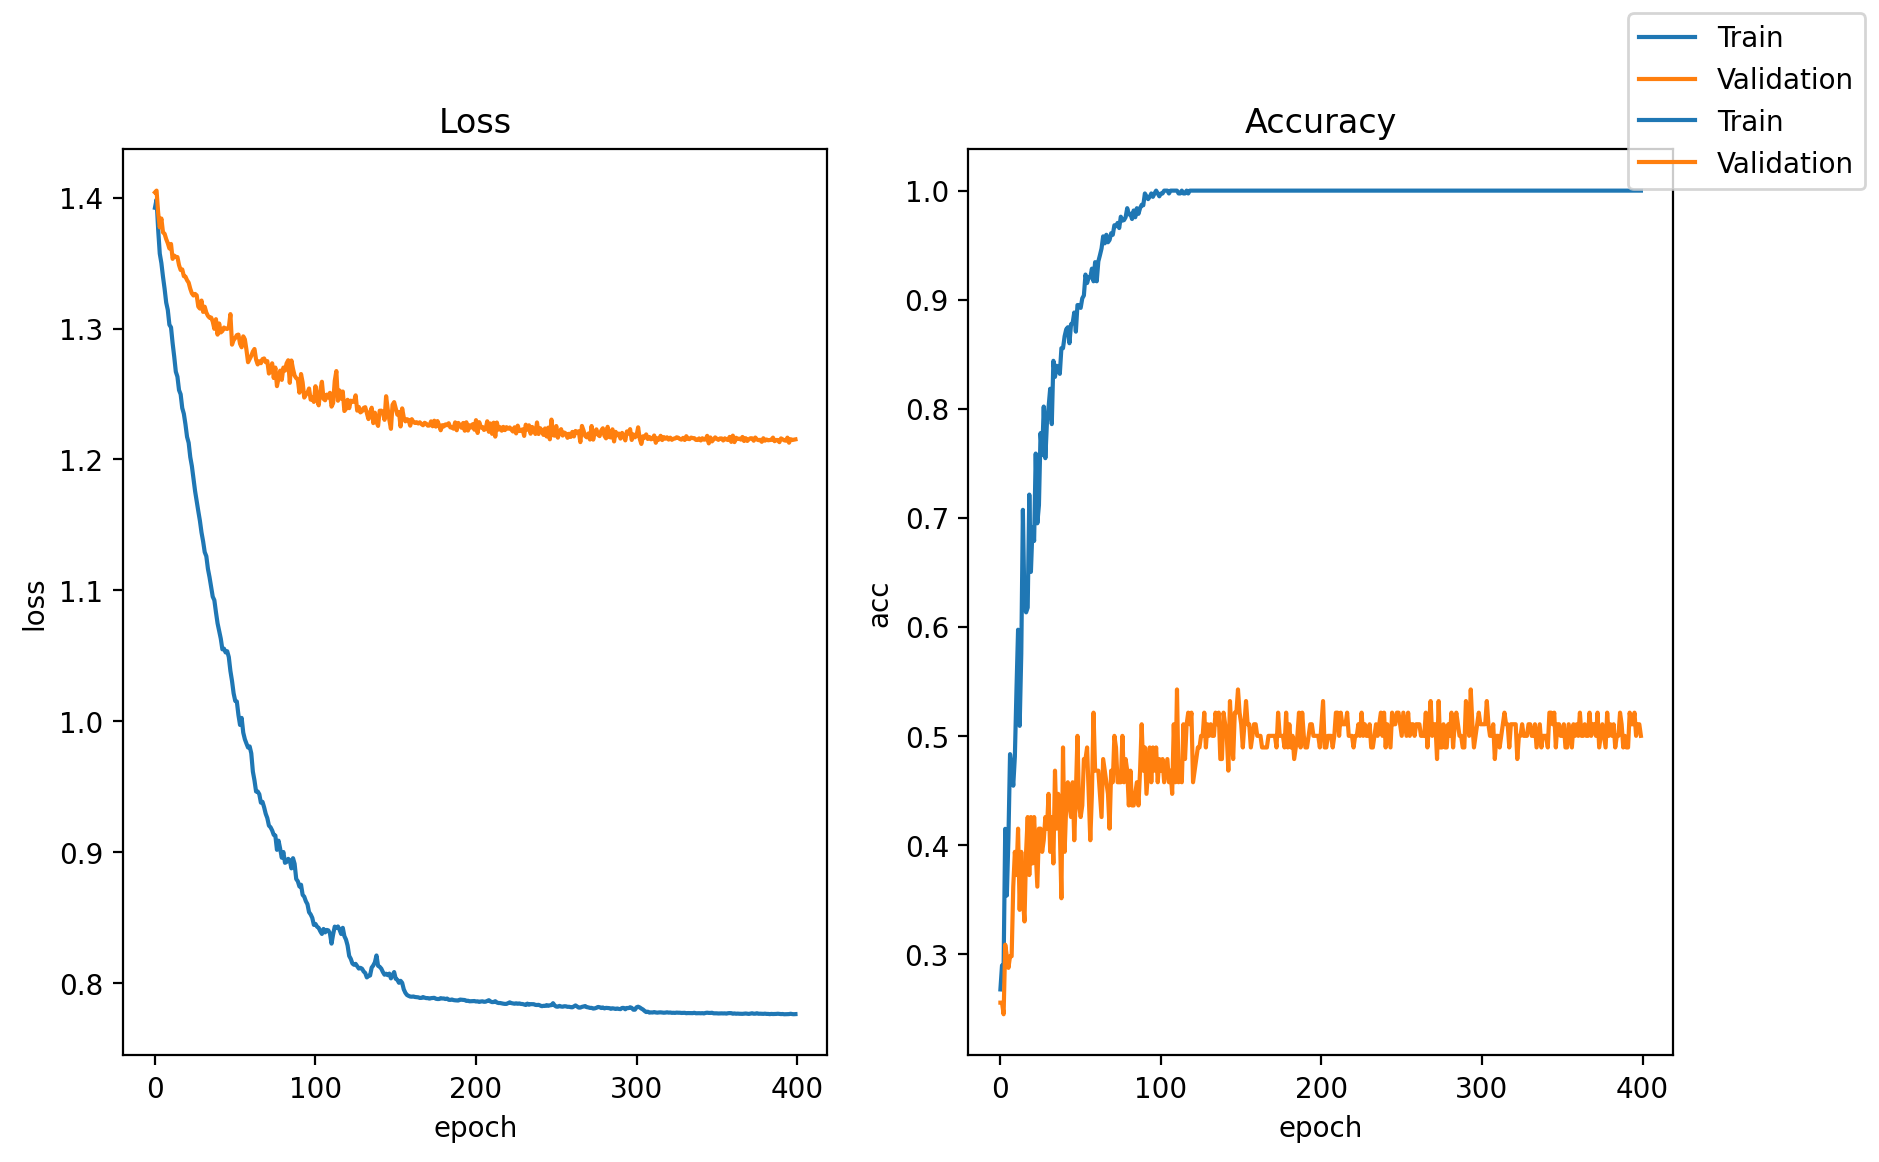

Test accuracy in trail 6: 0.61
Start training...
Epoch	Train Loss	Train Acc	Test Loss	Test_Acc	
0	1.397876	0.268326	1.377116	0.297872	
1	1.377182	0.320216	1.371114	0.319149	
2	1.361994	0.386574	1.373724	0.329787	
3	1.352400	0.333044	1.368154	0.340426	
4	1.341574	0.446470	1.368673	0.404255	
5	1.327592	0.519676	1.362269	0.340426	
6	1.318732	0.491416	1.359687	0.361702	
7	1.308929	0.562982	1.361695	0.340426	
8	1.297522	0.585455	1.351456	0.404255	
9	1.288490	0.567515	1.350179	0.361702	
10	1.281242	0.625579	1.350374	0.457447	
11	1.279672	0.565779	1.345142	0.329787	
12	1.259384	0.630980	1.346535	0.468085	
13	1.255892	0.663870	1.339188	0.351064	
14	1.242452	0.649498	1.335218	0.393617	
15	1.232976	0.653742	1.335584	0.351064	
16	1.226279	0.672454	1.334704	0.340426	
17	1.223008	0.649691	1.329326	0.372340	
18	1.214301	0.667921	1.338284	0.361702	
19	1.204490	0.717400	1.327046	0.372340	
20	1.194685	0.678819	1.333756	0.351064	
21	1.187933	0.726659	1.326501	0.382979	
22	1.177687	0.744213	1.324005	0.36

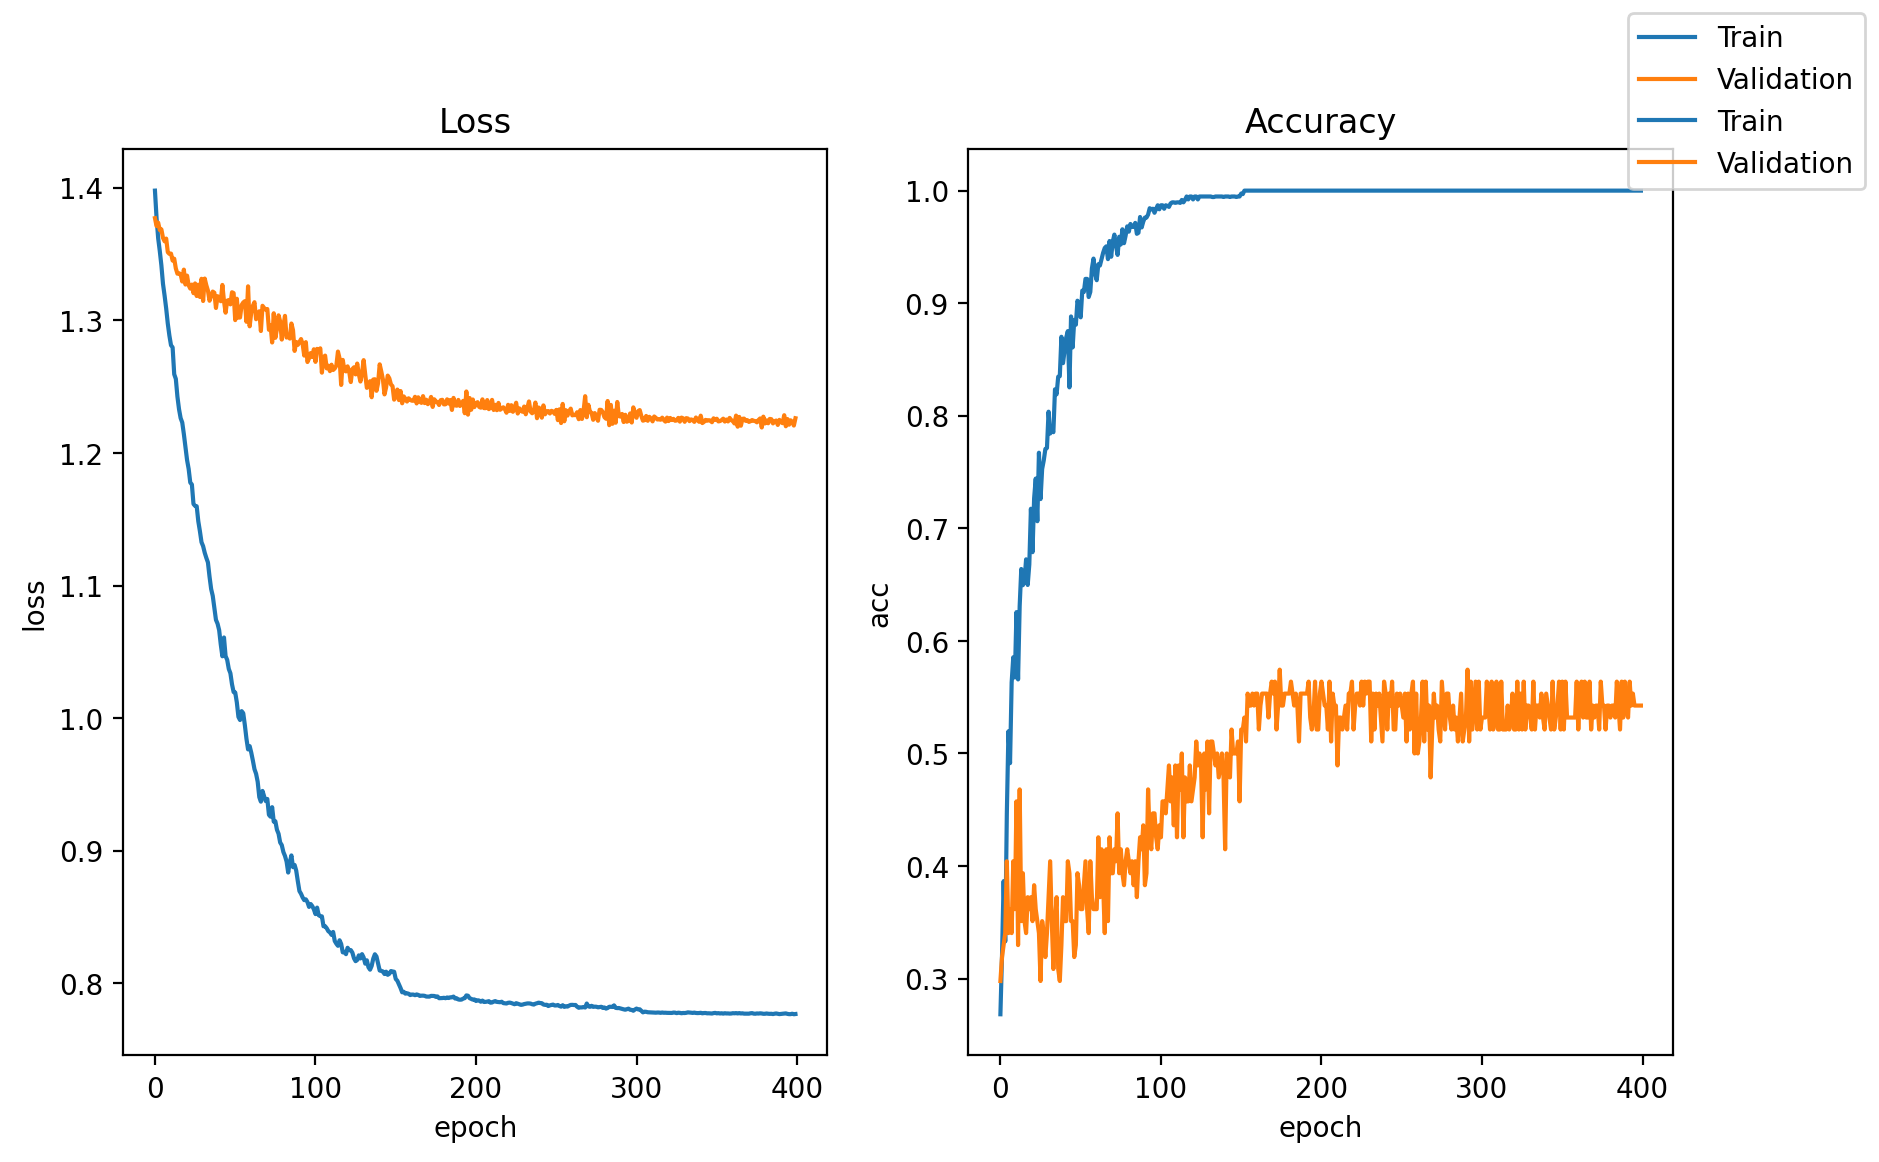

Test accuracy in trail 7: 0.57
Start training...
Epoch	Train Loss	Train Acc	Test Loss	Test_Acc	
0	1.394259	0.239198	1.384817	0.319149	
1	1.378706	0.273534	1.391107	0.212766	
2	1.364003	0.348669	1.401778	0.117021	
3	1.354651	0.458044	1.385407	0.287234	
4	1.348878	0.344425	1.386248	0.276596	
5	1.339686	0.409529	1.384711	0.287234	
6	1.333972	0.422550	1.371638	0.329787	
7	1.324836	0.495756	1.371981	0.308511	
8	1.314099	0.505208	1.373119	0.329787	
9	1.307506	0.508777	1.363683	0.340426	
10	1.299722	0.531732	1.359568	0.297872	
11	1.296300	0.593557	1.359228	0.276596	
12	1.282417	0.581694	1.353808	0.393617	
13	1.277294	0.538870	1.354748	0.265957	
14	1.268412	0.637153	1.350813	0.329787	
15	1.258178	0.614680	1.344785	0.351064	
16	1.249696	0.638600	1.346400	0.287234	
17	1.241861	0.680748	1.340384	0.329787	
18	1.231887	0.680266	1.340028	0.276596	
19	1.223002	0.692805	1.336533	0.361702	
20	1.214006	0.691840	1.335509	0.319149	
21	1.205891	0.716435	1.332314	0.329787	
22	1.195938	0.743731	1.329350	0.32

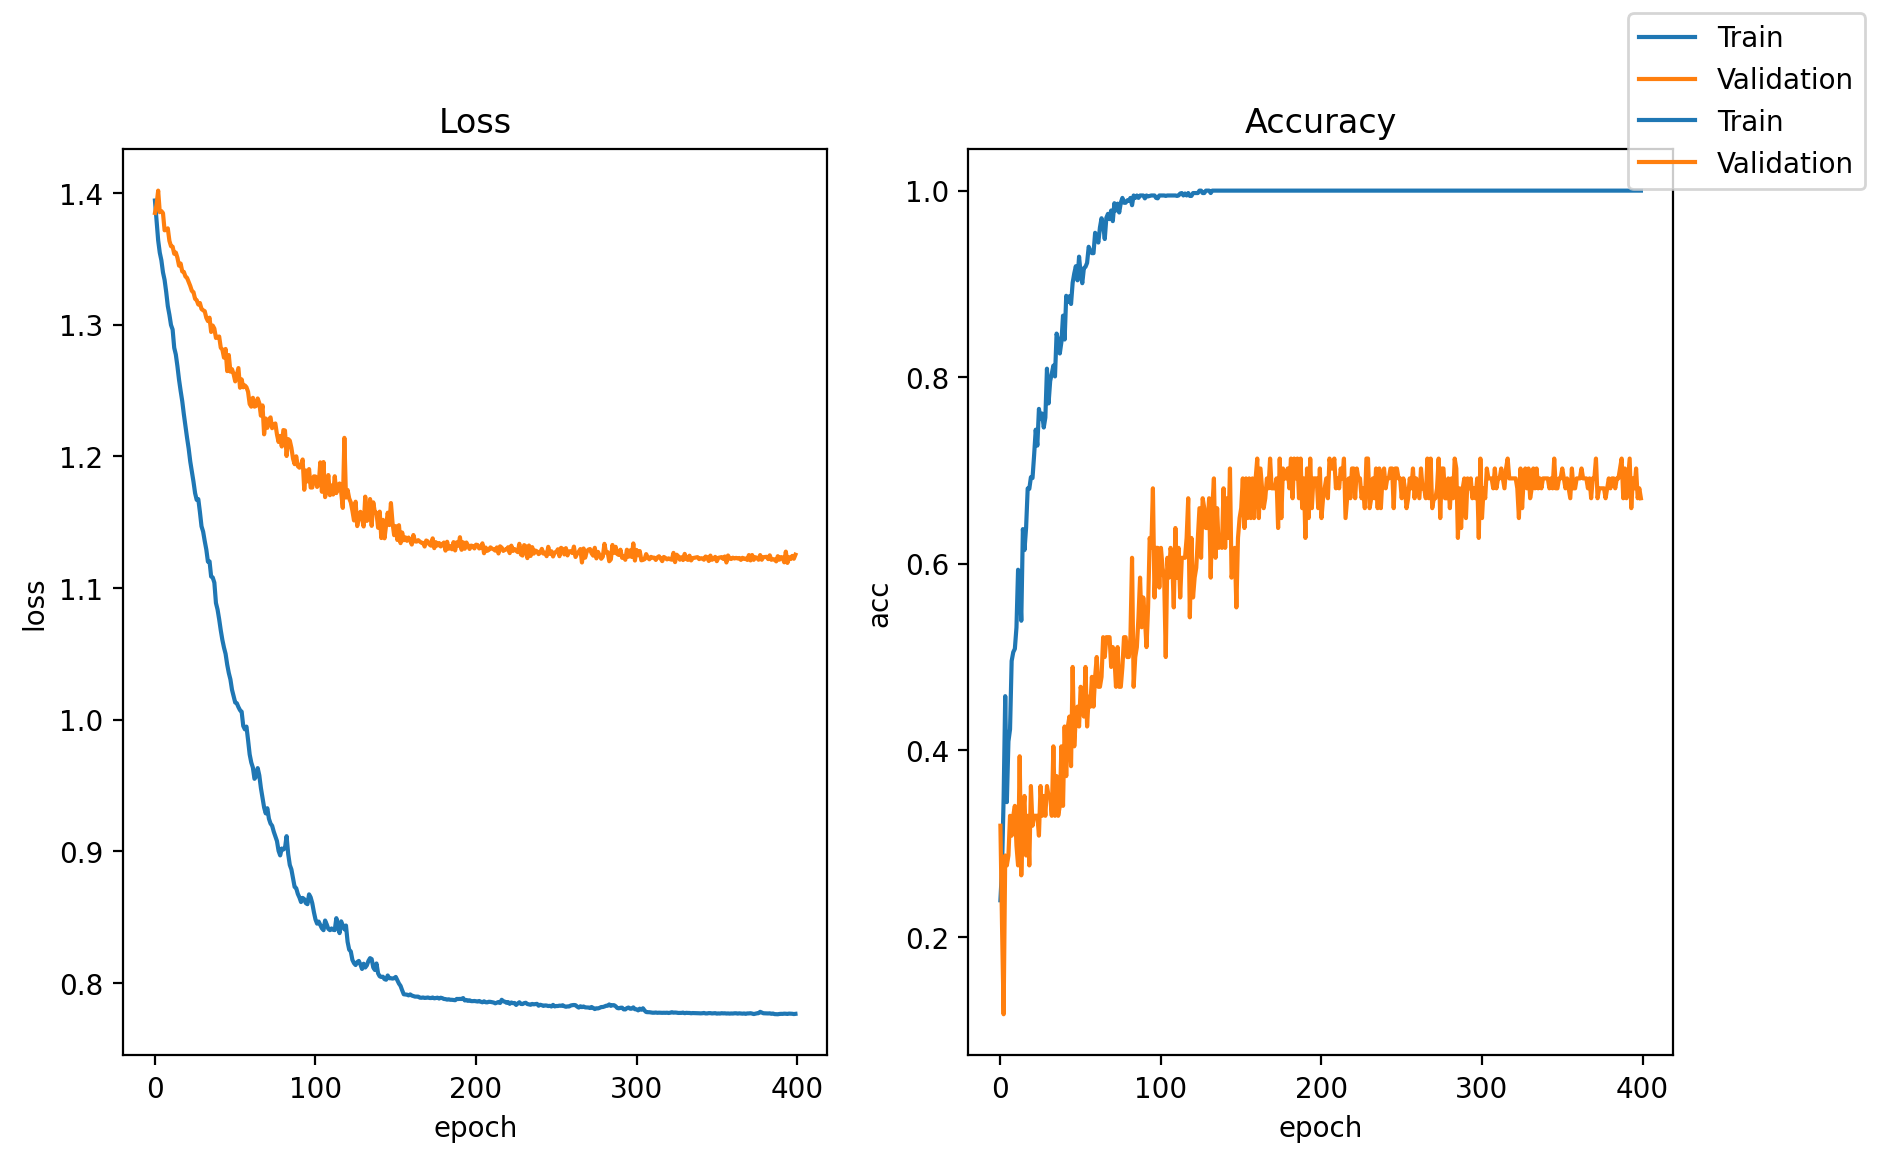

Test accuracy in trail 8: 0.6
Start training...
Epoch	Train Loss	Train Acc	Test Loss	Test_Acc	
0	1.379854	0.283565	1.390546	0.244681	
1	1.358167	0.323592	1.384578	0.287234	
2	1.347114	0.430845	1.376748	0.382979	
3	1.336484	0.399884	1.382330	0.308511	
4	1.323502	0.504244	1.377545	0.404255	
5	1.315810	0.561343	1.379275	0.351064	
6	1.307943	0.521508	1.384880	0.297872	
7	1.297559	0.594522	1.375009	0.329787	
8	1.291264	0.601273	1.378280	0.308511	
9	1.282970	0.547647	1.372099	0.351064	
10	1.272044	0.638117	1.371147	0.340426	
11	1.264432	0.590760	1.366837	0.372340	
12	1.259910	0.625289	1.364172	0.404255	
13	1.247651	0.614680	1.368735	0.329787	
14	1.242637	0.642554	1.359527	0.382979	
15	1.229184	0.655864	1.361615	0.382979	
16	1.224798	0.644290	1.356886	0.351064	
17	1.219841	0.657022	1.355999	0.393617	
18	1.209819	0.678337	1.353362	0.351064	
19	1.202322	0.709877	1.351919	0.372340	
20	1.203103	0.650849	1.354176	0.372340	
21	1.198314	0.664062	1.347238	0.372340	
22	1.191583	0.664352	1.347814	0.404

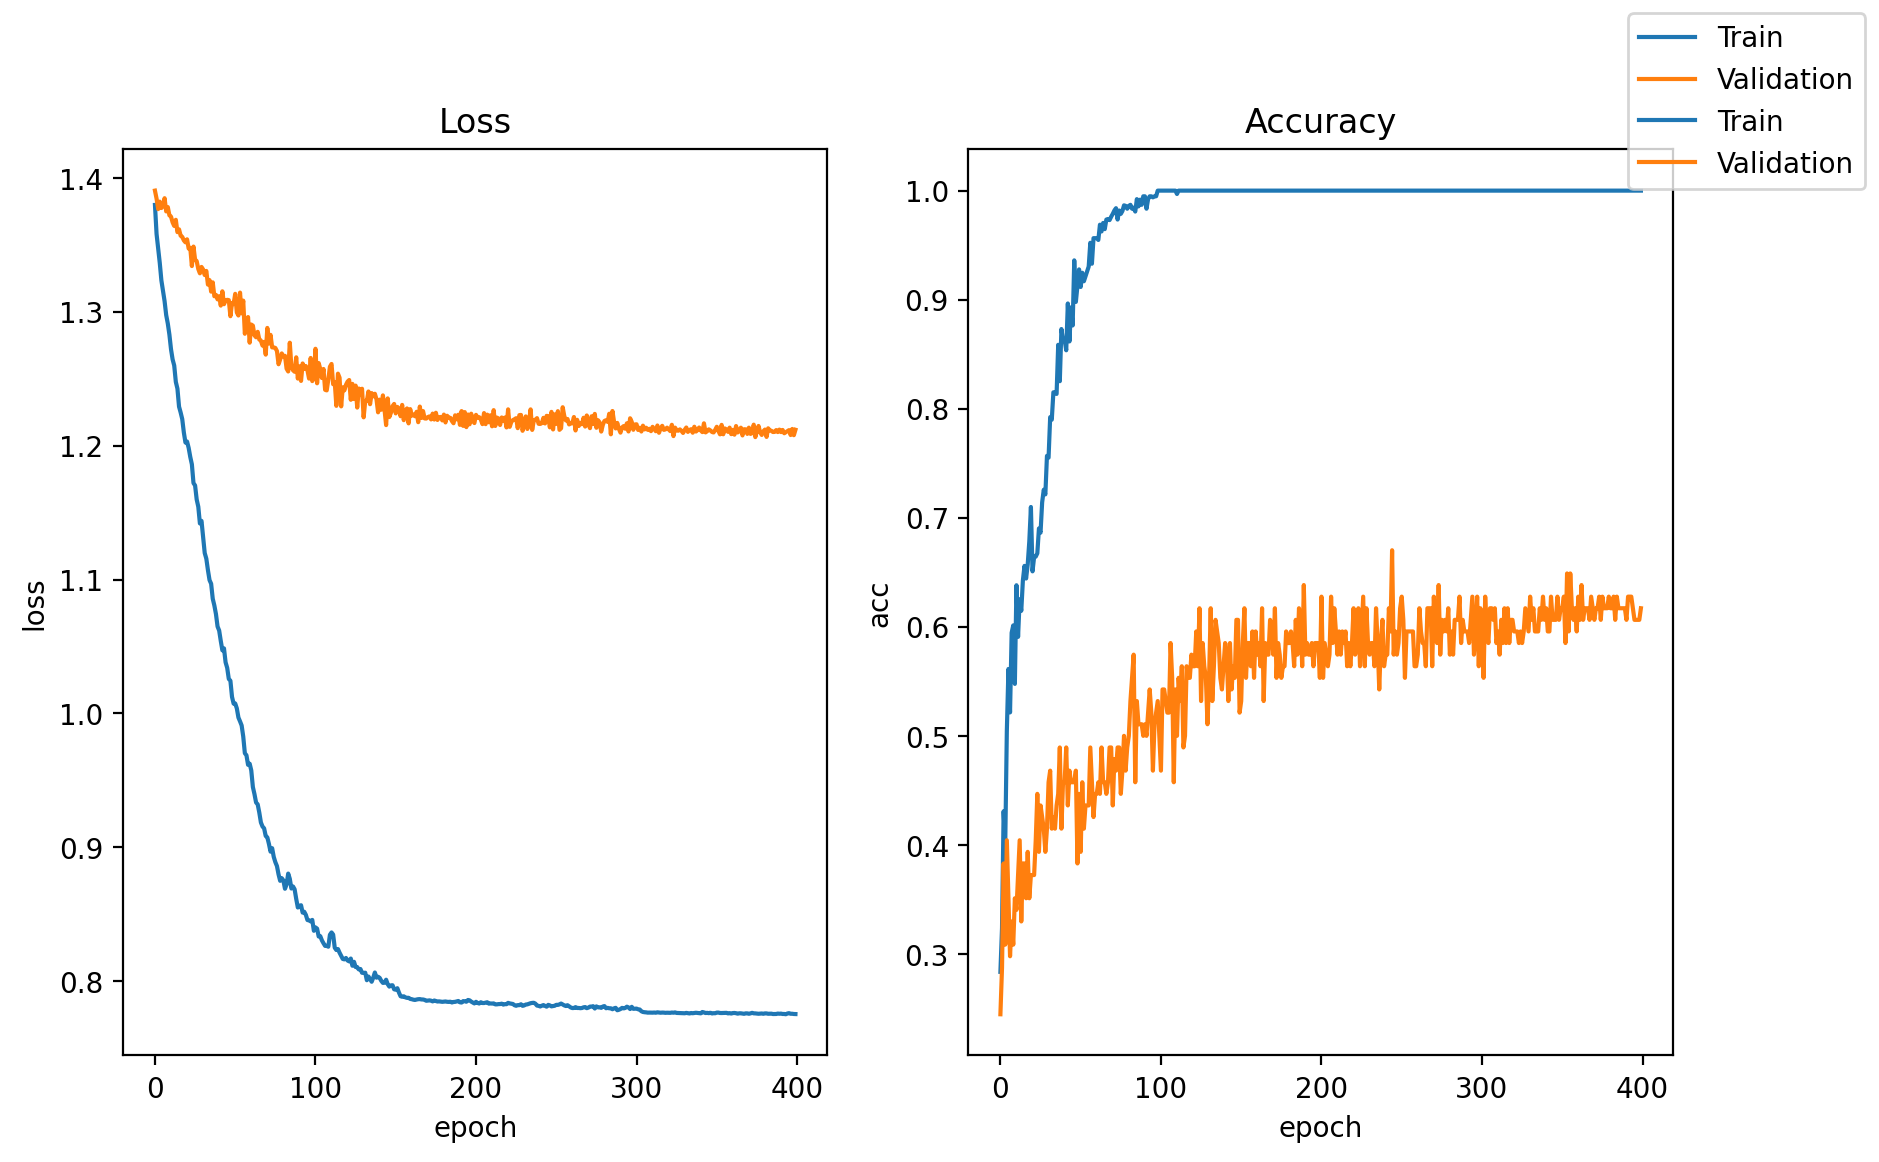

Test accuracy in trail 9: 0.69
The average test accuracy:0.5639999999999998


In [5]:
train_options = {
    'train_batch_size': 64,
    'scheduler_patience': 150,
    'scheduler_factor': 0.3,
    'weight_decay': 0.10,
    'val_batch_size': 1,
    'learning_rate': 1e-4,
    'epoch_num': 400,
    'downsample_split': True,
    'overfit_threshold':0,
}
dsp_opt ={
    'conv_size':[7,13],
    'conv_out_channel' : [10,10],
    'fc1_out_channel' :64,
    'dropout_rate':0.9,
}

loss_fn = nn.CrossEntropyLoss()

data_dir = {
    'X_train_dir': X_train_val,
    'y_train_dir':y_train_val,
    'X_test_dir': X_test,
    'y_test_dir':y_test,
}

test_acc,avg_acc = avg_test_acc(PSCNN,(1,22,500),data_dir,loss_fn,
                        train_options,dsp_opt,trails=10)
print('The average test accuracy:{}'.format(avg_acc))

In [6]:
print('PSCNN average test accuracy:{}'.format(avg_acc))

PSCNN average test accuracy:0.5639999999999998


## Test on TSCNN 

Start training...
Epoch	Train Loss	Train Acc	Test Loss	Test_Acc	
0	1.388486	0.247299	1.410284	0.191489	
1	1.380855	0.280671	1.402400	0.191489	
2	1.378791	0.282793	1.405038	0.191489	
3	1.376475	0.318287	1.388436	0.276596	
4	1.371230	0.341532	1.390424	0.244681	
5	1.369094	0.334877	1.390120	0.255319	
6	1.365189	0.380594	1.378373	0.329787	
7	1.363085	0.364487	1.378051	0.372340	
8	1.359187	0.401717	1.378744	0.372340	
9	1.356492	0.413773	1.378362	0.393617	
10	1.352996	0.420910	1.373905	0.382979	
11	1.350118	0.423997	1.371467	0.382979	
12	1.348966	0.396026	1.365643	0.351064	
13	1.345083	0.429880	1.370663	0.414894	
14	1.340429	0.434896	1.365221	0.382979	
15	1.339567	0.433642	1.363754	0.372340	
16	1.338052	0.414931	1.364410	0.404255	
17	1.334592	0.459298	1.359248	0.382979	
18	1.330479	0.449074	1.353809	0.393617	
19	1.328131	0.431038	1.354452	0.404255	
20	1.323612	0.434606	1.356220	0.414894	
21	1.328861	0.389178	1.358289	0.404255	
22	1.318514	0.446470	1.351070	0.382979	
23	1.317569	0.441454	1.34

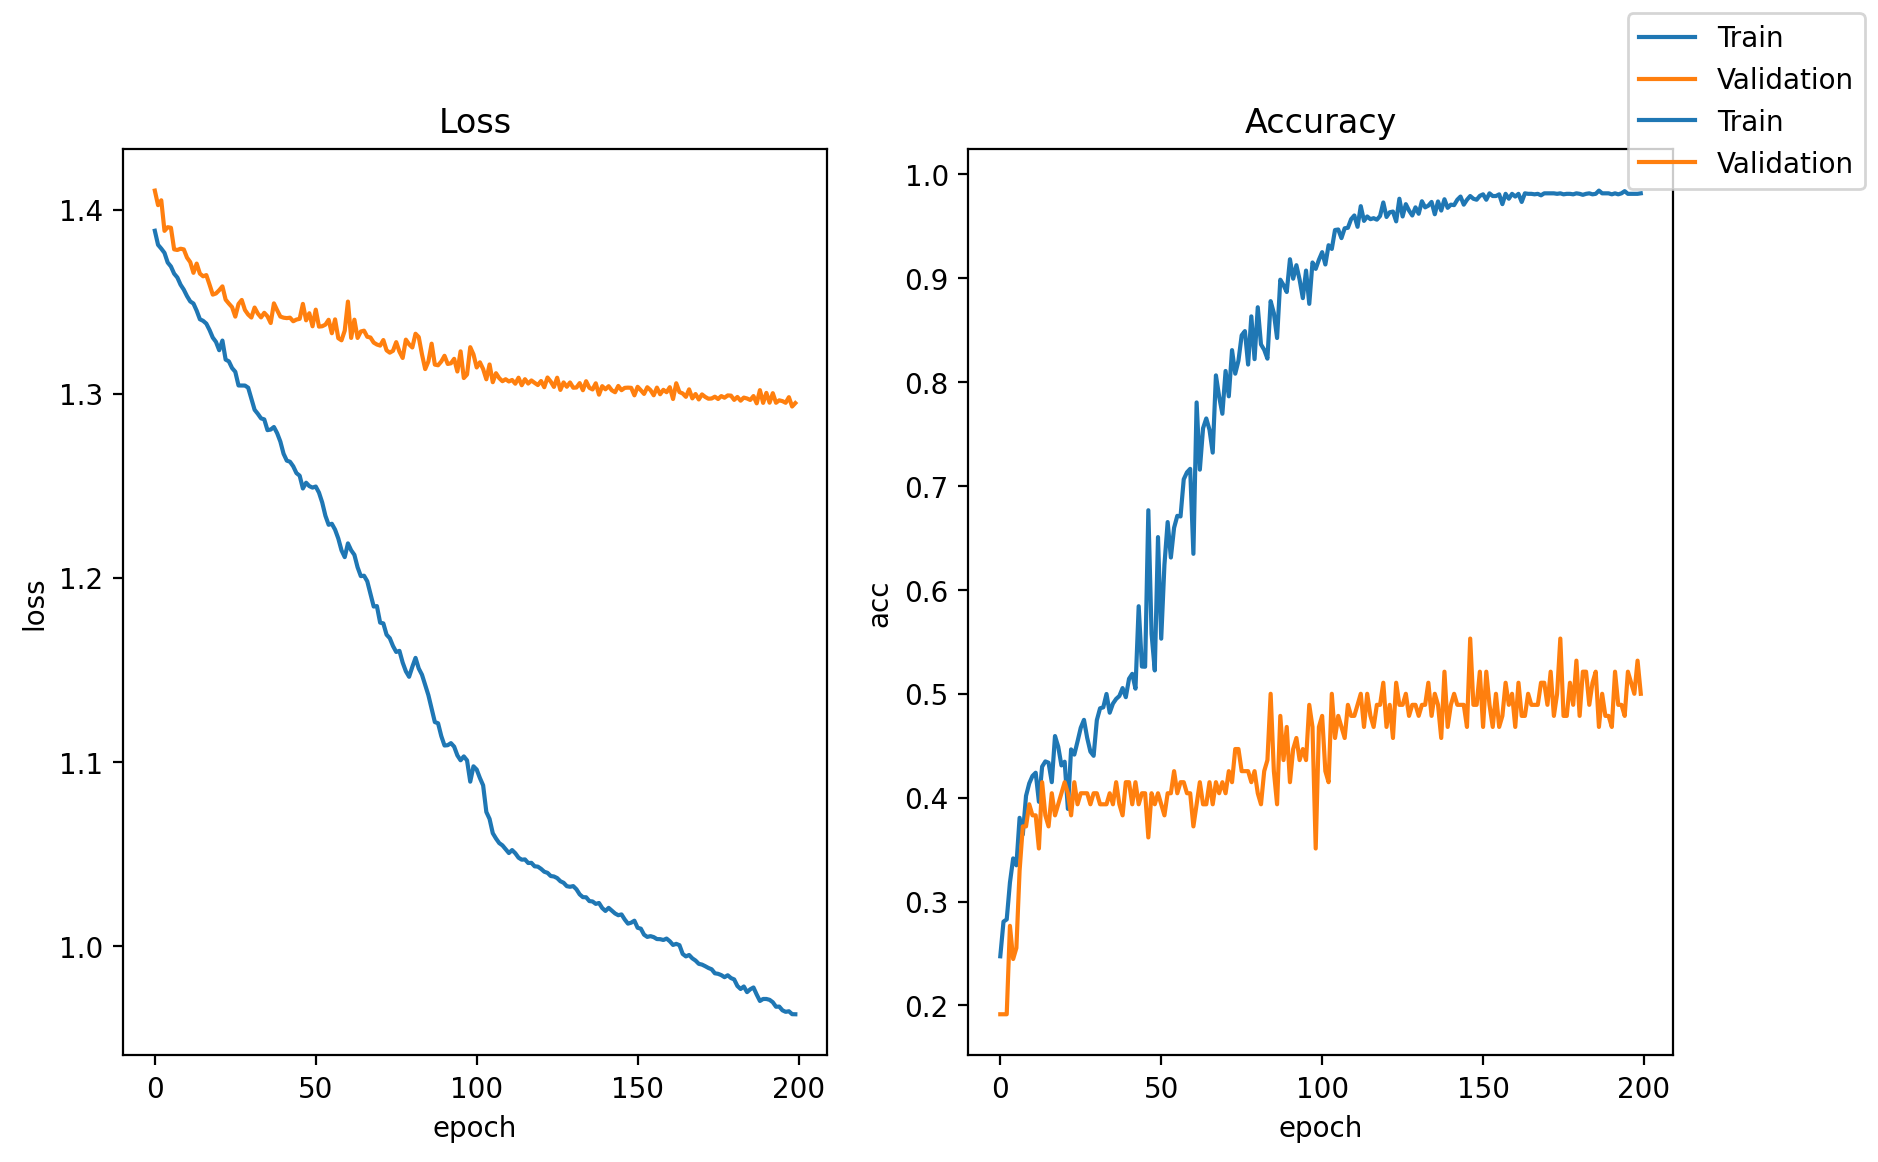

Test accuracy in trail 0: 0.49
Start training...
Epoch	Train Loss	Train Acc	Test Loss	Test_Acc	
0	1.390442	0.256752	1.386498	0.297872	
1	1.367867	0.316454	1.394800	0.319149	
2	1.355699	0.363329	1.388291	0.287234	
3	1.340055	0.364294	1.379020	0.319149	
4	1.328178	0.436053	1.380920	0.276596	
5	1.317883	0.455729	1.378853	0.319149	
6	1.308138	0.500000	1.378876	0.234043	
7	1.301186	0.475116	1.374187	0.351064	
8	1.286466	0.559221	1.373843	0.265957	
9	1.277887	0.616802	1.366858	0.319149	
10	1.266729	0.555363	1.370066	0.276596	
11	1.257950	0.591146	1.359862	0.308511	
12	1.244549	0.619792	1.359935	0.319149	
13	1.233143	0.641397	1.352155	0.329787	
14	1.223498	0.668403	1.348925	0.329787	
15	1.218028	0.625579	1.346979	0.404255	
16	1.208041	0.691840	1.339665	0.361702	
17	1.194141	0.674286	1.339032	0.414894	
18	1.181103	0.787809	1.334432	0.382979	
19	1.168299	0.759838	1.331365	0.425532	
20	1.161037	0.750579	1.329141	0.404255	
21	1.147981	0.807967	1.327046	0.436170	
22	1.135302	0.847704	1.330595	0.43

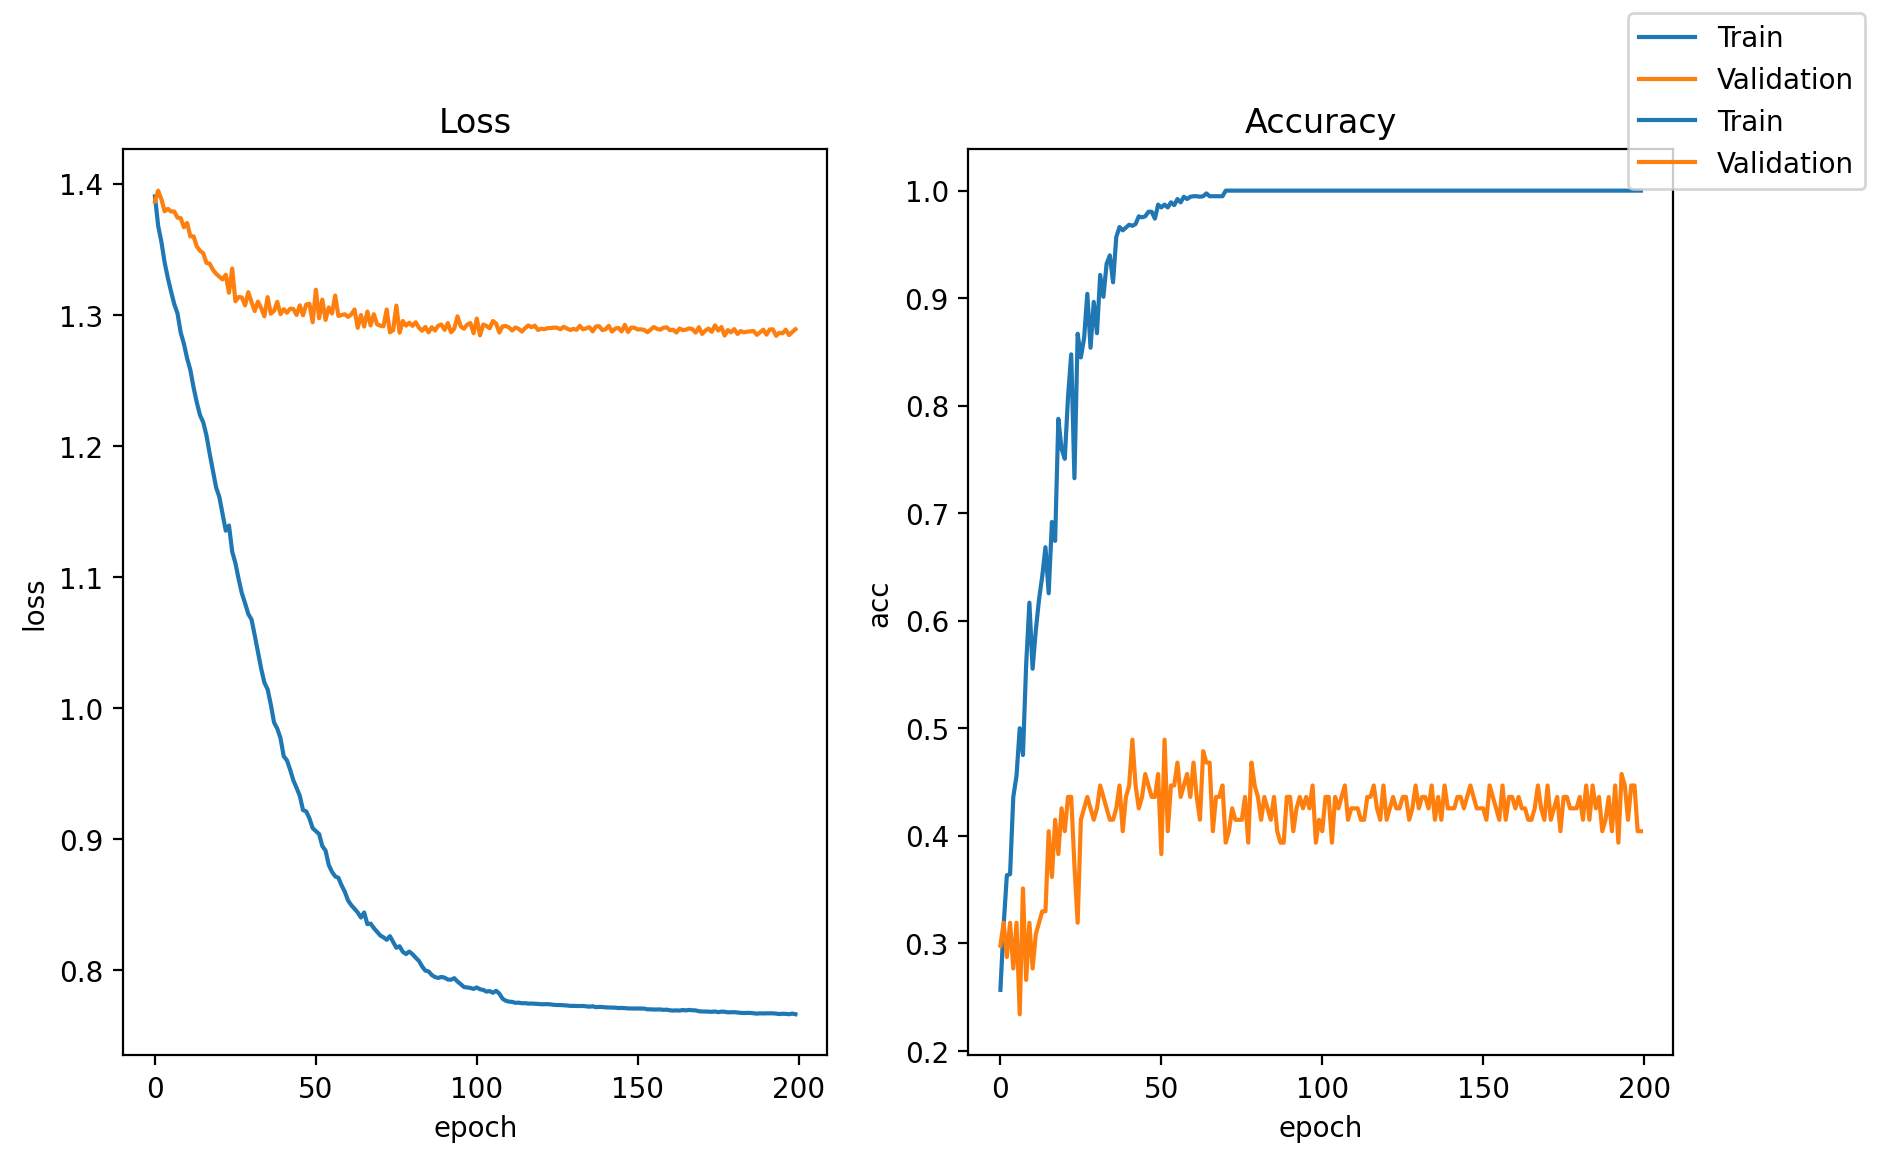

Test accuracy in trail 1: 0.52
Start training...
Epoch	Train Loss	Train Acc	Test Loss	Test_Acc	
0	1.397177	0.224537	1.414450	0.265957	
1	1.374931	0.276427	1.412040	0.255319	
2	1.359391	0.309317	1.401146	0.276596	
3	1.349455	0.410494	1.396955	0.287234	
4	1.332233	0.404321	1.396929	0.276596	
5	1.325319	0.436053	1.397171	0.319149	
6	1.312277	0.477045	1.387663	0.340426	
7	1.301985	0.510899	1.381454	0.329787	
8	1.290441	0.513503	1.386336	0.319149	
9	1.277609	0.604456	1.383682	0.329787	
10	1.268811	0.558738	1.381439	0.351064	
11	1.255774	0.595679	1.369634	0.340426	
12	1.247918	0.654417	1.371936	0.372340	
13	1.232486	0.638021	1.366148	0.340426	
14	1.222846	0.647377	1.363403	0.382979	
15	1.216438	0.711709	1.370113	0.308511	
16	1.208913	0.624421	1.362976	0.319149	
17	1.204419	0.724344	1.358829	0.329787	
18	1.185551	0.700907	1.352769	0.446809	
19	1.170334	0.785204	1.350005	0.404255	
20	1.156173	0.787519	1.356003	0.404255	
21	1.147754	0.777585	1.346018	0.372340	
22	1.136565	0.839410	1.353236	0.37

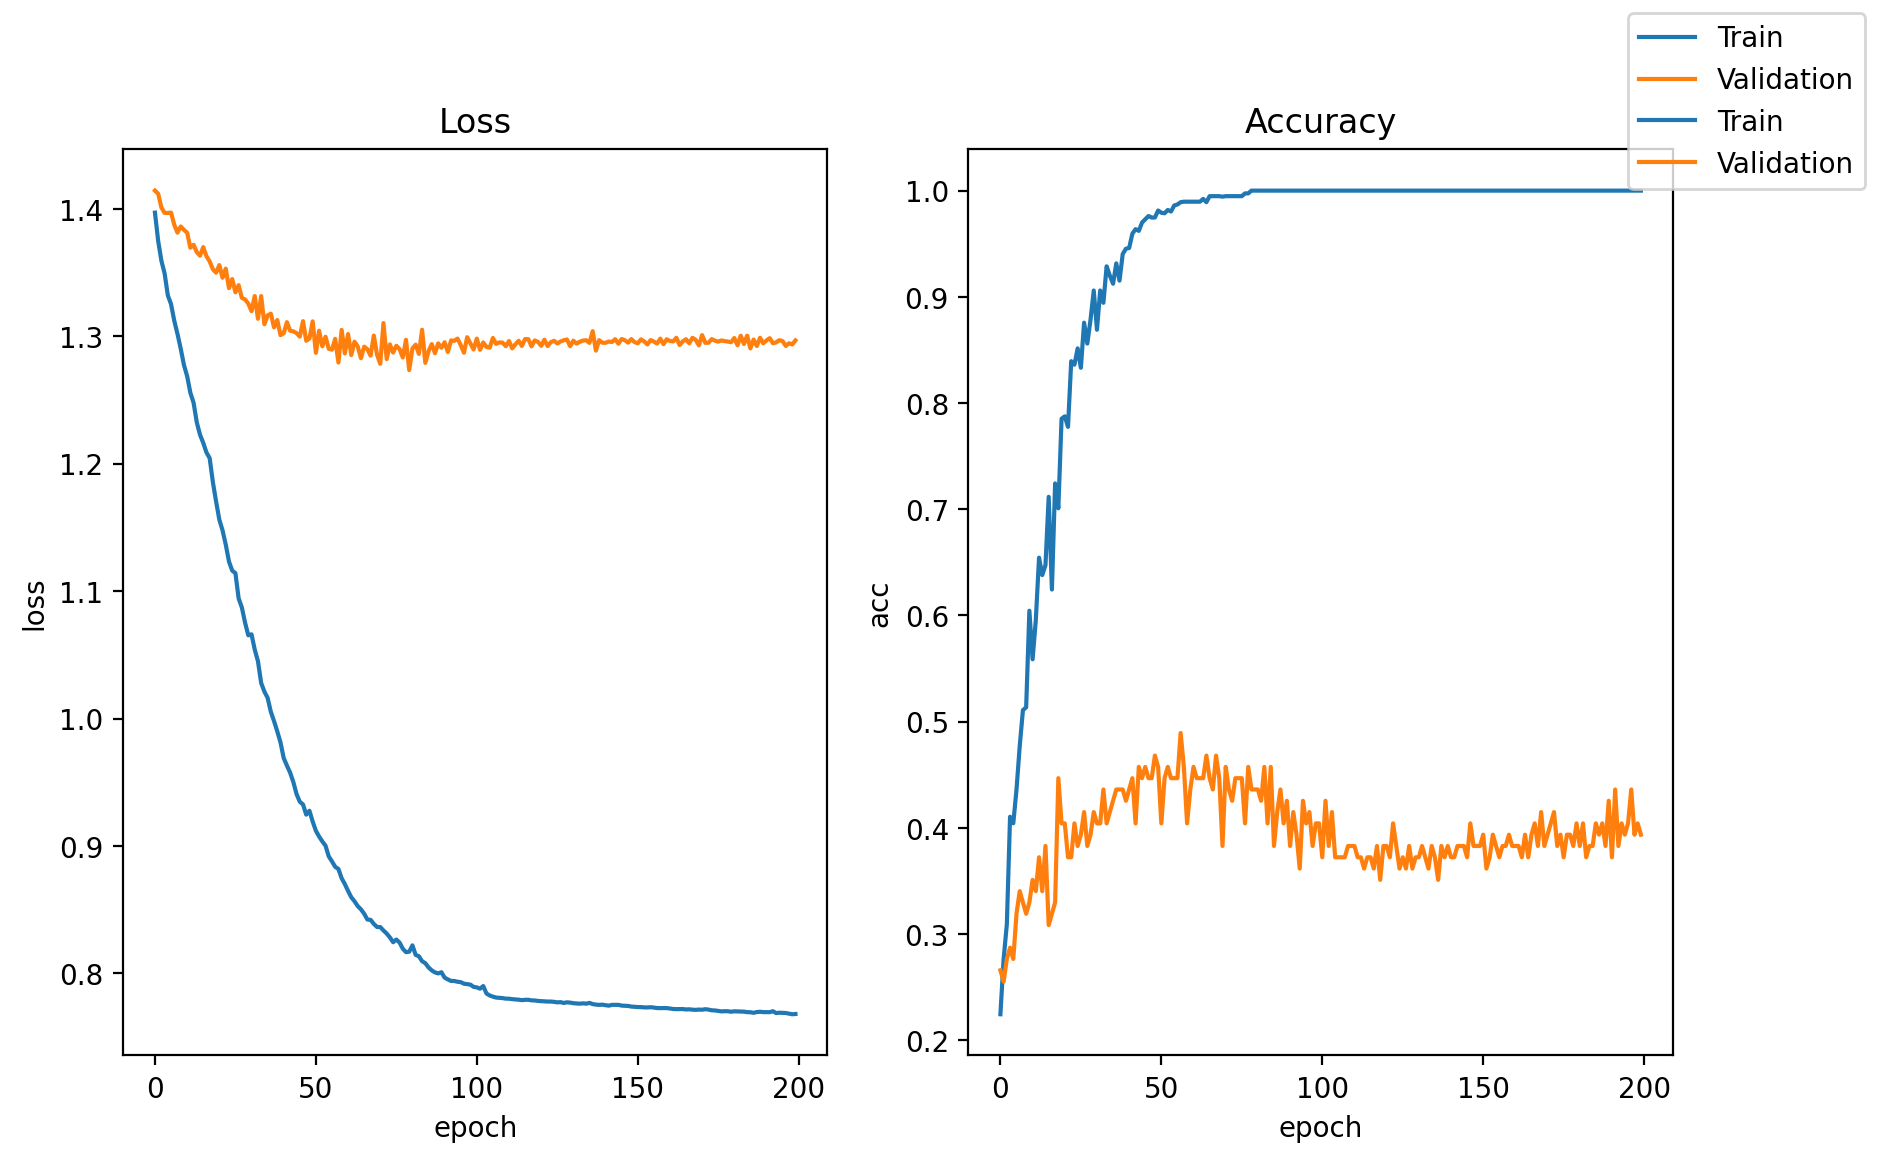

Test accuracy in trail 2: 0.51
Start training...
Epoch	Train Loss	Train Acc	Test Loss	Test_Acc	
0	1.402356	0.244213	1.410324	0.212766	
1	1.364444	0.351562	1.394712	0.319149	
2	1.354304	0.323495	1.397570	0.265957	
3	1.339912	0.390529	1.396723	0.265957	
4	1.325794	0.429205	1.380041	0.287234	
5	1.313293	0.469907	1.378541	0.351064	
6	1.300235	0.493634	1.376107	0.351064	
7	1.291056	0.491995	1.369051	0.329787	
8	1.280822	0.515432	1.371381	0.351064	
9	1.270310	0.511381	1.364400	0.319149	
10	1.259729	0.560667	1.354372	0.382979	
11	1.251858	0.600694	1.355428	0.361702	
12	1.244296	0.572434	1.360356	0.340426	
13	1.234646	0.620853	1.348501	0.382979	
14	1.226154	0.628858	1.346857	0.393617	
15	1.211601	0.690008	1.338493	0.382979	
16	1.204459	0.701100	1.340893	0.468085	
17	1.195371	0.637828	1.340324	0.340426	
18	1.189202	0.770930	1.329895	0.372340	
19	1.180143	0.670525	1.319608	0.468085	
20	1.180174	0.721065	1.317446	0.468085	
21	1.172420	0.692323	1.325403	0.436170	
22	1.158742	0.778356	1.315007	0.43

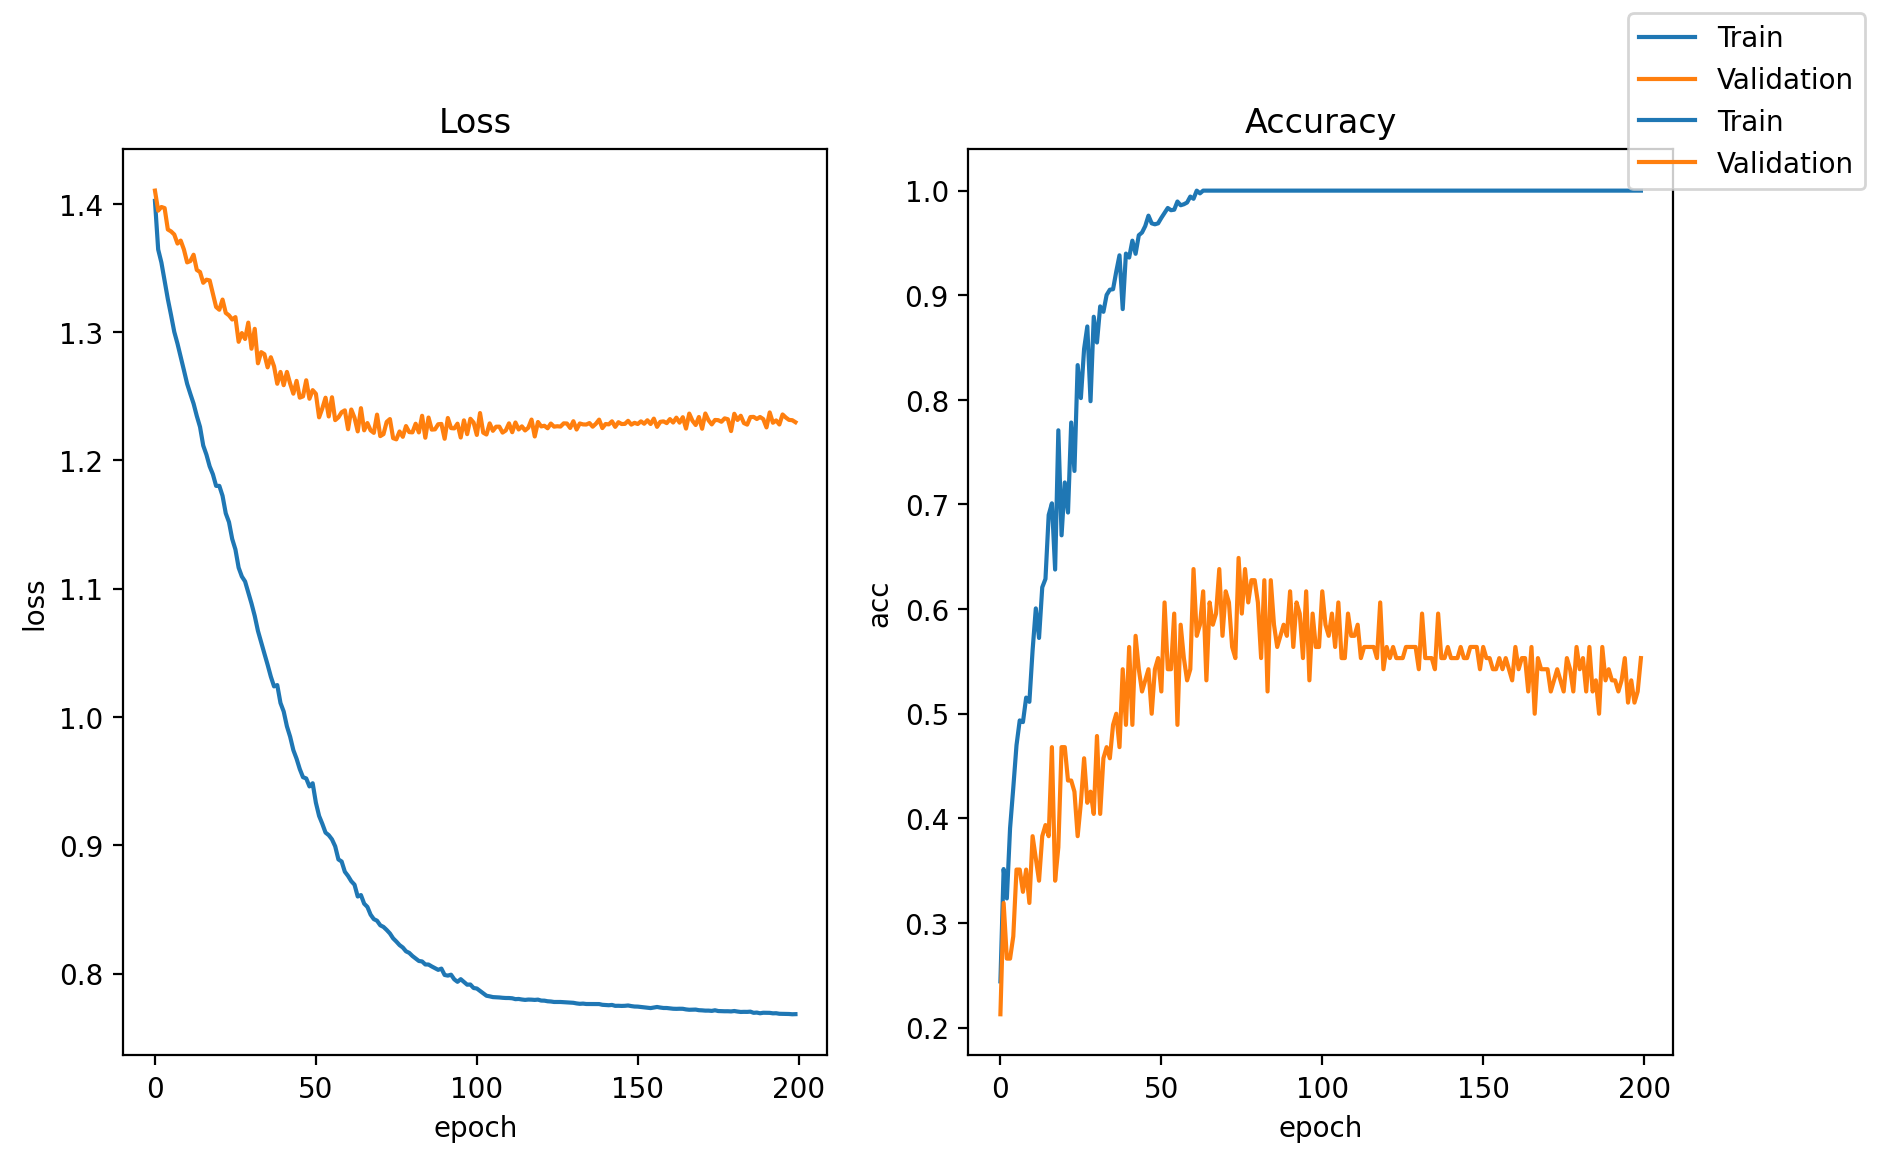

Test accuracy in trail 3: 0.54
Start training...
Epoch	Train Loss	Train Acc	Test Loss	Test_Acc	
0	1.379585	0.320698	1.394011	0.276596	
1	1.357096	0.369309	1.386189	0.276596	
2	1.341049	0.465664	1.385809	0.340426	
3	1.330641	0.435571	1.380057	0.340426	
4	1.316127	0.494599	1.368993	0.329787	
5	1.302360	0.504726	1.366285	0.329787	
6	1.292520	0.529128	1.363137	0.351064	
7	1.281747	0.546875	1.359393	0.351064	
8	1.271998	0.556906	1.355190	0.340426	
9	1.264672	0.599248	1.351774	0.361702	
10	1.254528	0.556134	1.351403	0.382979	
11	1.245606	0.603299	1.344411	0.361702	
12	1.232639	0.638310	1.339150	0.393617	
13	1.226578	0.629051	1.337304	0.372340	
14	1.216521	0.661748	1.333074	0.414894	
15	1.207023	0.683063	1.327471	0.414894	
16	1.196626	0.681424	1.324038	0.414894	
17	1.187348	0.708237	1.316421	0.436170	
18	1.180557	0.687114	1.321145	0.404255	
19	1.171445	0.690683	1.309589	0.436170	
20	1.161558	0.711034	1.310132	0.457447	
21	1.153873	0.750868	1.304365	0.457447	
22	1.146204	0.711998	1.306475	0.42

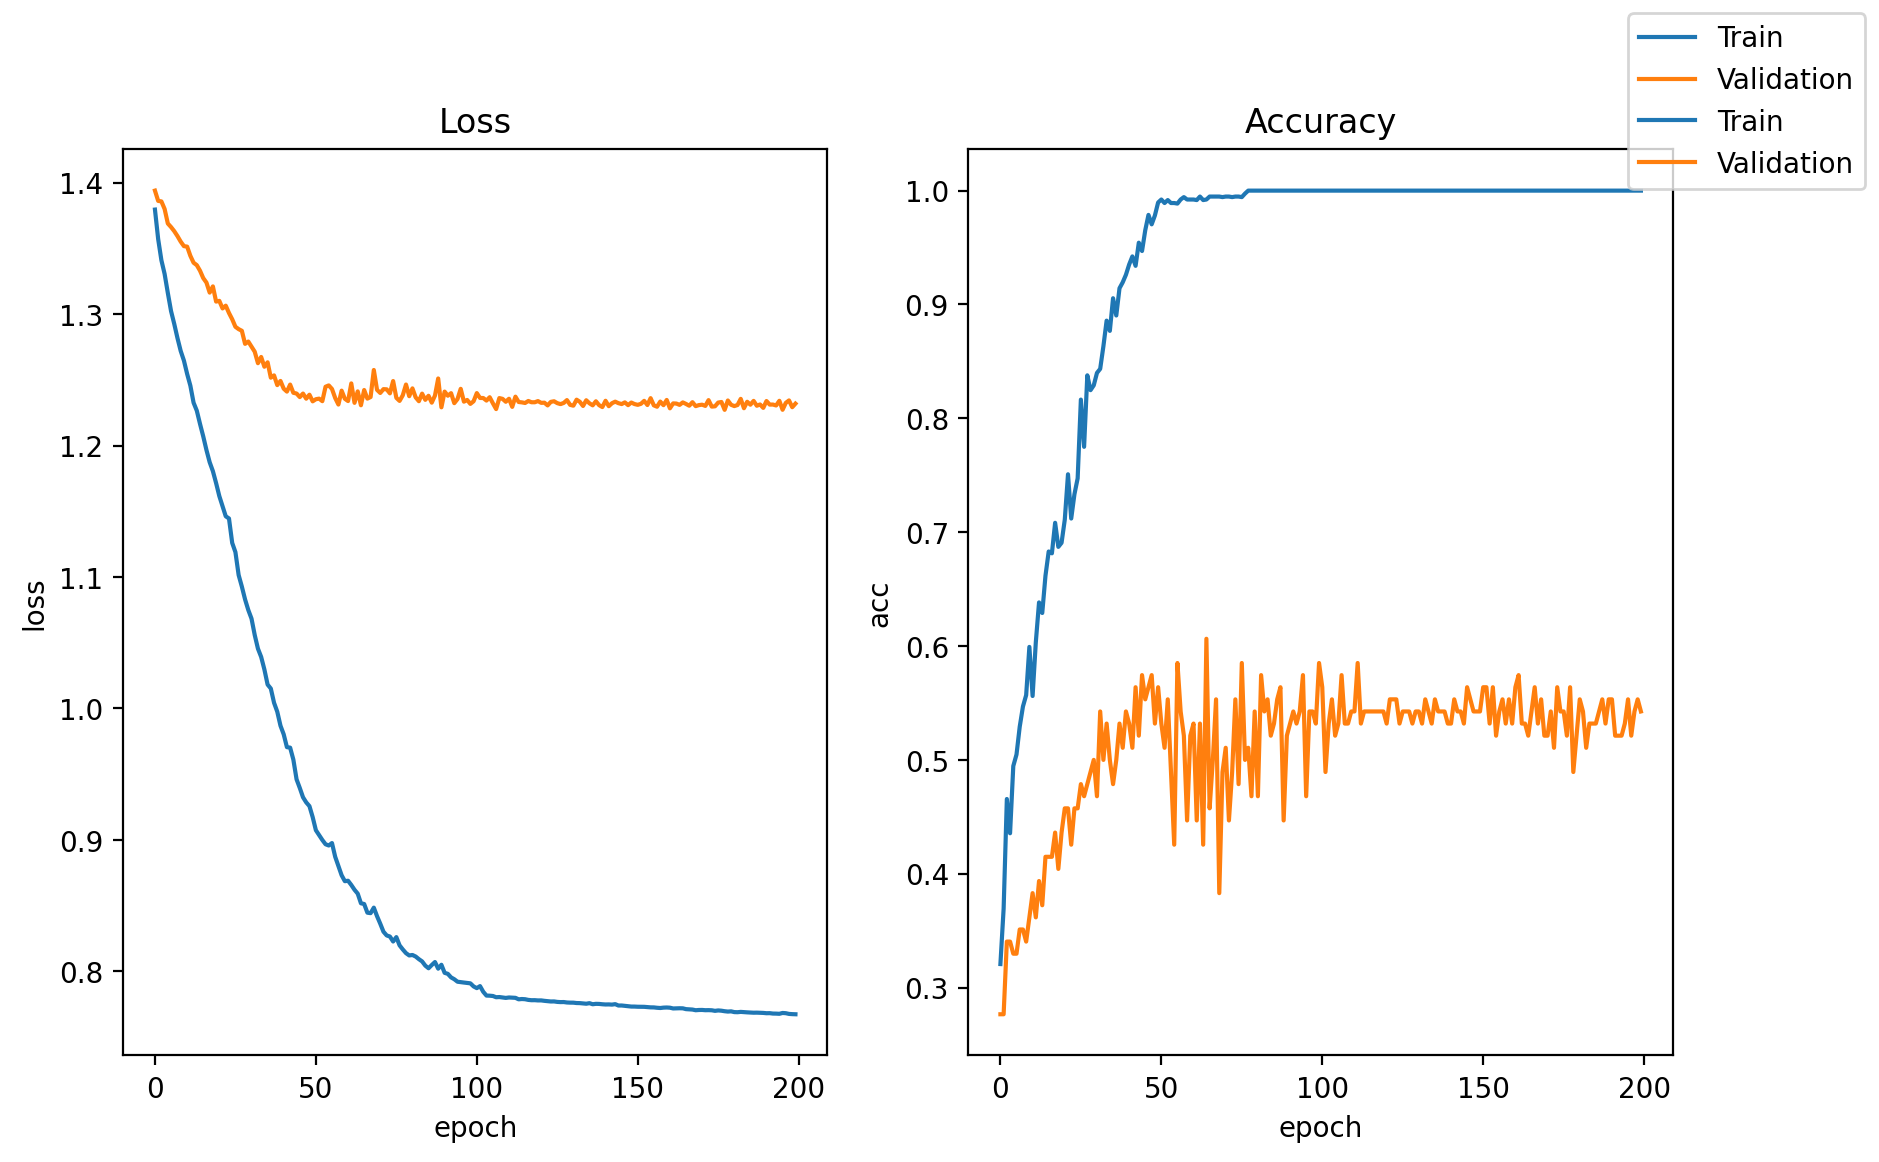

Test accuracy in trail 4: 0.53
Start training...
Epoch	Train Loss	Train Acc	Test Loss	Test_Acc	
0	1.383879	0.258873	1.403792	0.255319	
1	1.357063	0.304591	1.398673	0.255319	
2	1.341782	0.427083	1.387942	0.234043	
3	1.330972	0.417342	1.383324	0.244681	
4	1.317931	0.489101	1.369086	0.329787	
5	1.307570	0.506559	1.376909	0.255319	
6	1.293996	0.507137	1.364149	0.382979	
7	1.284549	0.558546	1.366916	0.340426	
8	1.280212	0.526524	1.364176	0.382979	
9	1.272107	0.579379	1.357812	0.372340	
10	1.260626	0.559221	1.364247	0.382979	
11	1.249690	0.570120	1.354079	0.393617	
12	1.246000	0.575521	1.354990	0.361702	
13	1.233990	0.611304	1.346502	0.414894	
14	1.226868	0.613426	1.345592	0.414894	
15	1.216578	0.627411	1.338794	0.425532	
16	1.208570	0.655382	1.337744	0.425532	
17	1.202009	0.656829	1.326856	0.436170	
18	1.195036	0.661555	1.331579	0.414894	
19	1.188879	0.656057	1.324773	0.500000	
20	1.182399	0.646123	1.313755	0.468085	
21	1.177408	0.711034	1.323112	0.436170	
22	1.163926	0.703897	1.305499	0.51

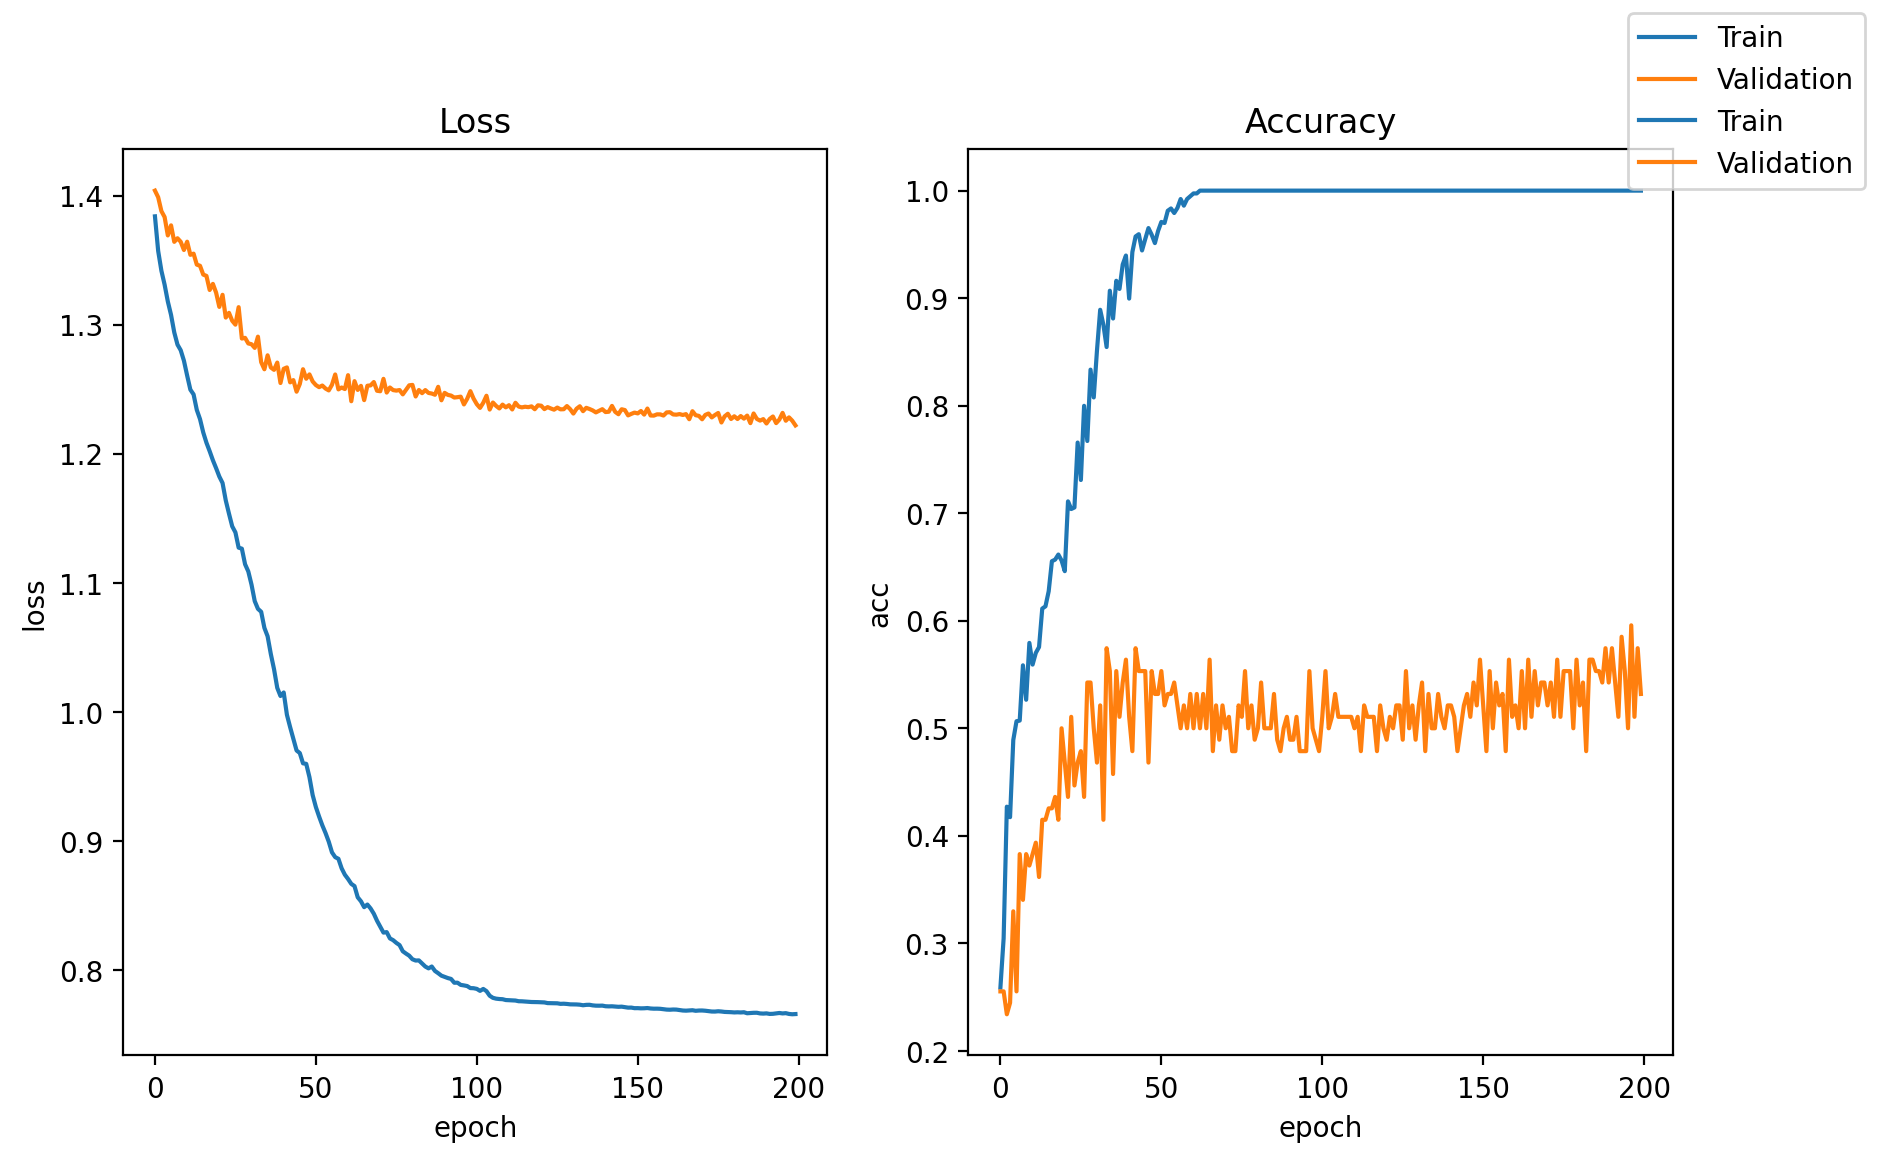

Test accuracy in trail 5: 0.4
Start training...
Epoch	Train Loss	Train Acc	Test Loss	Test_Acc	
0	1.397418	0.248939	1.365762	0.319149	
1	1.363316	0.406443	1.373073	0.319149	
2	1.348161	0.449267	1.370185	0.340426	
3	1.334401	0.474923	1.367002	0.340426	
4	1.321158	0.523438	1.364232	0.393617	
5	1.310852	0.547357	1.359718	0.446809	
6	1.294498	0.578414	1.350174	0.436170	
7	1.291075	0.534819	1.347707	0.436170	
8	1.275741	0.559221	1.348035	0.404255	
9	1.266655	0.571759	1.345511	0.457447	
10	1.248991	0.627894	1.335371	0.425532	
11	1.239750	0.608025	1.337694	0.457447	
12	1.229011	0.624807	1.332606	0.468085	
13	1.224556	0.625000	1.333079	0.414894	
14	1.206019	0.662519	1.328703	0.478723	
15	1.196846	0.672454	1.327161	0.404255	
16	1.184132	0.674093	1.320751	0.489362	
17	1.177708	0.689718	1.316477	0.436170	
18	1.164945	0.693769	1.315799	0.468085	
19	1.154893	0.705826	1.309261	0.436170	
20	1.144854	0.728588	1.306809	0.489362	
21	1.135044	0.739487	1.305596	0.457447	
22	1.123225	0.744695	1.314106	0.414

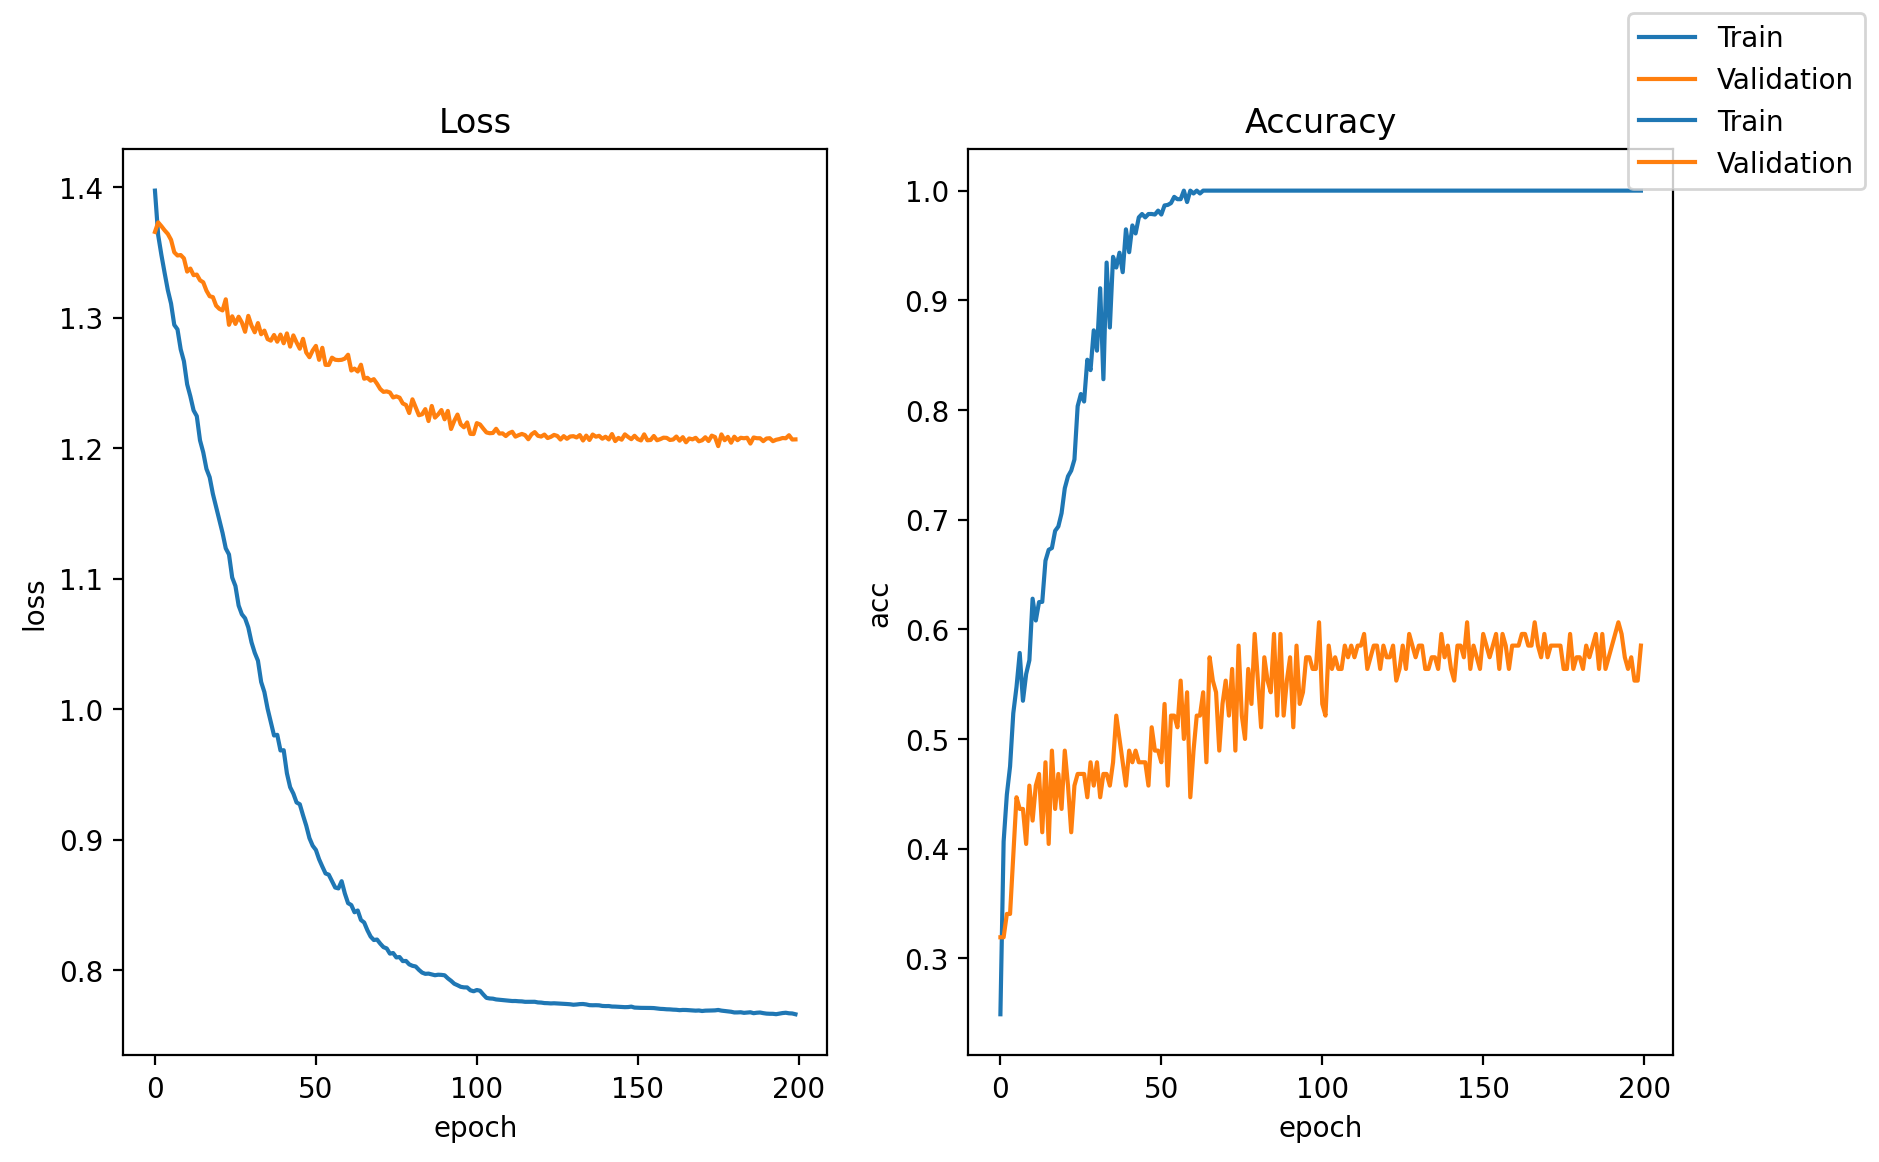

Test accuracy in trail 6: 0.53
Start training...
Epoch	Train Loss	Train Acc	Test Loss	Test_Acc	
0	1.396602	0.246142	1.388319	0.180851	
1	1.373134	0.295814	1.382181	0.308511	
2	1.362724	0.318962	1.403943	0.191489	
3	1.344039	0.461420	1.375679	0.329787	
4	1.333864	0.526331	1.369926	0.361702	
5	1.323484	0.483218	1.367539	0.361702	
6	1.315261	0.534336	1.374585	0.340426	
7	1.307232	0.537133	1.362755	0.414894	
8	1.298951	0.595390	1.373280	0.372340	
9	1.291084	0.619599	1.356726	0.446809	
10	1.278831	0.579572	1.370231	0.308511	
11	1.272161	0.608025	1.359242	0.425532	
12	1.262946	0.652971	1.357249	0.446809	
13	1.252930	0.678627	1.360005	0.351064	
14	1.246193	0.739487	1.354278	0.382979	
15	1.234373	0.683353	1.355214	0.382979	
16	1.226651	0.634549	1.347768	0.425532	
17	1.217908	0.745370	1.350536	0.340426	
18	1.208811	0.738040	1.343269	0.457447	
19	1.208206	0.735436	1.352101	0.329787	
20	1.195029	0.786362	1.347131	0.319149	
21	1.188097	0.748939	1.331465	0.446809	
22	1.179588	0.704668	1.357540	0.30

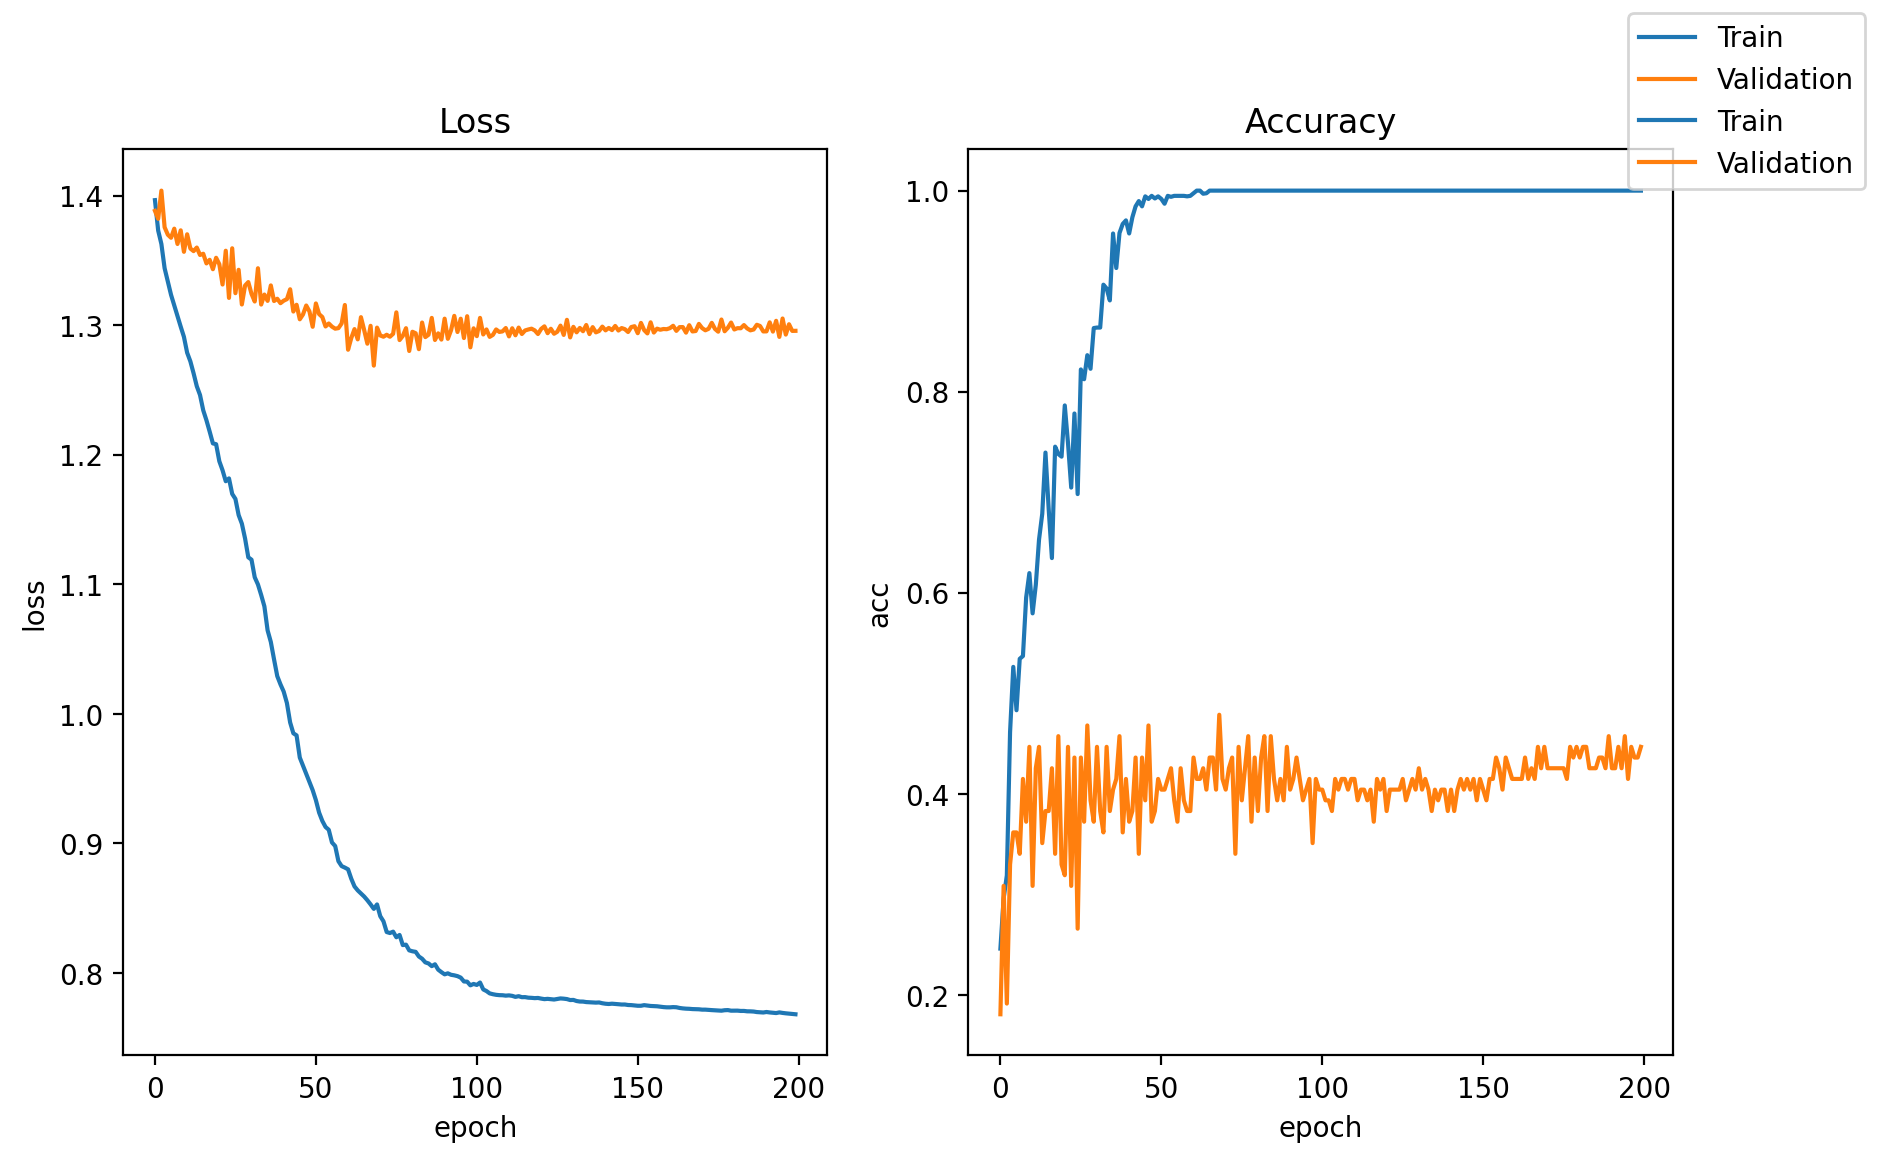

Test accuracy in trail 7: 0.47
Start training...
Epoch	Train Loss	Train Acc	Test Loss	Test_Acc	
0	1.390615	0.249904	1.424890	0.148936	
1	1.360688	0.329668	1.400595	0.265957	
2	1.345025	0.395351	1.405539	0.255319	
3	1.333945	0.461902	1.395446	0.276596	
4	1.322210	0.453800	1.397433	0.287234	
5	1.311716	0.458333	1.398310	0.244681	
6	1.302767	0.467978	1.382703	0.297872	
7	1.293368	0.510417	1.383094	0.319149	
8	1.283655	0.494985	1.387878	0.319149	
9	1.275268	0.507620	1.374675	0.351064	
10	1.264694	0.515625	1.376149	0.329787	
11	1.258101	0.600887	1.385356	0.276596	
12	1.249003	0.512828	1.365132	0.351064	
13	1.238997	0.615162	1.370357	0.287234	
14	1.230168	0.583140	1.359096	0.361702	
15	1.217797	0.662712	1.361389	0.372340	
16	1.208525	0.684510	1.360559	0.351064	
17	1.198915	0.705343	1.366787	0.319149	
18	1.189785	0.739680	1.345303	0.372340	
19	1.181196	0.773341	1.368555	0.319149	
20	1.169963	0.741609	1.342728	0.361702	
21	1.161335	0.749614	1.367577	0.340426	
22	1.153737	0.774016	1.336568	0.39

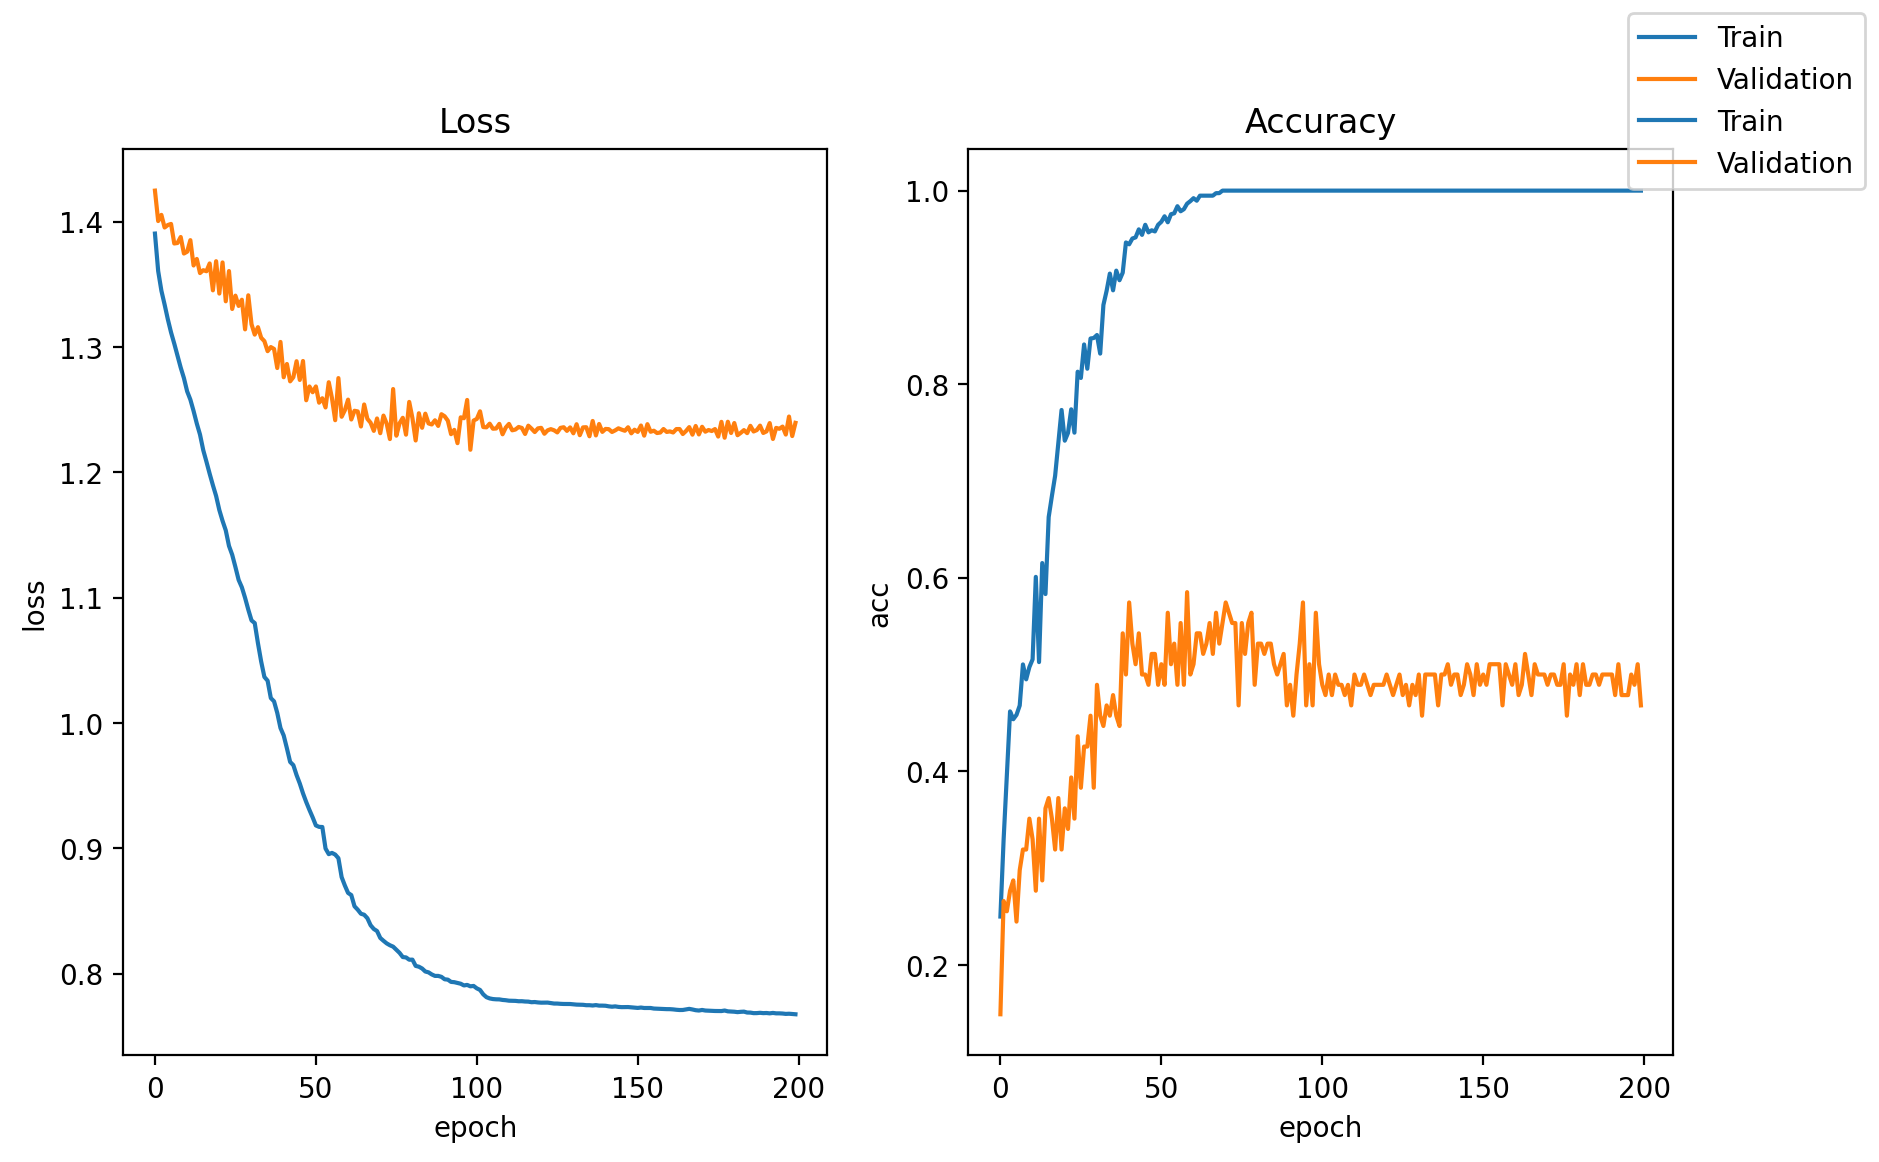

Test accuracy in trail 8: 0.49
Start training...
Epoch	Train Loss	Train Acc	Test Loss	Test_Acc	
0	1.374822	0.284722	1.430578	0.234043	
1	1.361149	0.311921	1.415584	0.234043	
2	1.343215	0.378954	1.402029	0.255319	
3	1.329341	0.402874	1.395621	0.223404	
4	1.317464	0.454090	1.391740	0.255319	
5	1.308801	0.411844	1.392831	0.255319	
6	1.296311	0.542438	1.381849	0.276596	
7	1.286196	0.548515	1.382052	0.297872	
8	1.278531	0.500193	1.375814	0.287234	
9	1.269813	0.575135	1.368552	0.351064	
10	1.257743	0.642361	1.367354	0.319149	
11	1.247591	0.563754	1.366073	0.308511	
12	1.239806	0.613715	1.358484	0.372340	
13	1.228362	0.698302	1.353490	0.404255	
14	1.219341	0.649884	1.358314	0.329787	
15	1.208392	0.692805	1.346258	0.457447	
16	1.197642	0.798225	1.345253	0.446809	
17	1.187904	0.714410	1.344477	0.457447	
18	1.179212	0.771219	1.338638	0.393617	
19	1.173110	0.803916	1.347917	0.446809	
20	1.157958	0.792052	1.334333	0.414894	
21	1.153542	0.803144	1.331530	0.436170	
22	1.136077	0.842978	1.333528	0.36

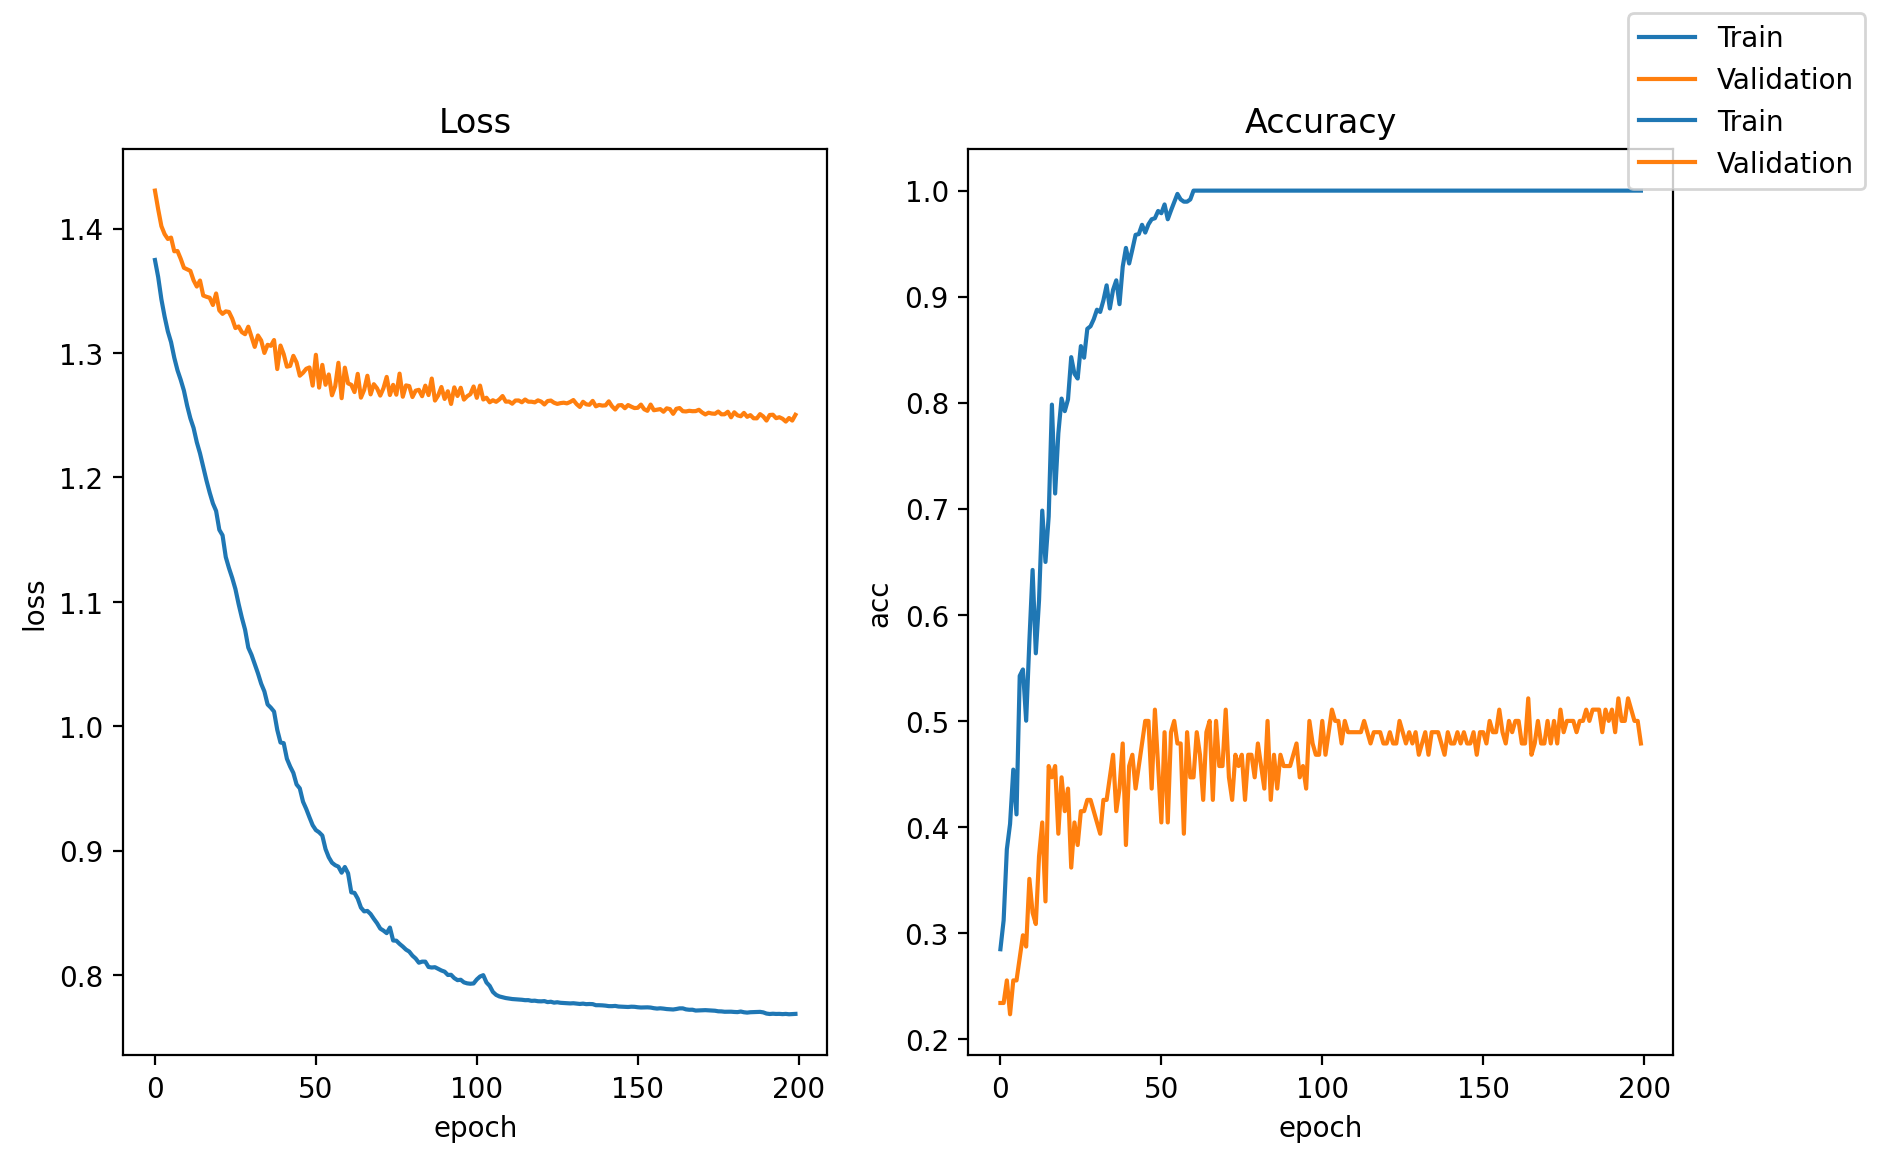

Test accuracy in trail 9: 0.45
The average test accuracy:0.493


In [7]:
encoder_opt = {
    'gate_conv_size': 7,
    'gate_conv_out_channel': 60,
    'prob_conv_size': 7,
    'feature_conv_size':3,
    'feature_conv_out_channel': 64,
    'feature_pool_size': 7,
    'activation': 'elu',
}
model_opt = {
    'decoder_opt':{},
    'encoder_opt':encoder_opt,
}

#model = EEGCNNv2(1,4,encoder_opt=encoder_opt,input_size=(1,22,500)).to('cuda')

train_options = {
    'train_batch_size': 64,
    'scheduler_patience': 100,
    
    'scheduler_factor': 0.3,
    'weight_decay': 0.10,
    'val_batch_size': 1,
    'learning_rate': 1e-4,
    'epoch_num': 200,
    'downsample_split': True,
    'overfit_threshold':0,
}
loss_fn = nn.CrossEntropyLoss()

data_dir = {
    'X_train_dir': X_train_val,
    'y_train_dir':y_train_val,
    'X_test_dir': X_test,
    'y_test_dir':y_test,
}

test_acc,avg_acc = avg_test_acc(TSCNN,(1,22,500),data_dir,loss_fn,
                        train_options,model_opt,trails=10)
print('The average test accuracy:{}'.format(avg_acc))

In [8]:
print('TSCNN average test accuracy:{}'.format(avg_acc))

TSCNN average test accuracy:0.493


## Test on CNN+LSTM


## load data


In [9]:

X_train_val = load_data(data_type='X_train_val',
                                data_sub_dir='band_pass_data',
                                band_pass_range=('01','45'),
                                subject=subject_num,
                                downsampled=True)
y_train_val = load_data(data_type='y_train_valid',
                                subject=subject_num,
                                data_sub_dir='band_pass_data',
                                downsampled=True)


X_test = load_data(data_type='X_test',
                                data_sub_dir='band_pass_data',
                                band_pass_range=('01','45'),
                                subject=subject_num,
                                downsampled=True)

y_test = load_data(data_type="y_test",
                                data_sub_dir='band_pass_data',
                                subject=subject_num,
                             downsampled=True)
y_train_val -=769
y_test -=769

train_num = int(X_train_val.shape[0]*0.8)
val_num = int(X_train_val.shape[0]-train_num)

(X_train, X_valid),(y_train,y_valid) = downsampled_cross_split(X_train_val,y_train_val,(train_num,val_num))

y_train = to_categorical(y_train, 4)
y_valid = to_categorical(y_valid, 4)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_valid = X_valid.reshape(X_valid.shape[0], X_valid.shape[1], X_train.shape[2], 1)


X_train = np.swapaxes(X_train, 1,3)
X_train = np.swapaxes(X_train, 1,2)
X_valid = np.swapaxes(X_valid, 1,3)
X_valid = np.swapaxes(X_valid, 1,2)

X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
X_test = np.swapaxes(X_test, 1,3)
X_test = np.swapaxes(X_test, 1,2)
y_test = to_categorical(y_test, 4)




In [10]:
epochs = 200
test_acc = [] 
for i in np.arange(10):
    model = CNN_LSTM()
    model_result = model.fit(X_train,
                y_train,
                batch_size=64,
                epochs=epochs,
                validation_data=(X_valid, y_valid), verbose=True)
    score = model.evaluate(X_test, y_test, verbose=0)
    test_acc.append(score[1])
    print('The test accuracy is :{}'.format(score[1]))

=========================] - 0s 24ms/step - loss: 0.4194 - accuracy: 0.9408 - val_loss: 1.1803 - val_accuracy: 0.5000
Epoch 61/200
6/6 [==============================] - 0s 24ms/step - loss: 0.3949 - accuracy: 0.9357 - val_loss: 1.1785 - val_accuracy: 0.5106
Epoch 62/200
6/6 [==============================] - 0s 23ms/step - loss: 0.4060 - accuracy: 0.9357 - val_loss: 1.2045 - val_accuracy: 0.4894
Epoch 63/200
6/6 [==============================] - 0s 24ms/step - loss: 0.4102 - accuracy: 0.9195 - val_loss: 1.2811 - val_accuracy: 0.4681
Epoch 64/200
6/6 [==============================] - 0s 24ms/step - loss: 0.4185 - accuracy: 0.9206 - val_loss: 1.2887 - val_accuracy: 0.4574
Epoch 65/200
6/6 [==============================] - 0s 25ms/step - loss: 0.3515 - accuracy: 0.9507 - val_loss: 1.2708 - val_accuracy: 0.5106
Epoch 66/200
6/6 [==============================] - 0s 24ms/step - loss: 0.3790 - accuracy: 0.9298 - val_loss: 1.2640 - val_accuracy: 0.4787
Epoch 67/200
6/6 [==================

In [11]:
avg_acc=sum(test_acc)/len(test_acc)
print('CNN+LSTM average test accuracy:{}'.format(avg_acc))


CNN+LSTM average test accuracy:0.49199998676776885
